# Chargement des données

In [1]:
# Importation des packages
import os
import pandas as pd

In [2]:
def extract_id_and_load_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

        # Extraire l'identifiant du fichier
        id_line = [line for line in lines if 'ID:' in line][0].strip()
        individual_id = id_line.split(':')[1].strip()

        # Lire les données tabulaires à partir des lignes restantes
        df = pd.read_csv(file_path, sep='\t', skiprows=2)  # Skip header information lines

        # Ajouter l'identifiant comme une colonne dans le DataFrame
        df['ID'] = individual_id

    return df

def load_train_data_with_labels(train_folder):
    dataframes = []

    # Parcourir chaque fichier dans le dossier train
    for filename in os.listdir(train_folder):
        if filename.endswith('.txt'):  # Assurez-vous de lire uniquement les fichiers texte
            file_path = os.path.join(train_folder, filename)

            # Extraire les données et l'identifiant
            df = extract_id_and_load_data(file_path)

            # Extraire l'information sur le résultat
            result_line = [line for line in open(file_path, 'r').readlines() if 'Result:' in line][0].strip()
            result = result_line.split(':')[1].strip().upper()  # Convertir en majuscules pour uniformité

            # Convertir le résultat en binaire pour la classification (0 pour NEGATIVE, 1 pour POSITIVE)
            result_binary = 1 if result == 'POSITIVE' else 0

            # Ajouter le label à chaque ligne du DataFrame
            df['Result'] = result_binary

            # Ajouter le DataFrame à la liste
            dataframes.append(df)

    # Combiner tous les DataFrames en un seul
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

# Exemple d'utilisation
train_folder_path = 'C:\\Users\\ROYAL COMPUTER\\Desktop\\train'
train_data_with_labels = load_train_data_with_labels(train_folder_path)

# Sauvegarder les données combinées dans un fichier CSV
train_data_with_labels.to_csv('train_data.csv', index=False)


In [3]:
trainset = pd.read_csv('train_data.csv')

In [4]:
trainset

,Min:Sec,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D57,D58,D59,D60,D61,D62,D63,D64,ID,Result
0,19:30.3,9899.739831,1475.398633,587.143010,1399.681810,10779.524700,15394.799050,5914.872887,2.033590e+06,850.283971,...,881.138137,11901.225540,343808.000000,21386.473750,17949.985630,16414.760070,103893.225700,734064.120700,1,1
1,19:32.6,9898.787994,1475.444191,587.196626,1400.256320,10787.764920,15396.690310,5914.692456,2.034906e+06,850.047329,...,880.760198,11900.859700,344170.666700,21383.818940,18035.642430,16414.253900,103956.073000,734512.022600,1,1
2,19:34.9,9895.932483,1472.482916,586.678343,1390.136115,10774.580570,15345.153660,5900.258016,2.018362e+06,848.916702,...,879.572389,11890.982260,343989.333300,21356.607150,18057.487780,16406.661270,103979.227300,734064.120700,1,1
3,19:37.1,9893.394251,1471.617312,586.446009,1385.716811,10712.284520,15319.148940,5892.860365,2.011280e+06,846.550274,...,879.059471,11900.128040,343914.666700,21343.333110,17956.309280,16404.636570,103800.608600,733569.071200,1,1
4,19:39.4,9890.538740,1471.298405,586.338778,1386.026162,10710.636470,15307.328610,5888.530033,2.009087e+06,845.866639,...,878.897497,11878.543990,343936.000000,21334.704980,18024.719750,16400.080990,103926.303300,733686.940100,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17006,03:25.756,9524.690787,1421.213896,563.326928,1282.559481,10019.632455,14856.101118,5674.583585,1.869302e+06,7276.880902,...,805.300027,11789.779960,309574.778632,19581.463060,17333.369666,15620.430888,96737.428768,685307.976036,9,0
17007,03:28.006,9516.671293,1421.304015,563.235429,1282.474051,10030.575134,14855.128828,5673.669391,1.868599e+06,7274.665633,...,805.374816,11793.416985,309428.821641,19572.971006,17295.220448,15620.430888,96768.739433,685265.334840,9,0
17008,03:30.257,9515.129083,1421.213896,563.143929,1282.345906,10081.104567,14853.184249,5672.938036,1.868388e+06,7273.834907,...,805.000873,11786.142935,309234.212319,19565.085527,17385.143605,15608.811426,96709.249170,685457.220220,9,0
17009,03:32.536,9519.755714,1421.619430,563.162229,1282.303191,10081.426410,14858.531842,5675.132101,1.869443e+06,7276.603993,...,804.826366,11788.688853,309341.247446,19559.019774,17348.084364,15622.851610,96740.559835,685542.502612,9,0


In [5]:
test_folder = 'C:/Users/ROYAL COMPUTER/Desktop/test'

def extract_id_and_load_data(file_path):
    with open(file_path, 'r') as file:
        # Lire la première ligne pour obtenir l'identifiant unique
        first_line = file.readline().strip()
        
        # Vérifier si la première ligne contient un identifiant valide
        if first_line.startswith('ID:'):
            # Extraire l'identifiant après 'ID:'
            individual_id = first_line.split(':')[1].strip()
        else:
            # Si le format n'est pas correct, utiliser un identifiant par défaut ou lever une exception
            individual_id = "Unknown_ID"
            print(f"Warning: No valid ID found in {file_path}. Using 'Unknown_ID'.")

        # Lire les données à partir de la deuxième ligne
        df = pd.read_csv(file_path, delimiter='\t', skiprows=1)
        # Ajouter l'identifiant au DataFrame
        df['IndividualID'] = individual_id
    return df

# Pour stocker les DataFrames de test
test_data = []

# Charger les données de test
for filename in os.listdir(test_folder):
    if filename.endswith('.txt'):
        file_path = os.path.join(test_folder, filename)
        df = extract_id_and_load_data(file_path)
        test_data.append(df)

# Combiner tous les DataFrames en un seul
test_df = pd.concat(test_data, ignore_index=True)

# Sauvegarder le DataFrame combiné dans un fichier CSV
test_df.to_csv('test_data.csv', index=False)


In [6]:
testset = pd.read_csv('test_data.csv')

In [7]:
testset

,Min:Sec,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D56,D57,D58,D59,D60,D61,D62,D63,D64,IndividualID
0,49:27.933,9490.827632,1441.093474,519.508284,1272.265228,10257.982595,1486.340032,57228.070175,1.807388e+06,680.764762,...,5.237097e+07,802.378034,11830.929633,306979.622929,17514.610390,16752.860294,15283.625869,96134.154940,683479.715600,11
1,49:30.215,9494.157535,1441.843034,519.508284,1275.041051,10248.072099,1488.597878,57298.245614,1.812026e+06,683.332994,...,5.226478e+07,802.206423,11830.203073,307341.458770,17566.558442,16670.258068,15265.647916,96201.600294,683584.274362,11
2,49:32.467,9485.984138,1435.141093,518.706574,1259.089843,10219.889126,1482.862949,57110.526316,1.791837e+06,680.683231,...,5.652554e+07,798.259377,11820.757801,307236.716816,17550.324675,16668.718896,15218.337512,96143.352034,682622.333752,11
3,49:34.746,9480.535206,1431.746032,518.172100,1249.511299,10187.370312,1475.999097,56863.157895,1.774049e+06,673.630786,...,5.474731e+07,797.303261,11816.398445,307046.276900,17555.194805,16766.712842,15246.250651,96069.775284,682308.657465,11
4,49:36.996,9472.361809,1430.202822,517.904864,1247.830167,10187.060609,1473.831565,56749.122807,1.766083e+06,669.554228,...,5.334140e+07,796.592302,11818.214844,307055.798895,17556.818182,16717.459340,15244.358234,95996.198535,682225.010456,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6755,03:03.0,9491.015233,1416.009569,514.897221,1369.923858,97283.772060,16229.801620,6016.115087,2.501843e+05,11532.258060,...,6.034070e+07,797.604391,11862.755870,336020.601200,20339.365060,18293.312980,15365.771810,96527.907990,679459.903500,59
6756,03:05.2,9492.839551,1415.655179,514.758642,1371.283539,97257.737920,16227.812860,6015.747162,2.501063e+05,11500.000000,...,6.278934e+07,797.655689,11853.601380,335715.787300,20335.501320,18282.745260,15354.266540,96496.656040,679417.774300,59
6757,03:07.5,9488.582809,1415.699477,514.666256,1371.464830,97512.293900,16238.253870,6016.666973,2.505245e+05,11725.806450,...,6.331079e+07,797.578742,11851.404300,335642.211500,20337.433190,18313.861330,15364.813040,96524.782800,679586.291200,59
6758,03:09.7,9489.494968,1416.186764,514.774040,1370.830312,97807.347410,16243.722970,6020.898103,2.508222e+05,11774.193550,...,5.955397e+07,797.578742,11851.770480,335747.319700,20338.721100,18373.745080,15359.539790,96540.408780,679122.869800,59


# Exploration des données

In [8]:
train = trainset.copy()

In [9]:
test = testset.copy()

In [10]:
#Vérification de la taille de chaque dataset
train.shape

(17011, 67)

In [11]:
test.shape

(6760, 66)

In [12]:
test = test.rename(columns={'IndividualID':'ID'})

In [13]:
test

,Min:Sec,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D56,D57,D58,D59,D60,D61,D62,D63,D64,ID
0,49:27.933,9490.827632,1441.093474,519.508284,1272.265228,10257.982595,1486.340032,57228.070175,1.807388e+06,680.764762,...,5.237097e+07,802.378034,11830.929633,306979.622929,17514.610390,16752.860294,15283.625869,96134.154940,683479.715600,11
1,49:30.215,9494.157535,1441.843034,519.508284,1275.041051,10248.072099,1488.597878,57298.245614,1.812026e+06,683.332994,...,5.226478e+07,802.206423,11830.203073,307341.458770,17566.558442,16670.258068,15265.647916,96201.600294,683584.274362,11
2,49:32.467,9485.984138,1435.141093,518.706574,1259.089843,10219.889126,1482.862949,57110.526316,1.791837e+06,680.683231,...,5.652554e+07,798.259377,11820.757801,307236.716816,17550.324675,16668.718896,15218.337512,96143.352034,682622.333752,11
3,49:34.746,9480.535206,1431.746032,518.172100,1249.511299,10187.370312,1475.999097,56863.157895,1.774049e+06,673.630786,...,5.474731e+07,797.303261,11816.398445,307046.276900,17555.194805,16766.712842,15246.250651,96069.775284,682308.657465,11
4,49:36.996,9472.361809,1430.202822,517.904864,1247.830167,10187.060609,1473.831565,56749.122807,1.766083e+06,669.554228,...,5.334140e+07,796.592302,11818.214844,307055.798895,17556.818182,16717.459340,15244.358234,95996.198535,682225.010456,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6755,03:03.0,9491.015233,1416.009569,514.897221,1369.923858,97283.772060,16229.801620,6016.115087,2.501843e+05,11532.258060,...,6.034070e+07,797.604391,11862.755870,336020.601200,20339.365060,18293.312980,15365.771810,96527.907990,679459.903500,59
6756,03:05.2,9492.839551,1415.655179,514.758642,1371.283539,97257.737920,16227.812860,6015.747162,2.501063e+05,11500.000000,...,6.278934e+07,797.655689,11853.601380,335715.787300,20335.501320,18282.745260,15354.266540,96496.656040,679417.774300,59
6757,03:07.5,9488.582809,1415.699477,514.666256,1371.464830,97512.293900,16238.253870,6016.666973,2.505245e+05,11725.806450,...,6.331079e+07,797.578742,11851.404300,335642.211500,20337.433190,18313.861330,15364.813040,96524.782800,679586.291200,59
6758,03:09.7,9489.494968,1416.186764,514.774040,1370.830312,97807.347410,16243.722970,6020.898103,2.508222e+05,11774.193550,...,5.955397e+07,797.578742,11851.770480,335747.319700,20338.721100,18373.745080,15359.539790,96540.408780,679122.869800,59


In [14]:
len(train.ID.unique())

45

In [15]:
len(test.ID.unique())

18

In [16]:
# Vérification du type des données
train.dtypes

Min:Sec     object
 D1        float64
 D2        float64
 D3        float64
 D4        float64
            ...   
 D62       float64
 D63       float64
 D64       float64
ID           int64
Result       int64
Length: 67, dtype: object

In [17]:
test.dtypes

Min:Sec     object
 D1        float64
 D2        float64
 D3        float64
 D4        float64
            ...   
 D61       float64
 D62       float64
 D63       float64
 D64       float64
ID           int64
Length: 66, dtype: object

In [18]:
# Convertir 'Min:Sec' en format numérique(Il s'agit de mettre cette variable d'abord en format numérique puis de la convertir en seconde)
def time_to_seconds(time_str):
    # Séparer les minutes et les secondes
    min_sec = time_str.split(':')
    # Convertir les minutes et les secondes en float
    minutes = float(min_sec[0])
    seconds = float(min_sec[1])
    # Convertir en secondes totales
    return minutes * 60 + seconds

In [19]:
train['Min:Sec'] = train['Min:Sec'].apply(time_to_seconds)

In [20]:
train

,Min:Sec,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D57,D58,D59,D60,D61,D62,D63,D64,ID,Result
0,1170.300,9899.739831,1475.398633,587.143010,1399.681810,10779.524700,15394.799050,5914.872887,2.033590e+06,850.283971,...,881.138137,11901.225540,343808.000000,21386.473750,17949.985630,16414.760070,103893.225700,734064.120700,1,1
1,1172.600,9898.787994,1475.444191,587.196626,1400.256320,10787.764920,15396.690310,5914.692456,2.034906e+06,850.047329,...,880.760198,11900.859700,344170.666700,21383.818940,18035.642430,16414.253900,103956.073000,734512.022600,1,1
2,1174.900,9895.932483,1472.482916,586.678343,1390.136115,10774.580570,15345.153660,5900.258016,2.018362e+06,848.916702,...,879.572389,11890.982260,343989.333300,21356.607150,18057.487780,16406.661270,103979.227300,734064.120700,1,1
3,1177.100,9893.394251,1471.617312,586.446009,1385.716811,10712.284520,15319.148940,5892.860365,2.011280e+06,846.550274,...,879.059471,11900.128040,343914.666700,21343.333110,17956.309280,16404.636570,103800.608600,733569.071200,1,1
4,1179.400,9890.538740,1471.298405,586.338778,1386.026162,10710.636470,15307.328610,5888.530033,2.009087e+06,845.866639,...,878.897497,11878.543990,343936.000000,21334.704980,18024.719750,16400.080990,103926.303300,733686.940100,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17006,205.756,9524.690787,1421.213896,563.326928,1282.559481,10019.632455,14856.101118,5674.583585,1.869302e+06,7276.880902,...,805.300027,11789.779960,309574.778632,19581.463060,17333.369666,15620.430888,96737.428768,685307.976036,9,0
17007,208.006,9516.671293,1421.304015,563.235429,1282.474051,10030.575134,14855.128828,5673.669391,1.868599e+06,7274.665633,...,805.374816,11793.416985,309428.821641,19572.971006,17295.220448,15620.430888,96768.739433,685265.334840,9,0
17008,210.257,9515.129083,1421.213896,563.143929,1282.345906,10081.104567,14853.184249,5672.938036,1.868388e+06,7273.834907,...,805.000873,11786.142935,309234.212319,19565.085527,17385.143605,15608.811426,96709.249170,685457.220220,9,0
17009,212.536,9519.755714,1421.619430,563.162229,1282.303191,10081.426410,14858.531842,5675.132101,1.869443e+06,7276.603993,...,804.826366,11788.688853,309341.247446,19559.019774,17348.084364,15622.851610,96740.559835,685542.502612,9,0


In [21]:
train.dtypes

Min:Sec    float64
 D1        float64
 D2        float64
 D3        float64
 D4        float64
            ...   
 D62       float64
 D63       float64
 D64       float64
ID           int64
Result       int64
Length: 67, dtype: object

In [22]:
test['Min:Sec'] = test['Min:Sec'].apply(time_to_seconds)

In [23]:
test

,Min:Sec,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D56,D57,D58,D59,D60,D61,D62,D63,D64,ID
0,2967.933,9490.827632,1441.093474,519.508284,1272.265228,10257.982595,1486.340032,57228.070175,1.807388e+06,680.764762,...,5.237097e+07,802.378034,11830.929633,306979.622929,17514.610390,16752.860294,15283.625869,96134.154940,683479.715600,11
1,2970.215,9494.157535,1441.843034,519.508284,1275.041051,10248.072099,1488.597878,57298.245614,1.812026e+06,683.332994,...,5.226478e+07,802.206423,11830.203073,307341.458770,17566.558442,16670.258068,15265.647916,96201.600294,683584.274362,11
2,2972.467,9485.984138,1435.141093,518.706574,1259.089843,10219.889126,1482.862949,57110.526316,1.791837e+06,680.683231,...,5.652554e+07,798.259377,11820.757801,307236.716816,17550.324675,16668.718896,15218.337512,96143.352034,682622.333752,11
3,2974.746,9480.535206,1431.746032,518.172100,1249.511299,10187.370312,1475.999097,56863.157895,1.774049e+06,673.630786,...,5.474731e+07,797.303261,11816.398445,307046.276900,17555.194805,16766.712842,15246.250651,96069.775284,682308.657465,11
4,2976.996,9472.361809,1430.202822,517.904864,1247.830167,10187.060609,1473.831565,56749.122807,1.766083e+06,669.554228,...,5.334140e+07,796.592302,11818.214844,307055.798895,17556.818182,16717.459340,15244.358234,95996.198535,682225.010456,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6755,183.000,9491.015233,1416.009569,514.897221,1369.923858,97283.772060,16229.801620,6016.115087,2.501843e+05,11532.258060,...,6.034070e+07,797.604391,11862.755870,336020.601200,20339.365060,18293.312980,15365.771810,96527.907990,679459.903500,59
6756,185.200,9492.839551,1415.655179,514.758642,1371.283539,97257.737920,16227.812860,6015.747162,2.501063e+05,11500.000000,...,6.278934e+07,797.655689,11853.601380,335715.787300,20335.501320,18282.745260,15354.266540,96496.656040,679417.774300,59
6757,187.500,9488.582809,1415.699477,514.666256,1371.464830,97512.293900,16238.253870,6016.666973,2.505245e+05,11725.806450,...,6.331079e+07,797.578742,11851.404300,335642.211500,20337.433190,18313.861330,15364.813040,96524.782800,679586.291200,59
6758,189.700,9489.494968,1416.186764,514.774040,1370.830312,97807.347410,16243.722970,6020.898103,2.508222e+05,11774.193550,...,5.955397e+07,797.578742,11851.770480,335747.319700,20338.721100,18373.745080,15359.539790,96540.408780,679122.869800,59


In [24]:
test.dtypes

Min:Sec    float64
 D1        float64
 D2        float64
 D3        float64
 D4        float64
            ...   
 D61       float64
 D62       float64
 D63       float64
 D64       float64
ID           int64
Length: 66, dtype: object

In [25]:
train.dtypes.value_counts()

float64    65
int64       2
dtype: int64

Dans la base de donnée de train,nous avons rien que des variables quantitatives.65 sont de type continues et 2 de type discret.La target est la variable Result.

In [26]:
# Vérification de la nature de la variable Result
train['Result'].unique()

array([1, 0], dtype=int64)

Notre target est de type binaire

In [27]:
test.dtypes.value_counts()

float64    65
int64       1
dtype: int64

Dans la base de donnée test,nous avons uniquement des variables quantitatives.65 sont de type continues et 1 est de type discret

In [28]:
train = train.groupby('ID').agg('mean').reset_index()

In [29]:
train

,ID,Min:Sec,D1,D2,D3,D4,D5,D6,D7,D8,...,D56,D57,D58,D59,D60,D61,D62,D63,D64,Result
0,1,1594.728191,9852.906580,1468.375539,582.672155,1371.588204,10650.013009,15248.402998,5857.124567,1.998550e+06,...,5.696775e+07,869.491594,11870.798291,337124.056737,21095.004370,17771.522754,16283.419688,103240.938514,7.311266e+05,1.0
1,4,1529.125597,9747.500130,1472.605562,672.184724,1349.943406,10919.942253,16147.079783,6034.742190,2.468038e+06,...,4.951802e+07,763.012140,11735.663468,300189.471067,19946.220033,15393.606040,15354.961019,96862.633275,6.900469e+05,0.0
2,5,2643.991537,9657.847878,1456.304011,616.905806,1347.060368,10283.542061,15645.888042,5912.833003,2.279299e+06,...,5.490604e+07,801.671889,11771.554749,317147.371760,19800.055257,16408.465813,15428.472470,96191.763883,6.845740e+05,0.0
3,6,2914.735288,9746.265038,1454.685603,583.214905,1297.862351,10420.796020,1529.550142,58311.583626,2.050356e+06,...,6.050710e+07,860.479721,11912.457378,326413.445595,21182.380893,18484.597341,16271.772480,102802.020732,7.287735e+05,0.0
4,7,1055.381112,9647.499858,1444.987656,624.343377,1300.162420,10400.684288,15592.027179,5864.787107,2.206138e+06,...,5.598778e+07,809.660817,11866.593970,306636.444919,20645.944710,18076.947547,16095.270900,100375.133912,7.098190e+05,0.0
5,8,1816.723349,9642.741131,1441.220103,573.408802,1327.236537,10313.600481,15256.237023,5847.753970,2.002566e+06,...,5.914860e+07,831.619283,11838.130263,328257.640442,19484.782268,17791.750057,15825.011860,98859.248922,7.048975e+05,0.0
6,9,2479.547213,9546.080215,1428.578260,570.572971,1292.679282,10184.099643,15085.853184,5750.561132,1.964406e+06,...,5.756633e+07,807.248922,11795.491544,310920.618858,19508.287436,17345.025160,15638.406197,97220.214165,6.896017e+05,0.0
7,10,1311.569483,9419.196058,1419.461191,538.080584,1262.099907,100022.957130,1485.814390,56447.981287,1.909500e+05,...,5.819679e+07,768.907521,11747.399490,288829.029354,18562.077643,16602.697798,15363.499436,95204.591525,6.762601e+05,0.0
8,12,2287.067196,9398.648068,1414.294131,481.737316,1239.636117,98087.044195,1490.205718,56478.947368,1.995911e+05,...,5.216398e+07,768.139377,11724.410783,290203.769807,17268.199302,15757.432297,14956.137220,95562.258821,6.737651e+05,1.0
9,13,900.509333,9443.939990,1419.741510,582.792023,1252.740833,100002.077323,1546.644011,57575.728655,2.213446e+05,...,5.282517e+07,744.559949,11729.887327,283305.558403,17331.045629,15665.104809,14859.893258,94799.939681,6.646269e+05,1.0


In [30]:
test = test.groupby('ID').agg('mean').reset_index()

In [31]:
test

,ID,Min:Sec,D1,D2,D3,D4,D5,D6,D7,D8,...,D55,D56,D57,D58,D59,D60,D61,D62,D63,D64
0,2,2647.726845,9791.541900,1468.450184,649.092110,1365.646183,10782.622727,15619.142034,5947.231106,2.181259e+06,...,1.109885e+05,5.524983e+07,819.787945,11800.677703,317793.421181,20639.695792,16715.241916,15914.318062,100859.352142,714837.085879
1,3,2493.295200,9811.861646,1473.947917,676.137576,1376.962219,11023.171434,15946.138055,6039.267150,2.385702e+06,...,1.083382e+06,5.361777e+07,800.108398,11812.400844,319299.979845,20506.608603,16396.969758,15729.419462,99570.506971,704068.233609
2,11,2479.191827,9537.215394,1435.711699,596.497417,1282.737457,10286.354693,1538.389584,58230.348538,2.095842e+06,...,1.055026e+05,5.507017e+07,783.514195,11785.392766,308771.865676,18305.805195,16592.144751,15254.634054,95735.663264,679127.115572
3,14,2184.853635,9563.659226,1441.201901,581.023635,1369.057639,10211.533335,15982.661216,6011.265147,2.398231e+06,...,1.110970e+05,5.548737e+07,789.286558,11789.321617,325777.192610,17620.767921,16455.667393,15035.649686,96515.265724,668692.941201
4,15,746.855814,9384.731729,1422.088340,588.712556,1315.052909,99164.152271,1589.201014,58708.386599,2.447194e+05,...,1.078348e+05,5.532413e+07,734.421820,11716.077014,286203.330217,17304.288790,15826.019836,14757.838629,93020.971693,650077.500810
5,23,2845.041222,9200.587690,1412.241531,557.536261,1277.923735,97904.418411,1615.780785,58580.093753,2.489207e+05,...,9.437307e+05,5.068566e+07,686.885384,11606.204779,270418.714920,16168.628094,13968.296882,13876.947731,87141.772957,614868.525600
6,24,3066.612610,9810.604729,1478.611097,669.412897,1225.948625,10746.160909,1486.185628,57044.868187,1.914841e+06,...,1.017272e+06,5.522543e+07,801.361908,11904.206065,298749.340264,21094.590817,19289.903705,16977.733363,102017.790985,725824.645200
7,25,1449.889722,9937.651218,1491.367902,670.571647,1258.636901,10882.582862,1503.762998,57951.970166,1.951068e+06,...,1.070282e+05,5.744226e+07,836.003819,11970.954439,316857.833382,21849.181201,20239.373195,17406.515472,104545.319823,744328.711057
8,32,2963.321448,10440.005015,1525.588106,846.594041,1358.809878,1107.502945,15240.205215,5891.789041,1.802303e+06,...,1.509481e+05,6.446448e+07,967.609927,12409.983629,359855.502127,32378.524678,34133.539232,22135.281700,127153.481158,911950.715358
9,33,2131.288235,10479.046234,1530.290055,789.434611,1370.506733,11158.720655,15457.488946,5995.280863,2.153657e+06,...,1.460275e+05,6.754818e+07,958.869068,12301.896611,369542.591966,29601.911922,27292.361700,20474.463411,121954.299343,880404.935992


In [32]:
train.shape

(45, 67)

In [33]:
# Suppresion des doublons
train = train.drop_duplicates()

In [34]:
len(train.ID.unique())

45

In [35]:
test = test.drop_duplicates()

In [36]:
len(test.ID.unique())

18

On remarque qu'il n'y a pas de doublon dans nos deux bases de données

In [37]:
# Statistique descriptive sur les données
train.describe()

,ID,Min:Sec,D1,D2,D3,D4,D5,D6,D7,D8,...,D56,D57,D58,D59,D60,D61,D62,D63,D64,Result
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,4.500000e+01,...,4.500000e+01,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,4.500000e+01,45.000000
mean,32.088889,1829.856529,9769.828463,1463.389486,686.253116,1306.135991,39761.090029,6845.591586,38313.792329,1.511888e+06,...,5.833341e+07,811.918208,11948.927222,310562.077573,22000.838357,20192.704834,16854.583854,102492.336291,7.292132e+05,0.422222
std,18.584967,781.753893,453.110379,47.488114,174.869990,62.520196,41319.472520,6883.833145,25513.992925,9.265733e+05,...,4.862920e+06,102.756364,261.354407,38992.229620,4875.354824,6450.563913,2494.742824,12733.267345,9.591067e+04,0.499495
min,1.000000,498.676596,9127.175012,1391.336480,243.215151,1209.001465,10184.099643,1474.715626,5750.561132,1.909500e+05,...,4.951802e+07,672.957763,11596.962114,264968.750219,16413.004678,14242.860351,14032.308688,87893.195144,6.216931e+05,0.000000
25%,17.000000,1210.525134,9401.047738,1414.294131,573.668354,1262.099907,10725.146927,1527.583995,5991.454882,2.419782e+05,...,5.551836e+07,744.039267,11747.399490,283326.439049,18836.322623,16209.681583,14956.137220,94799.939681,6.684433e+05,0.000000
50%,31.000000,1696.525270,9746.265038,1464.887216,661.125173,1297.905257,11084.575098,1583.471037,57062.410656,2.002566e+06,...,5.774111e+07,780.833187,11852.184828,300189.471067,20092.620132,17797.420092,16264.779587,99793.943825,7.057327e+05,0.000000
75%,46.000000,2479.547213,10023.052551,1504.025942,795.453875,1331.595164,96854.791560,15343.231067,58311.583626,2.189372e+06,...,6.078987e+07,844.972398,12152.789037,322104.578476,24378.217791,21982.720768,18130.360066,107351.882035,7.636620e+05,1.000000
max,63.000000,3160.373364,10996.293984,1564.314701,1064.062796,1542.120512,100022.957130,16388.927245,59746.015304,2.468038e+06,...,6.984243e+07,1173.258249,12567.938004,456415.891203,36966.295062,45018.863968,24369.890060,143784.048928,1.036415e+06,1.000000


In [38]:
test.describe()

,ID,Min:Sec,D1,D2,D3,D4,D5,D6,D7,D8,...,D55,D56,D57,D58,D59,D60,D61,D62,D63,D64
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,1.800000e+01,...,1.800000e+01,1.800000e+01,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,31.777778,2136.762612,9825.106071,1469.976375,676.119006,1316.667501,29623.901156,10083.168829,26251.690884,1.677031e+06,...,3.688510e+05,5.768795e+07,822.824919,11948.537936,318455.092958,21875.388128,20002.338085,16917.869363,103072.975394,732017.550036
std,18.203282,783.037458,375.851042,37.938749,110.482068,51.378023,37667.852385,6999.998006,26214.065929,8.051891e+05,...,4.147008e+05,4.555068e+06,87.491258,231.500449,33042.598285,4438.076083,5045.489451,2224.795623,10926.652288,82974.115904
min,2.000000,434.106684,9200.587690,1411.849115,486.311167,1225.948625,1107.502945,1486.185628,5770.541865,2.420300e+05,...,1.055026e+05,5.068566e+07,686.885384,11581.227446,268931.255137,16168.628094,13968.296882,13876.947731,87141.772957,614868.525600
25%,17.000000,1554.224663,9543.826352,1437.084250,604.762345,1279.534161,10750.132831,1595.845957,5920.245728,1.822920e+06,...,1.086232e+05,5.523153e+07,784.957285,11792.160639,301254.971617,18825.870386,16489.786732,15297.871373,96694.528139,679965.459046
50%,32.500000,2421.321092,9822.594384,1476.279507,667.337475,1311.163929,10882.491035,15231.781846,6007.409717,1.946414e+06,...,1.226821e+05,5.574633e+07,817.035579,11937.580252,318546.700513,20867.143304,19246.350221,16958.914609,101438.571564,720330.865539
75%,48.750000,2735.563402,9944.084673,1495.245977,689.112408,1368.204775,11132.305283,15443.916747,58160.753945,2.152670e+06,...,7.455350e+05,5.894714e+07,847.219816,12037.030384,332999.521764,22614.523781,20637.009049,17443.370587,105442.743128,749911.958081
max,59.000000,3066.612610,10479.046234,1530.290055,953.003163,1387.168599,99164.152271,16022.355341,58708.386599,2.398231e+06,...,1.083382e+06,6.754818e+07,994.694960,12409.983629,388138.292196,32378.524678,34133.539232,22135.281700,127153.481158,911950.715358


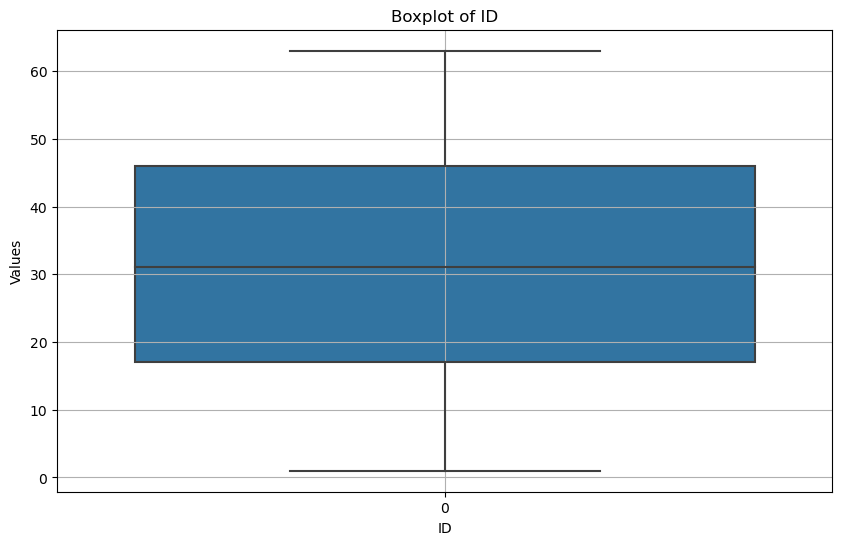

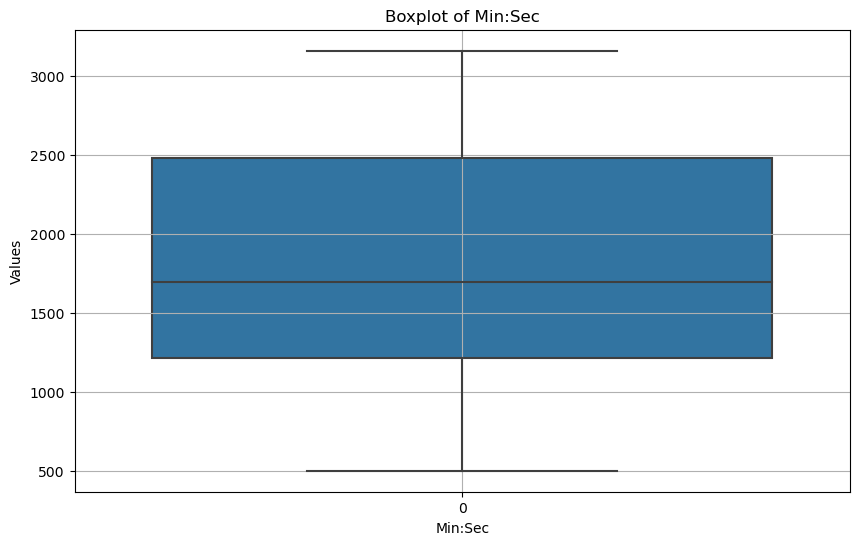

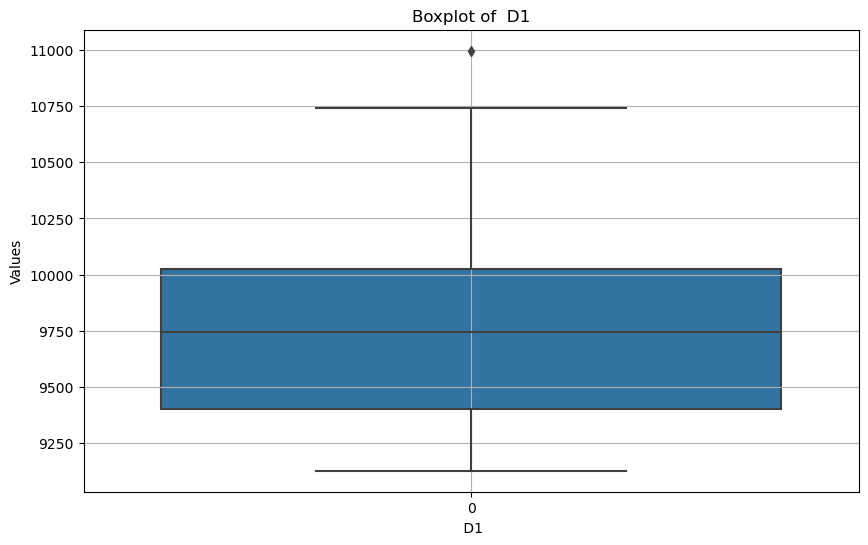

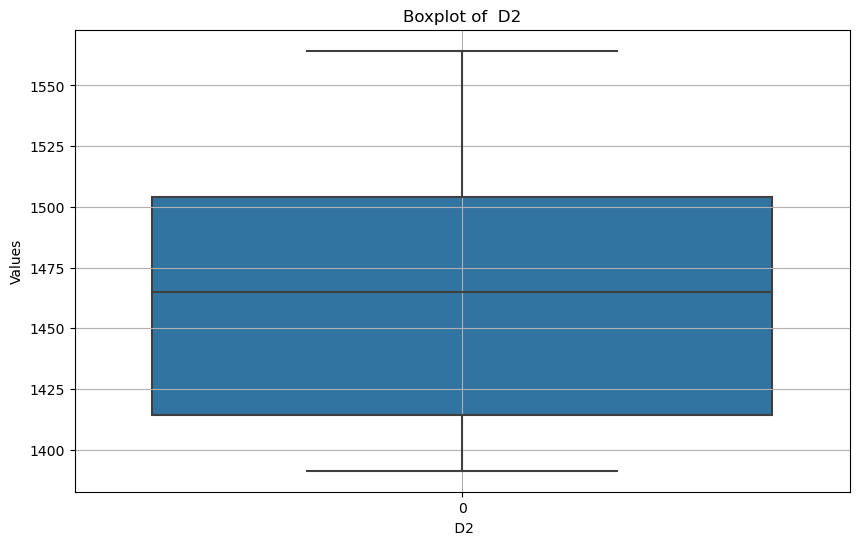

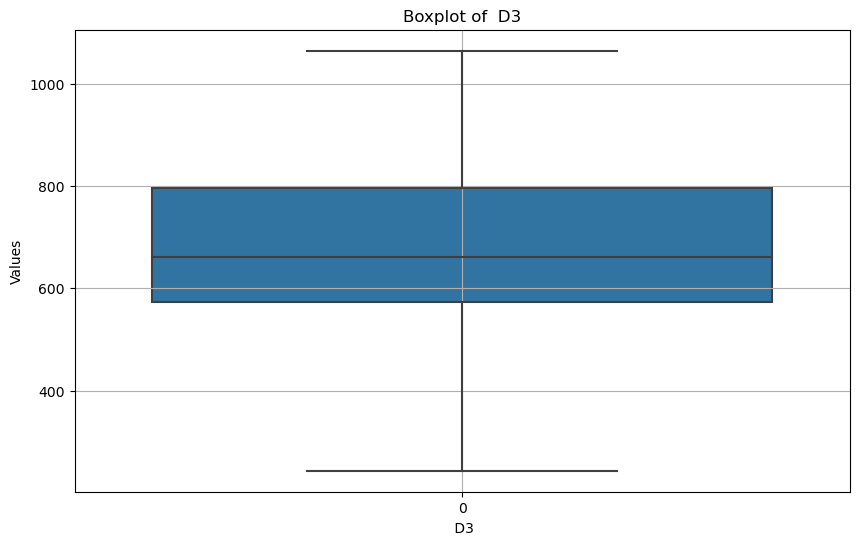

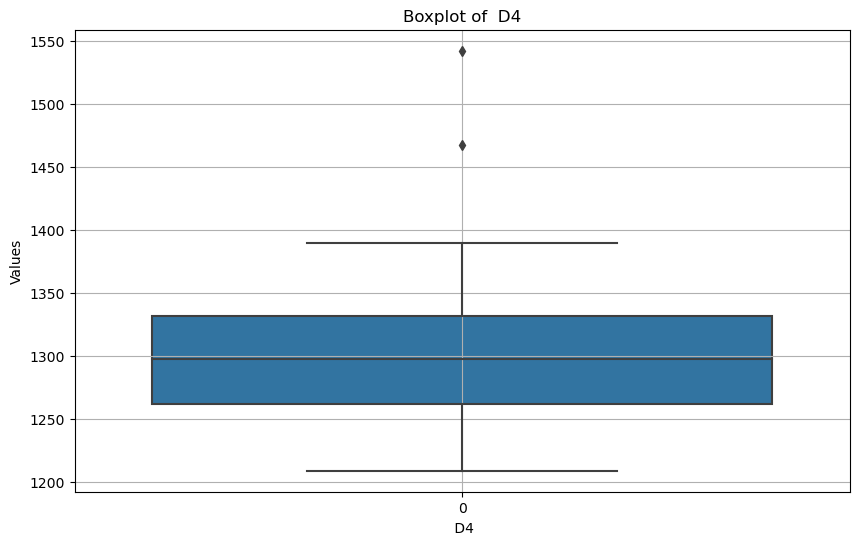

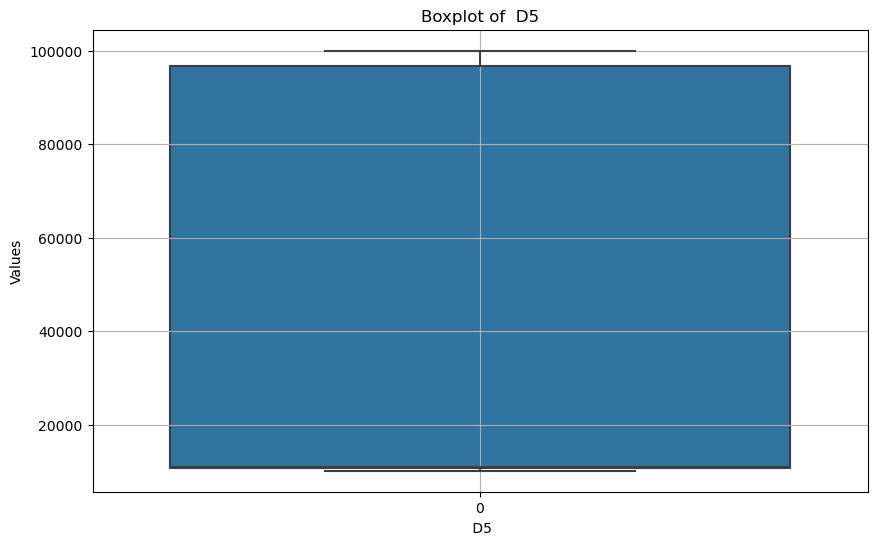

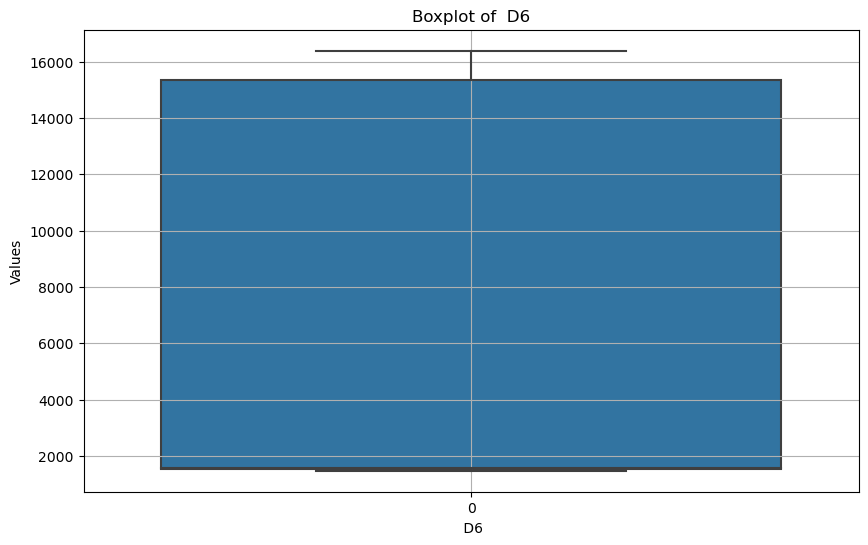

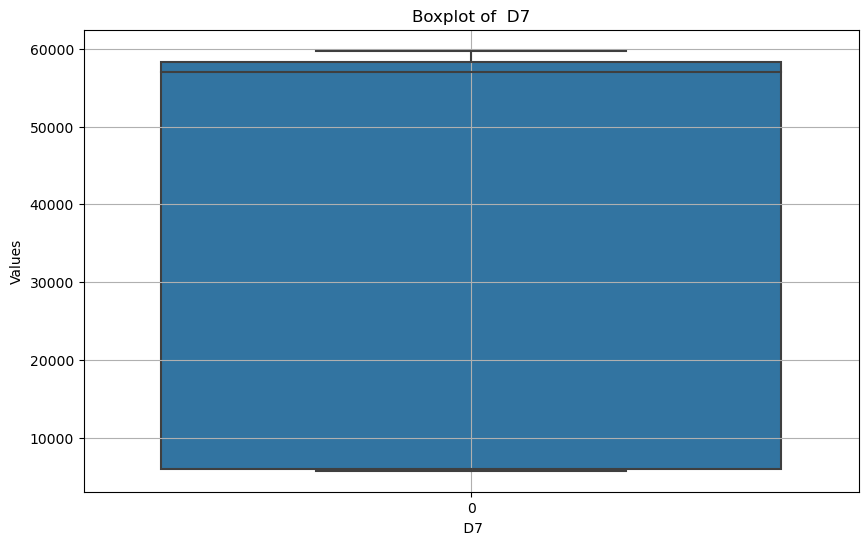

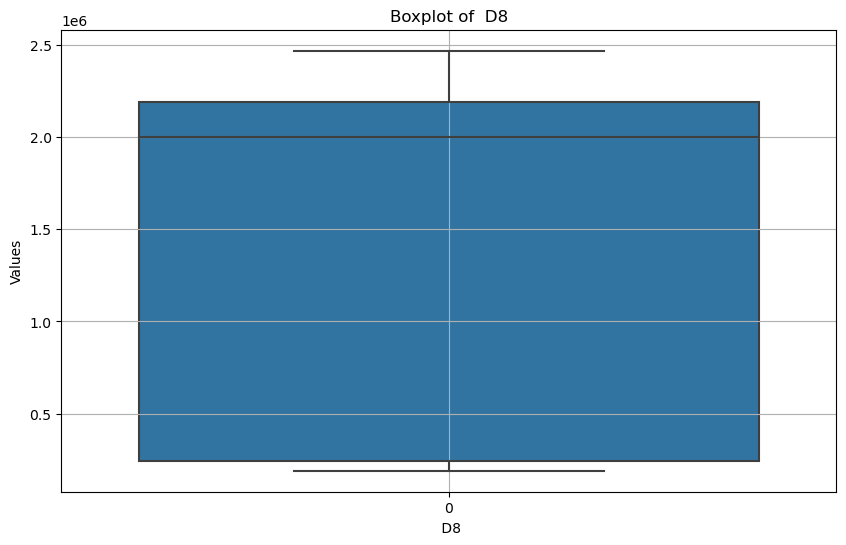

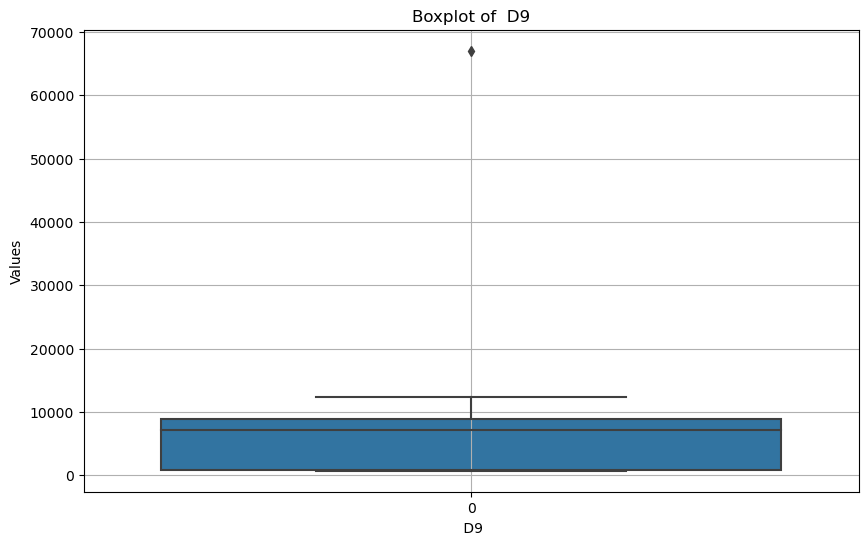

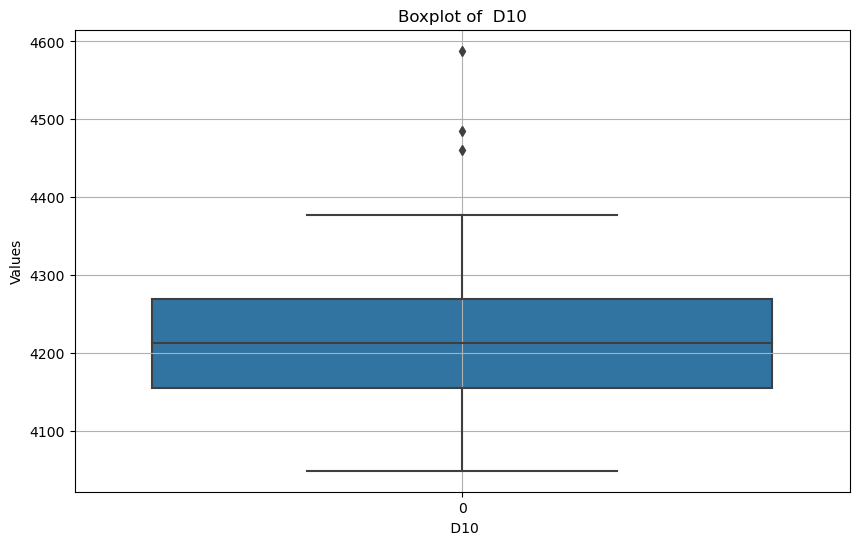

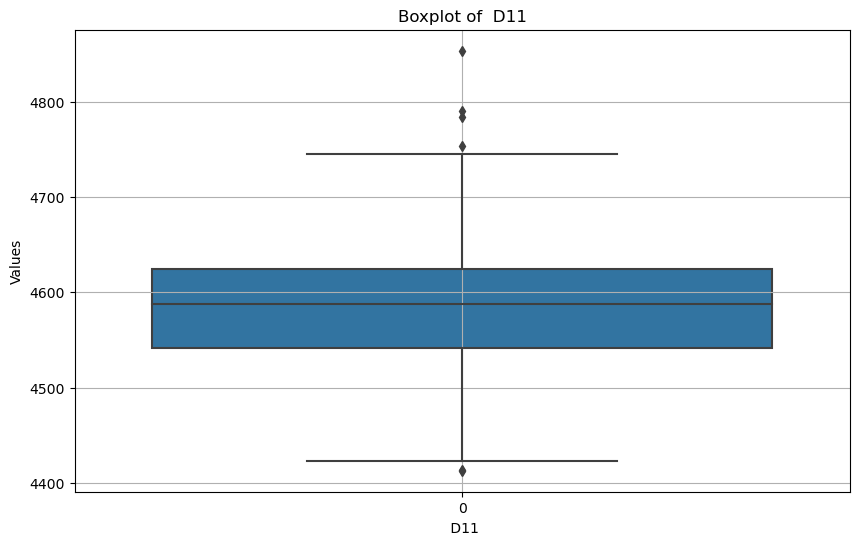

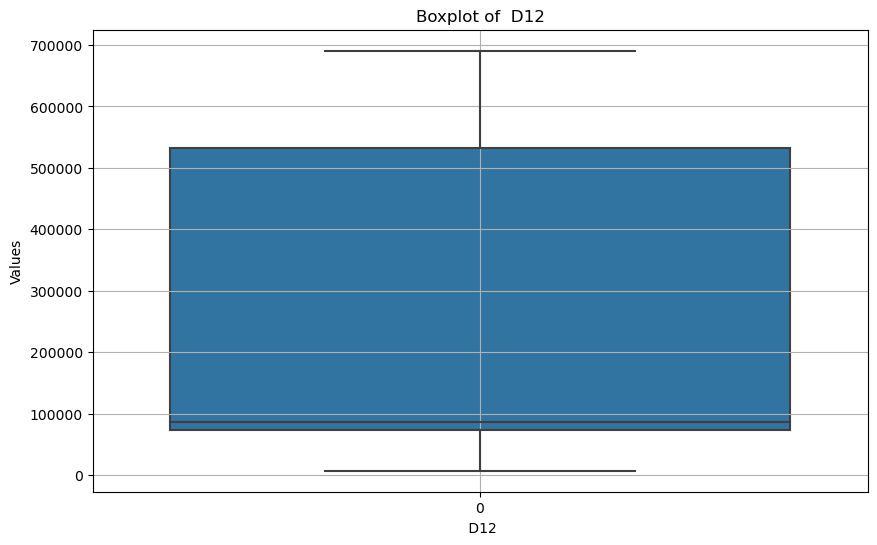

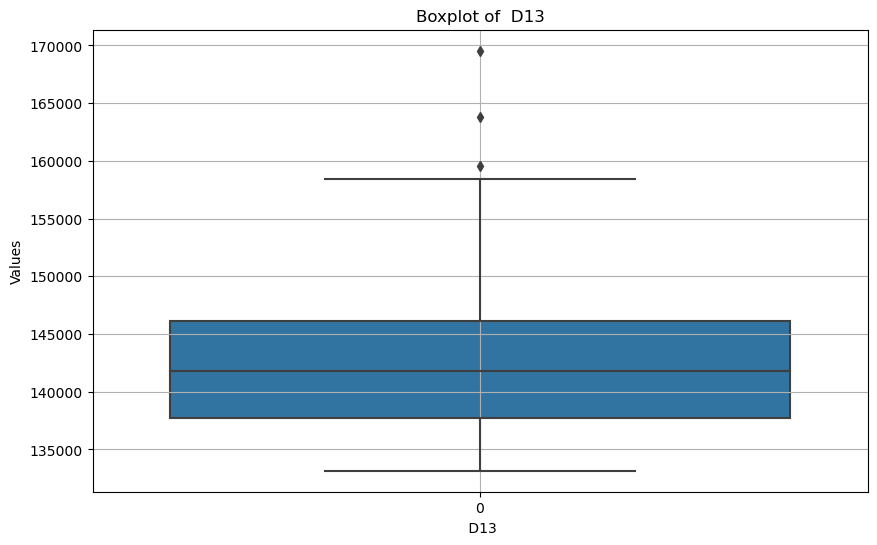

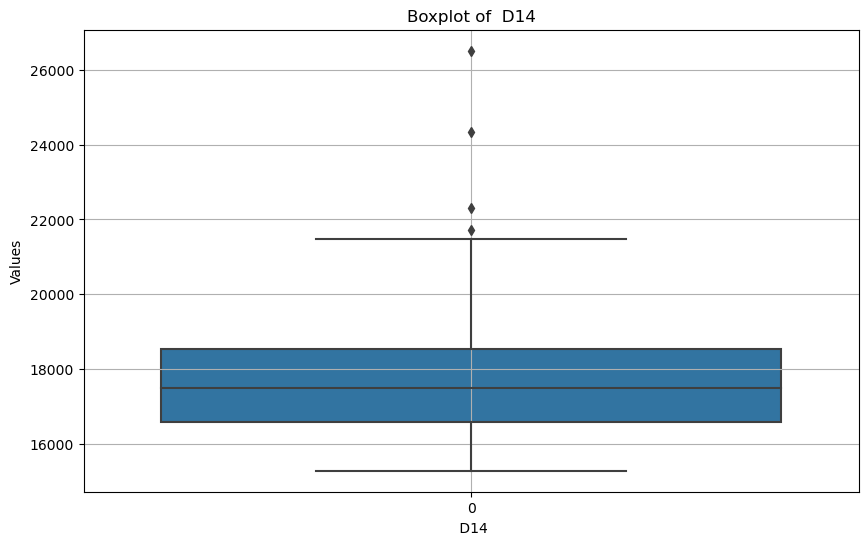

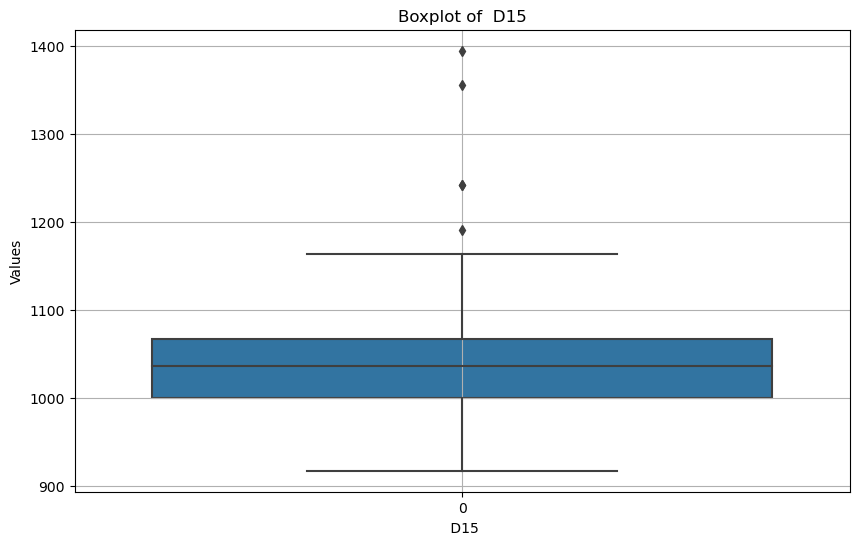

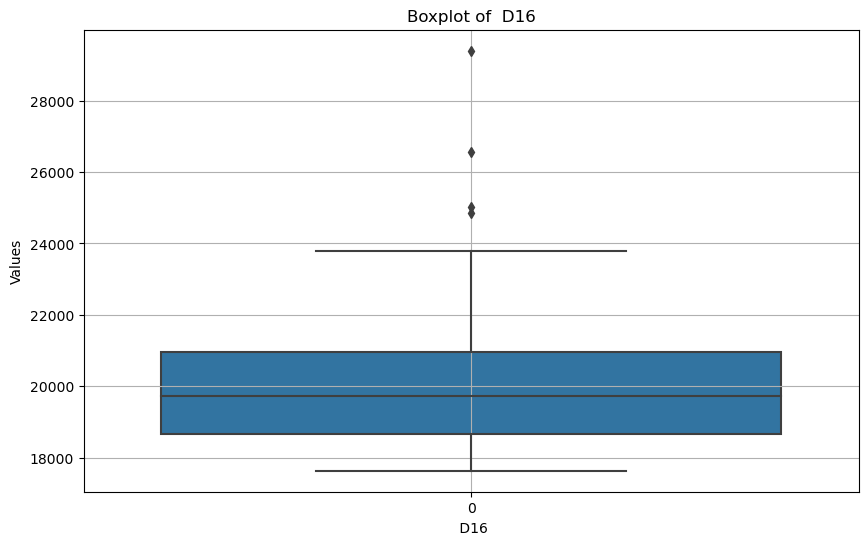

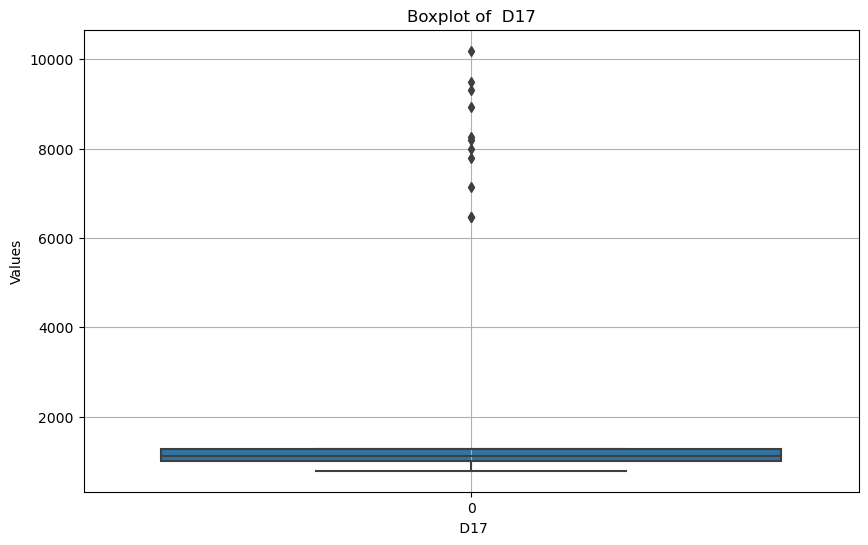

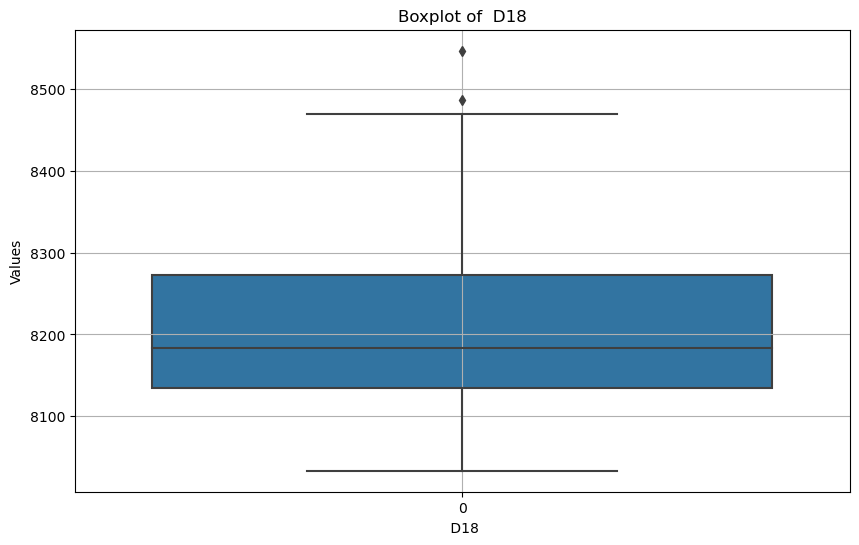

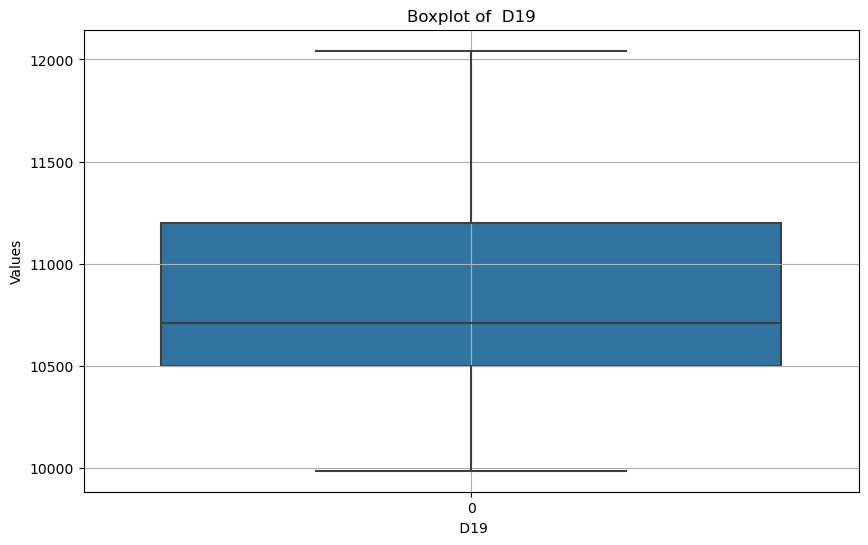

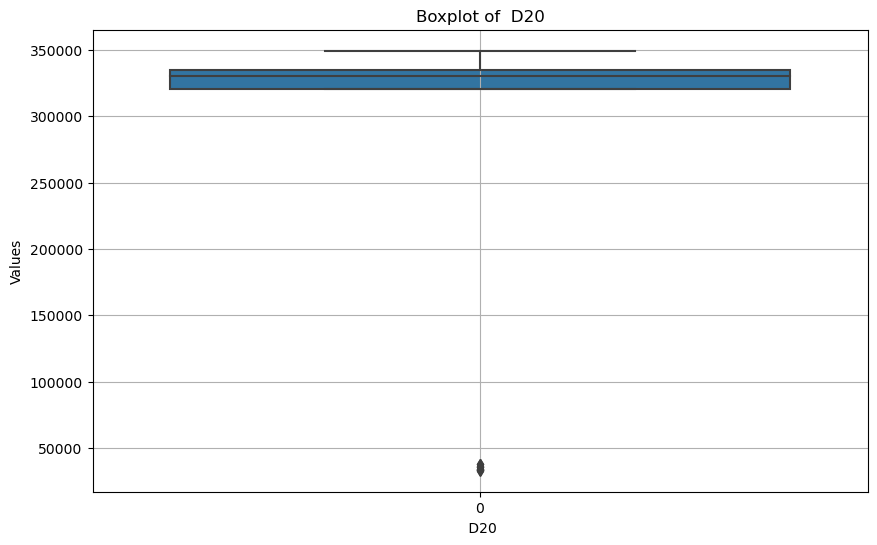

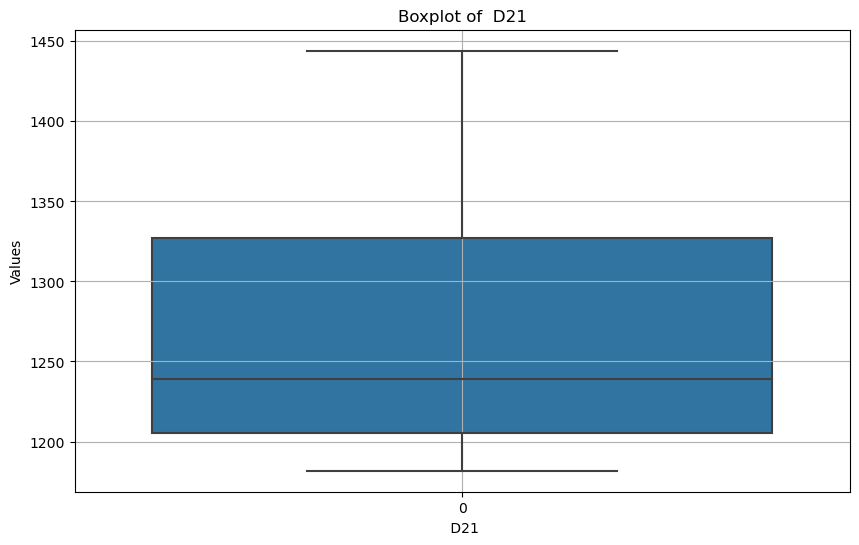

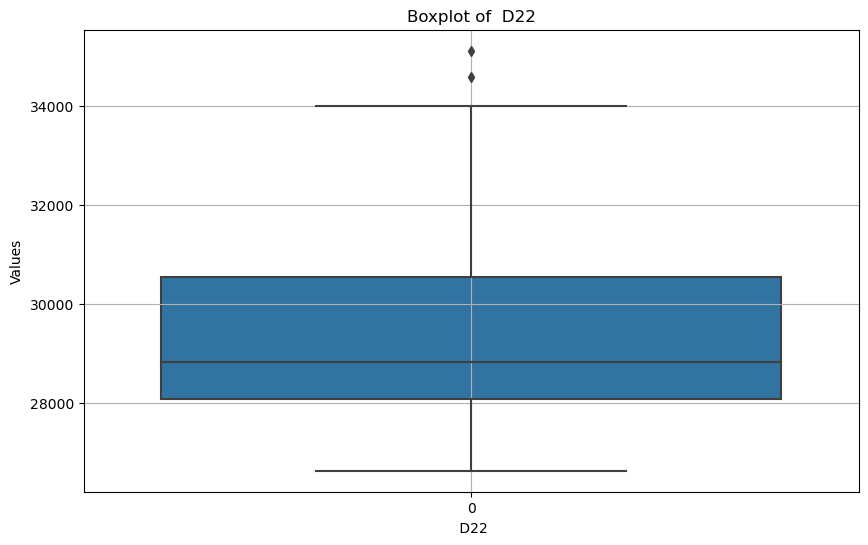

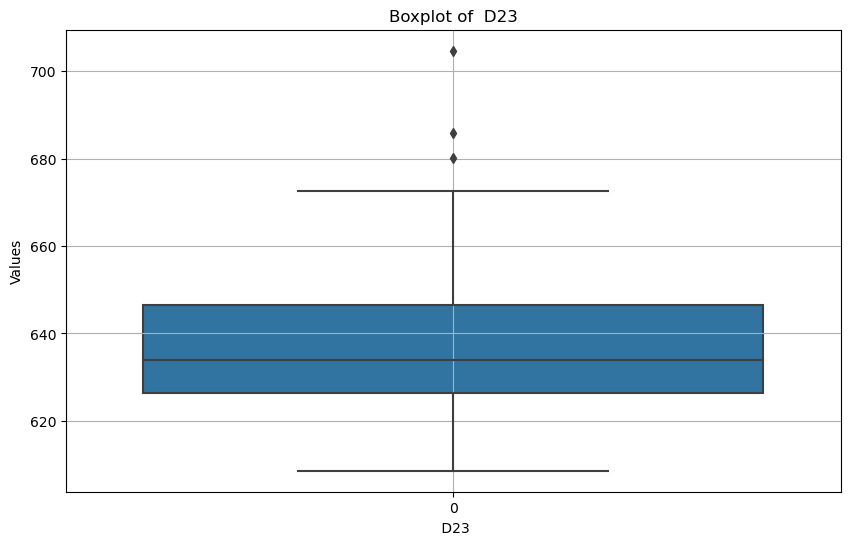

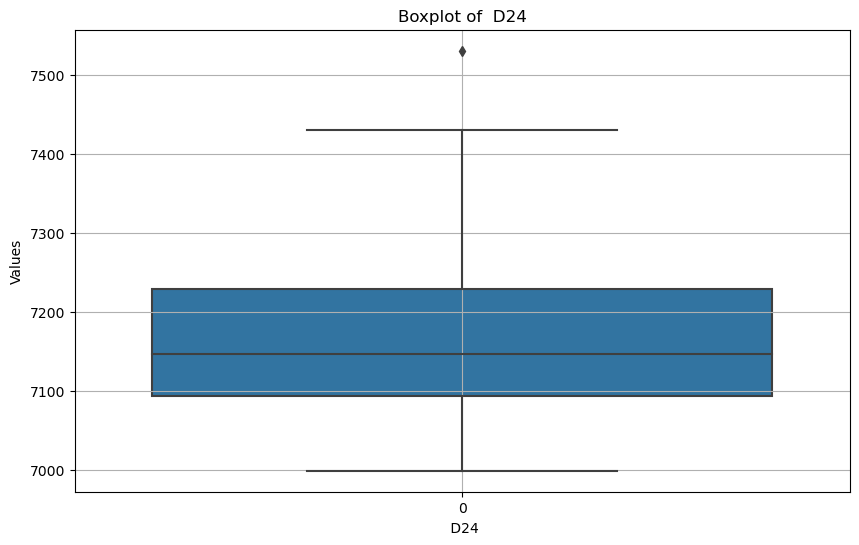

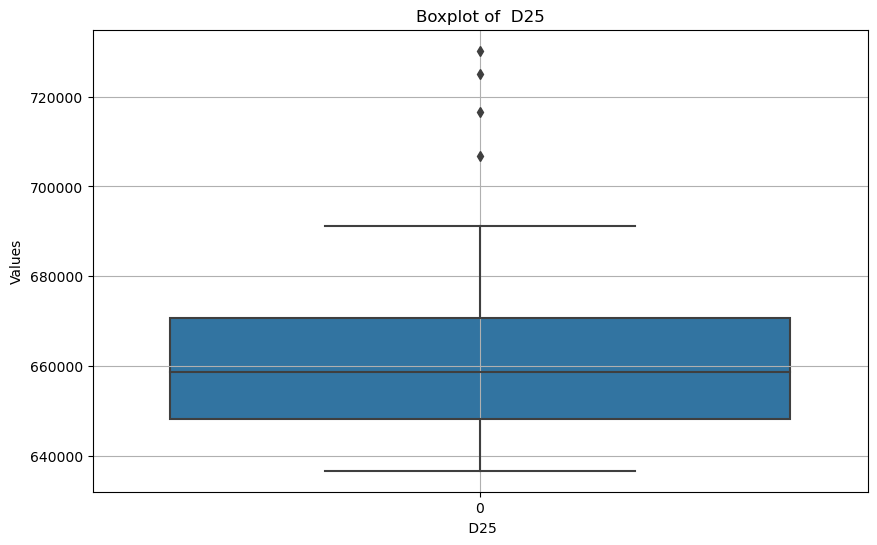

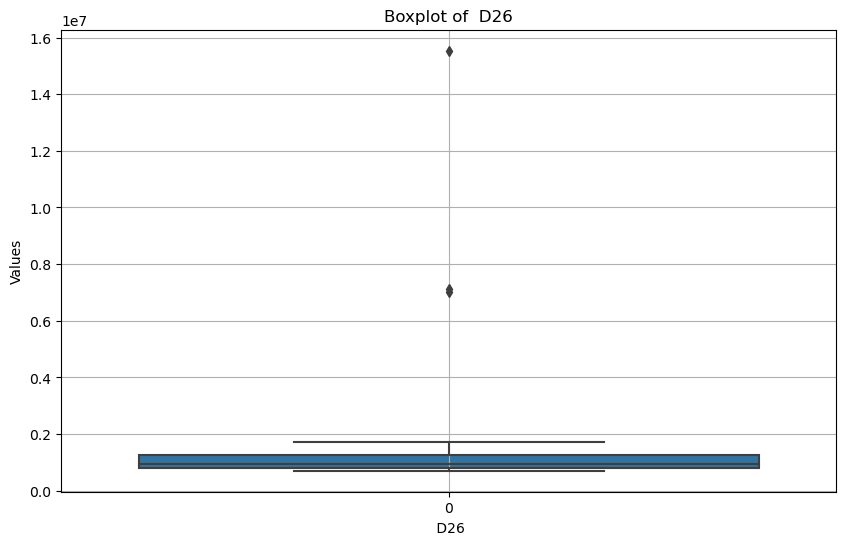

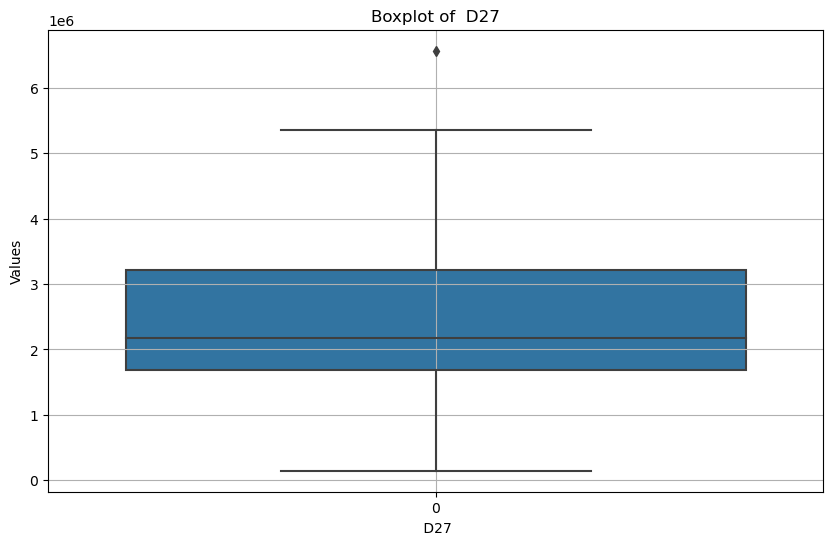

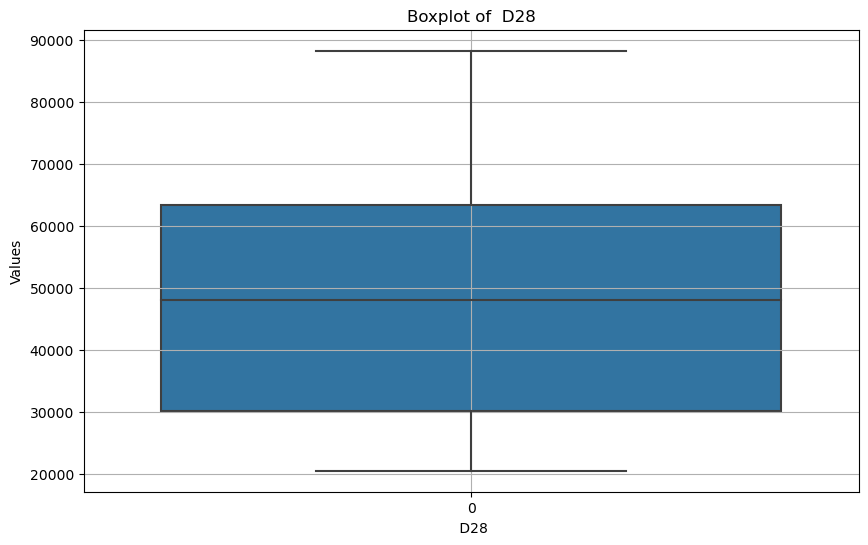

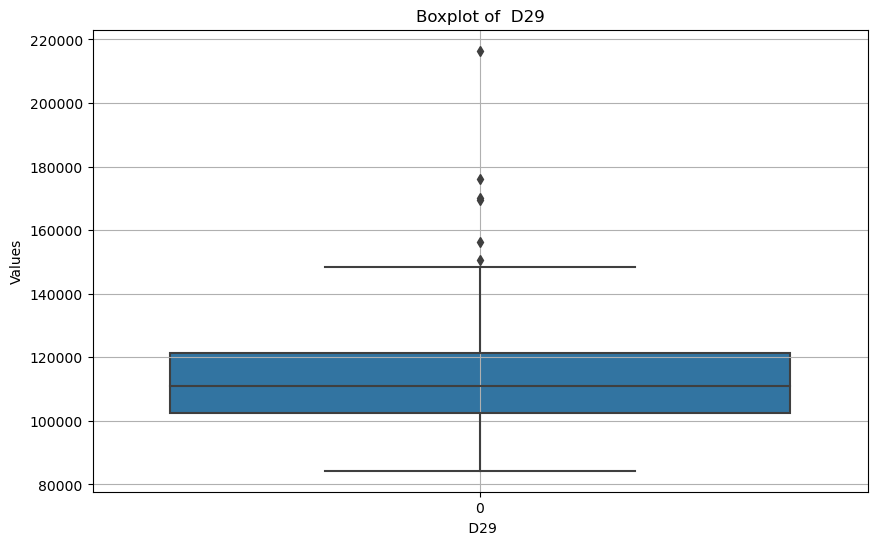

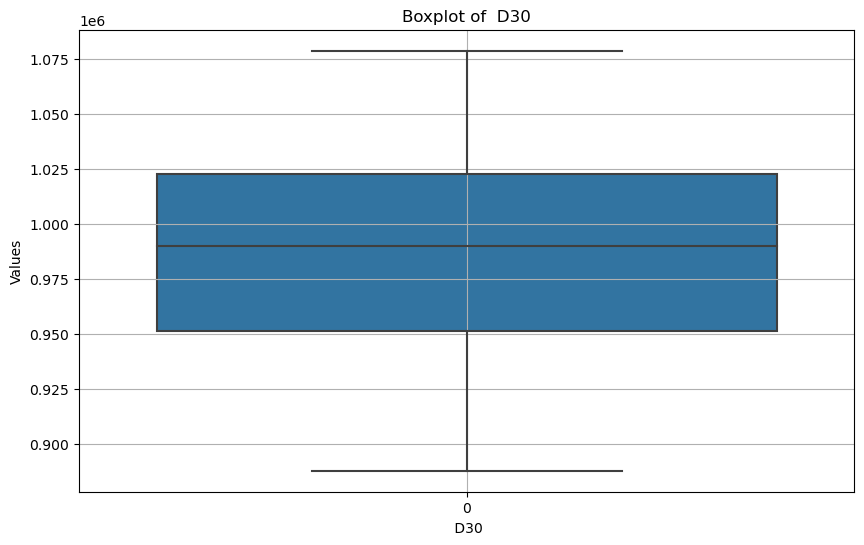

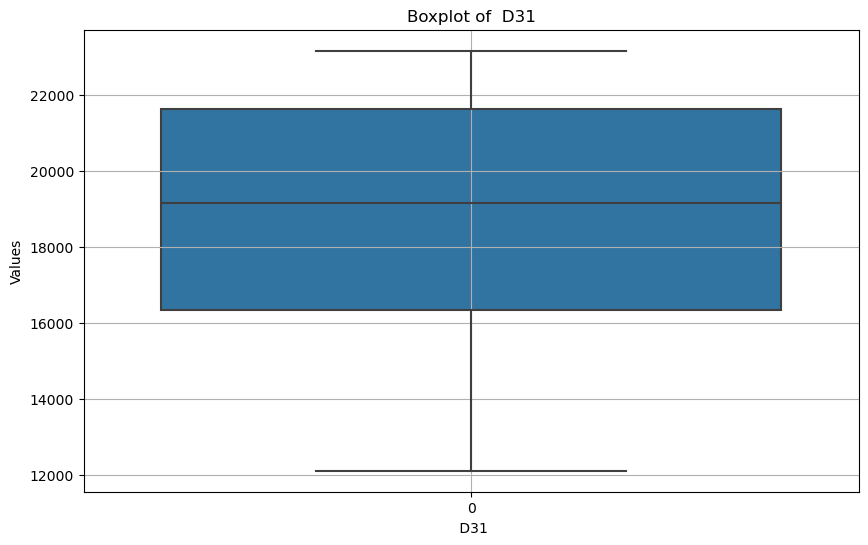

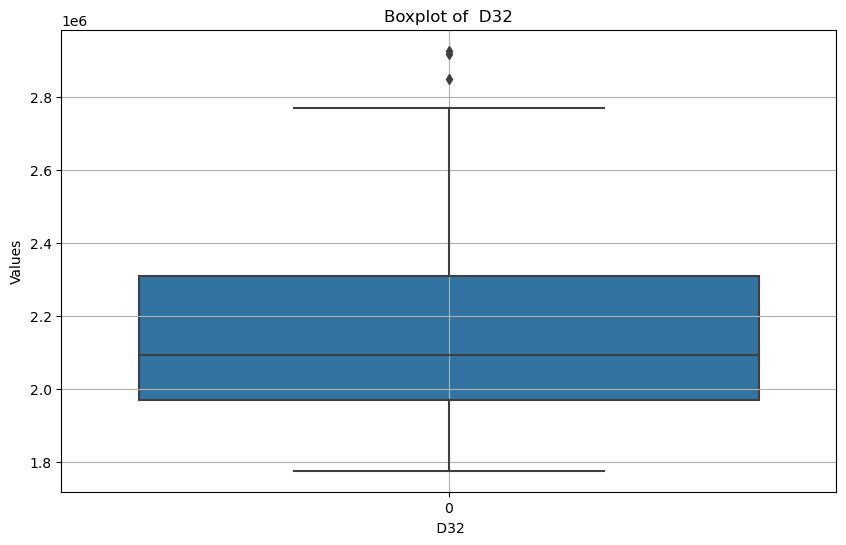

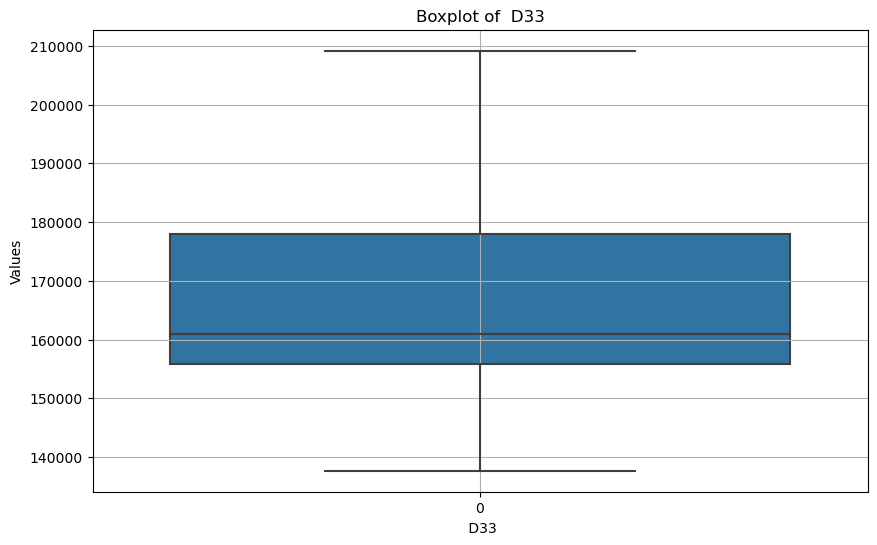

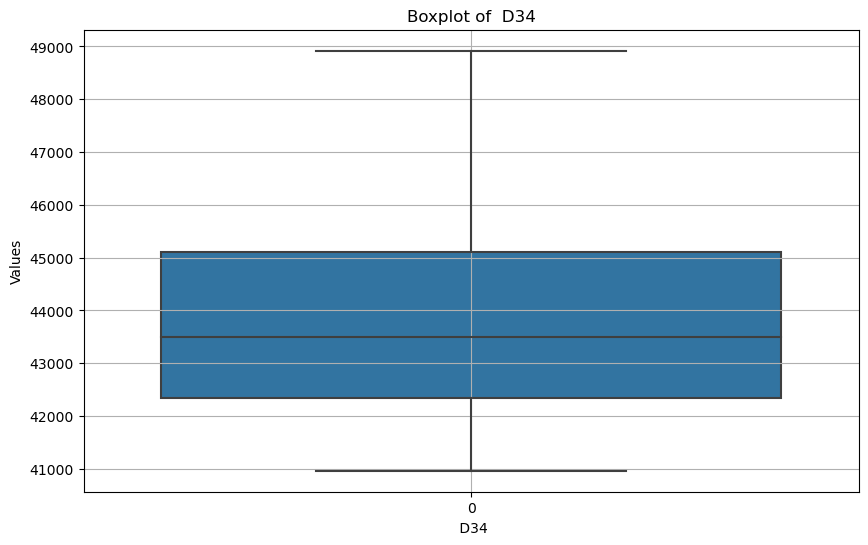

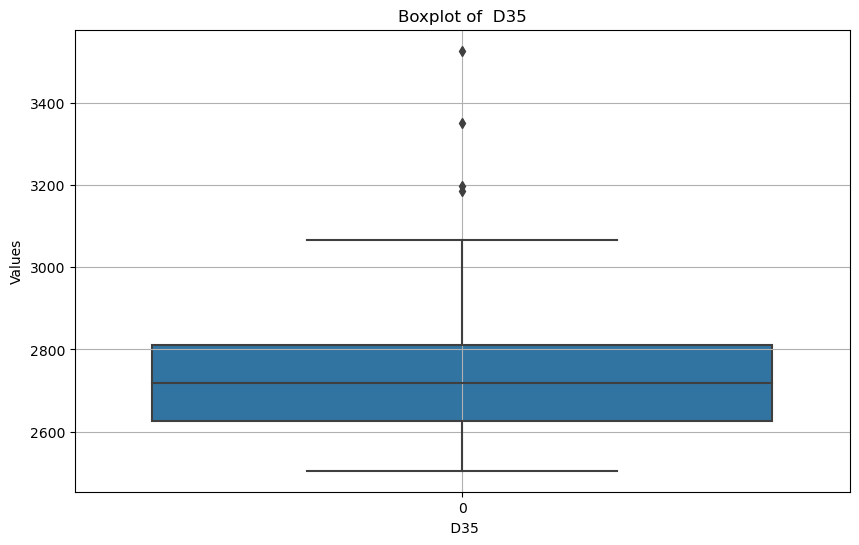

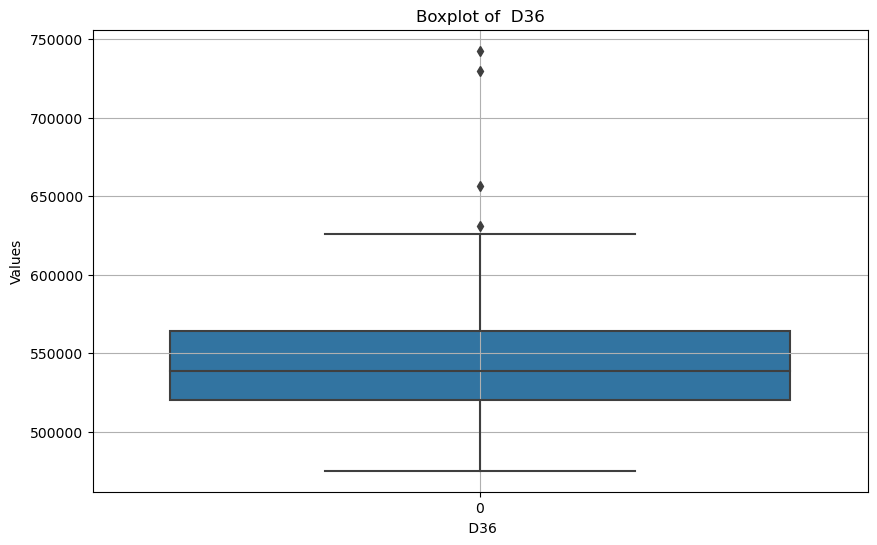

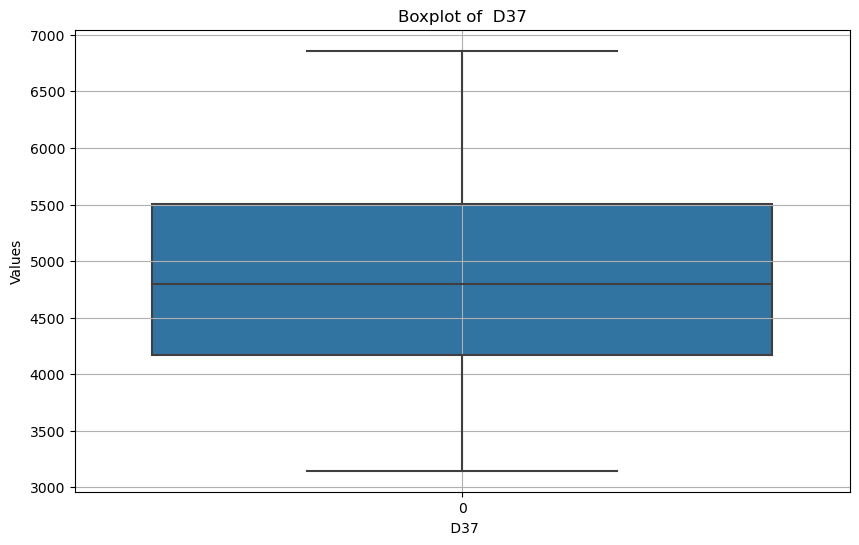

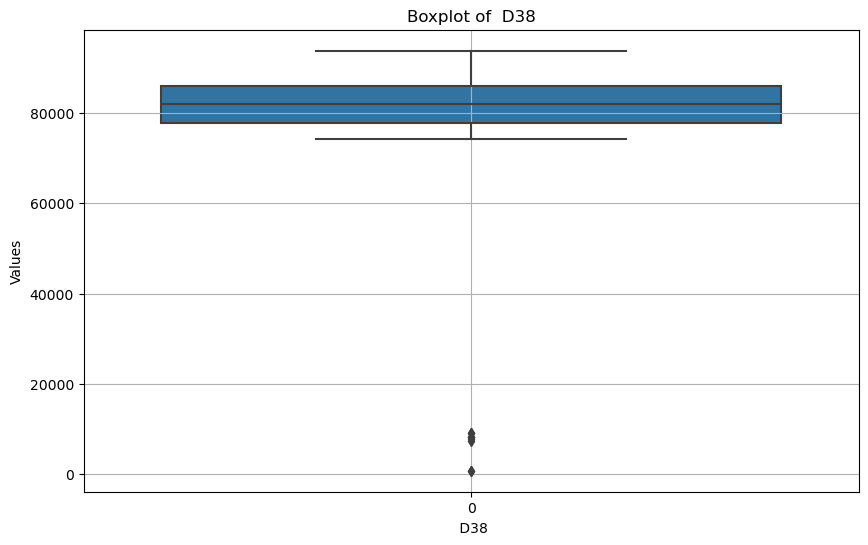

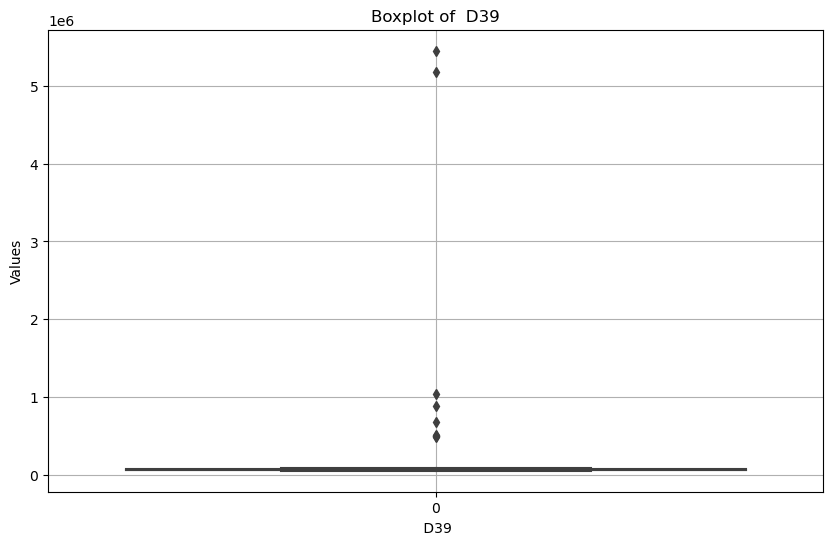

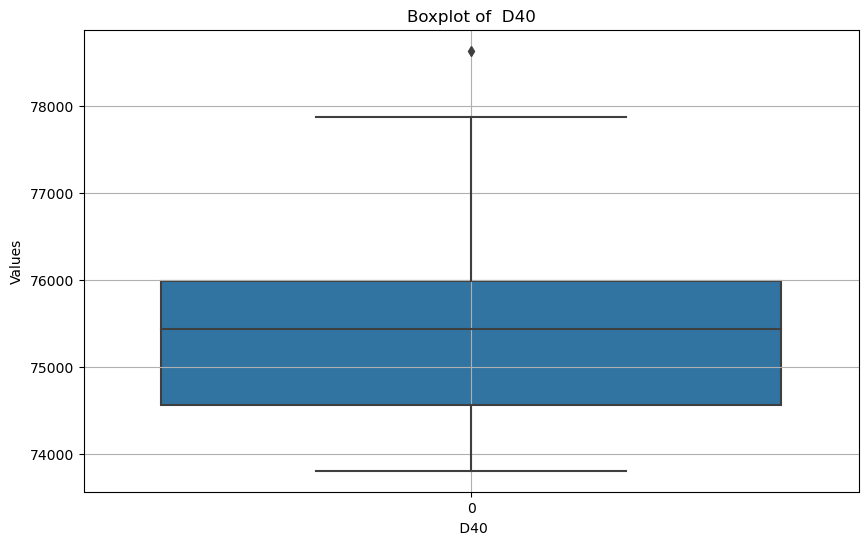

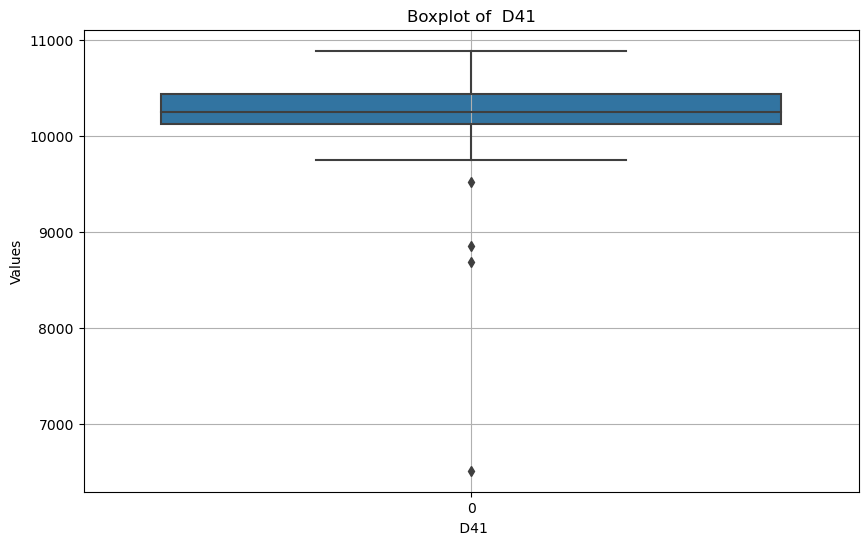

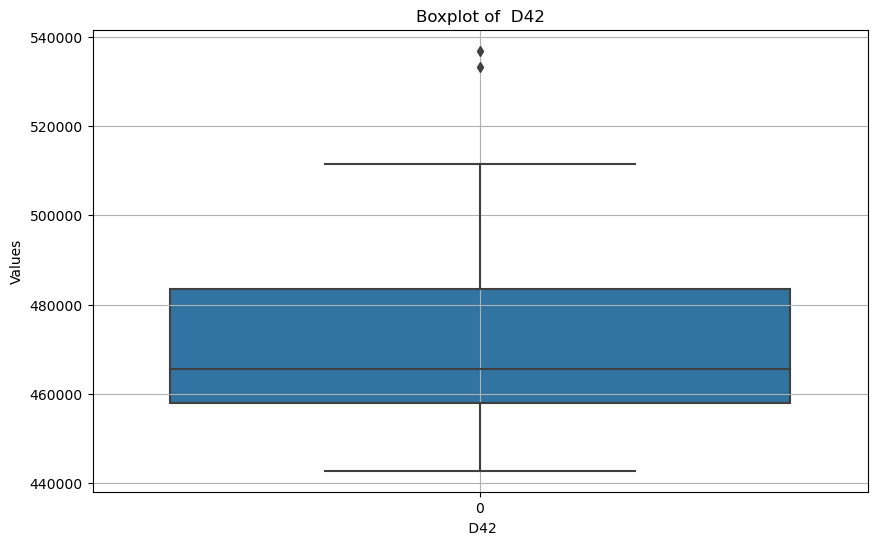

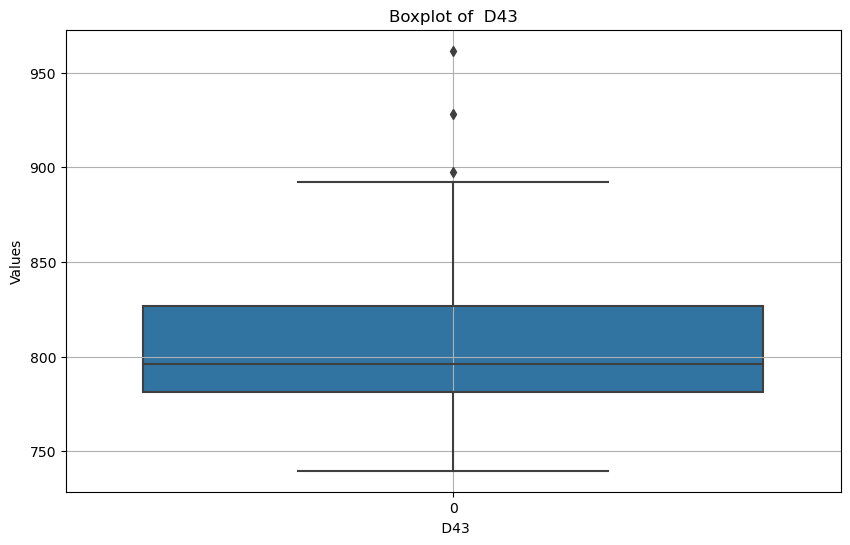

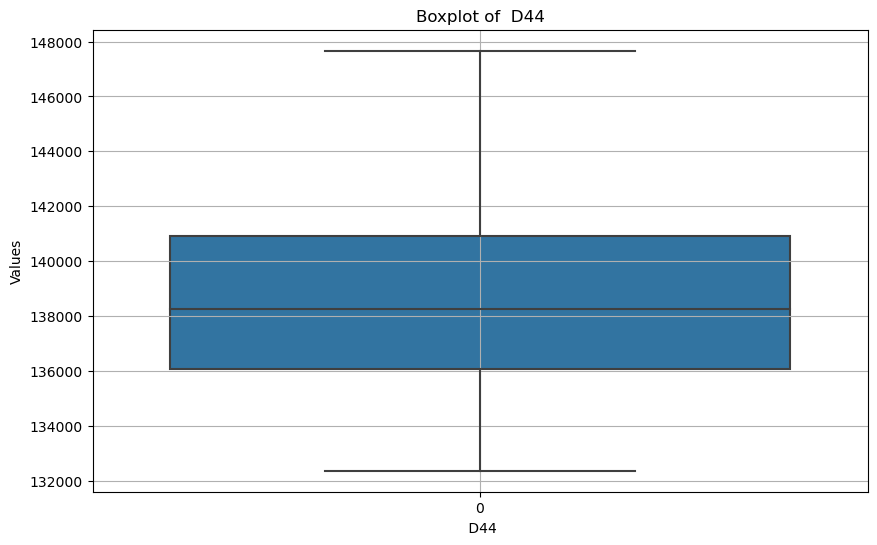

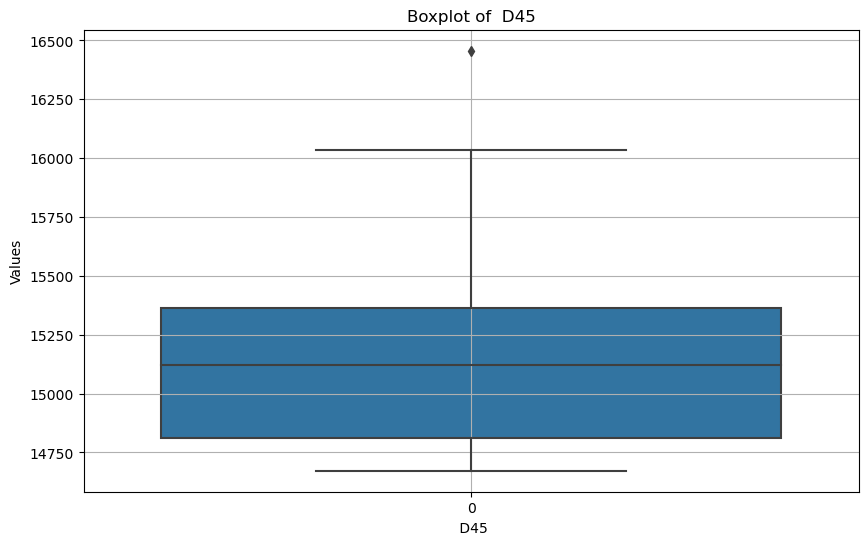

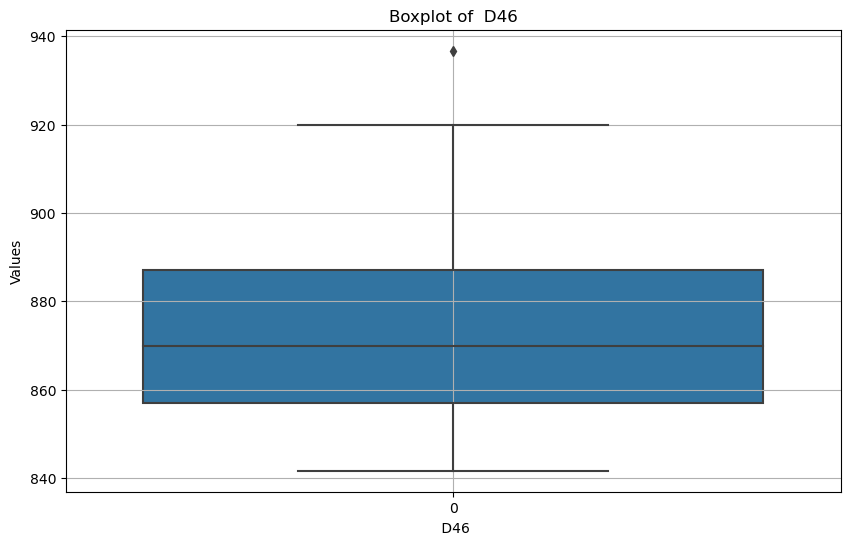

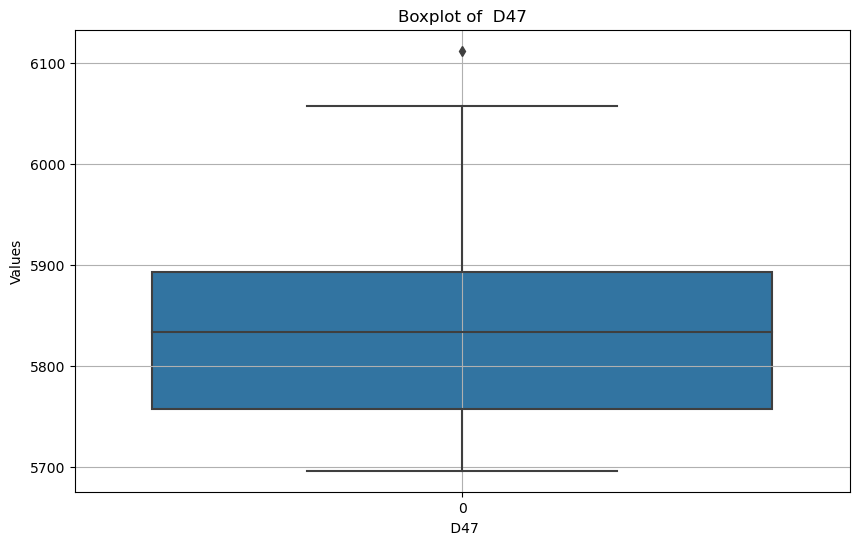

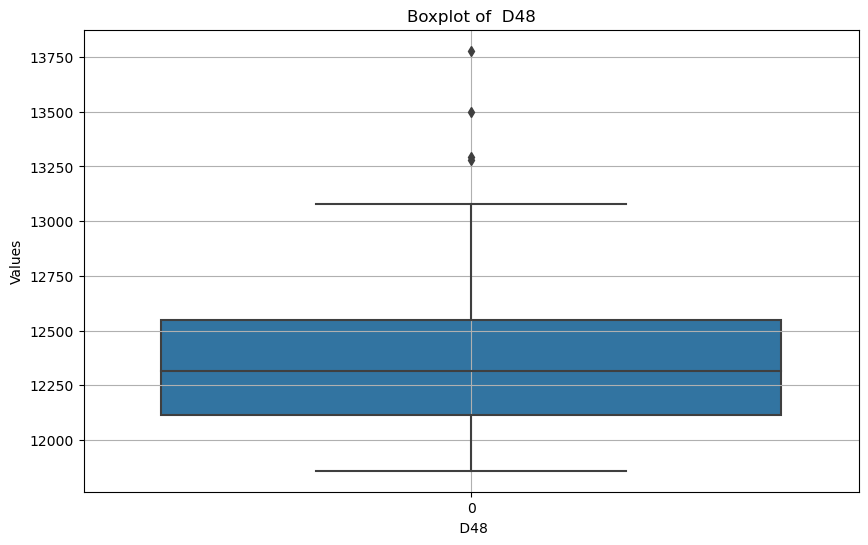

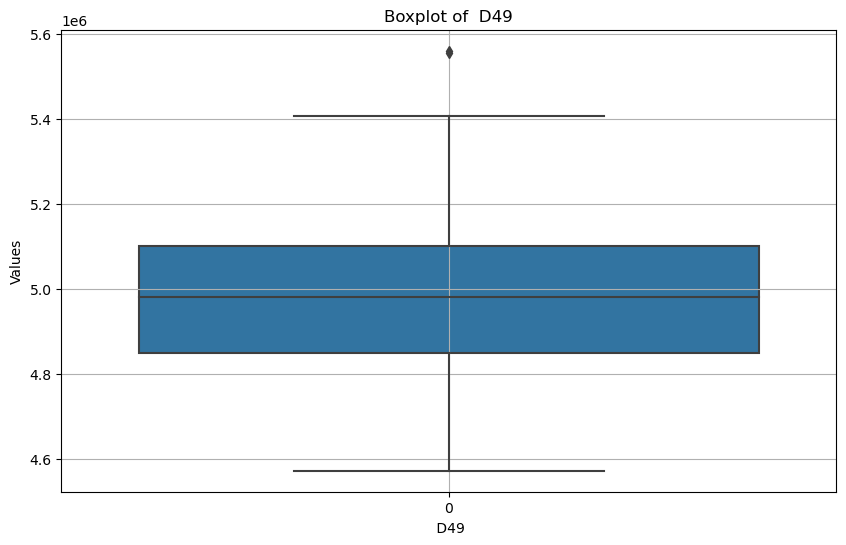

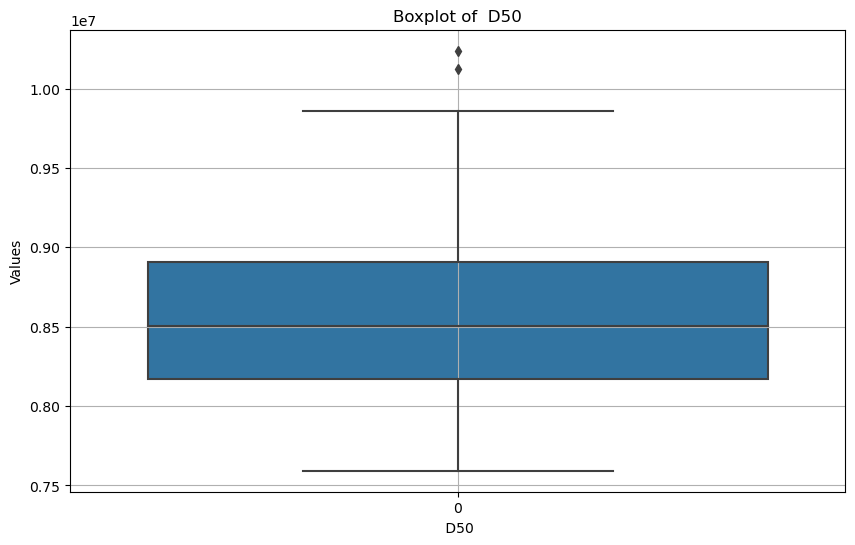

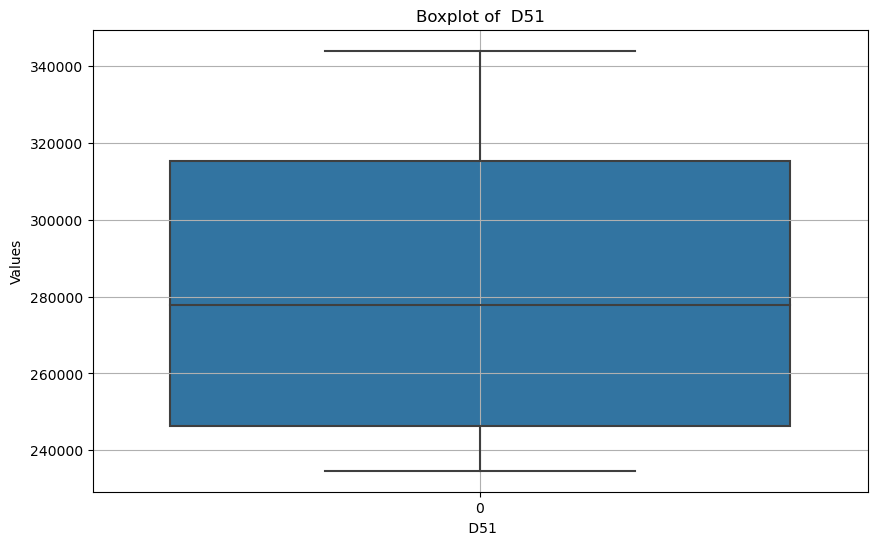

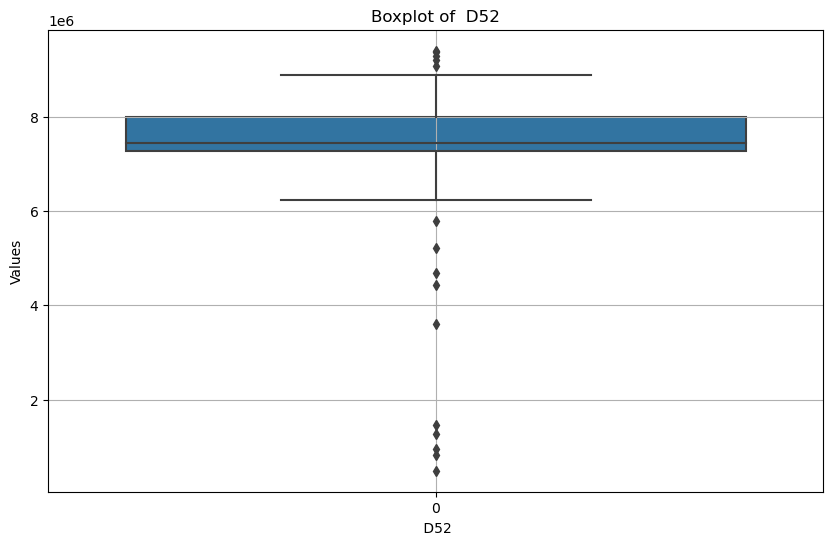

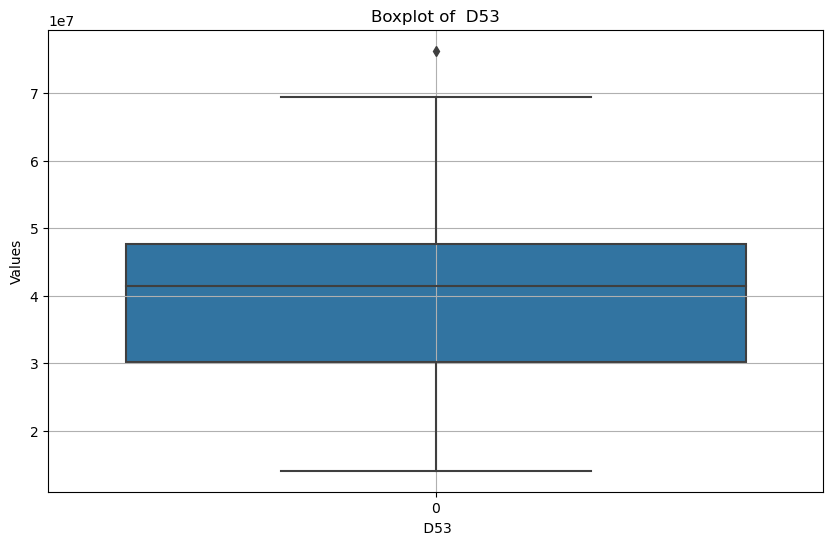

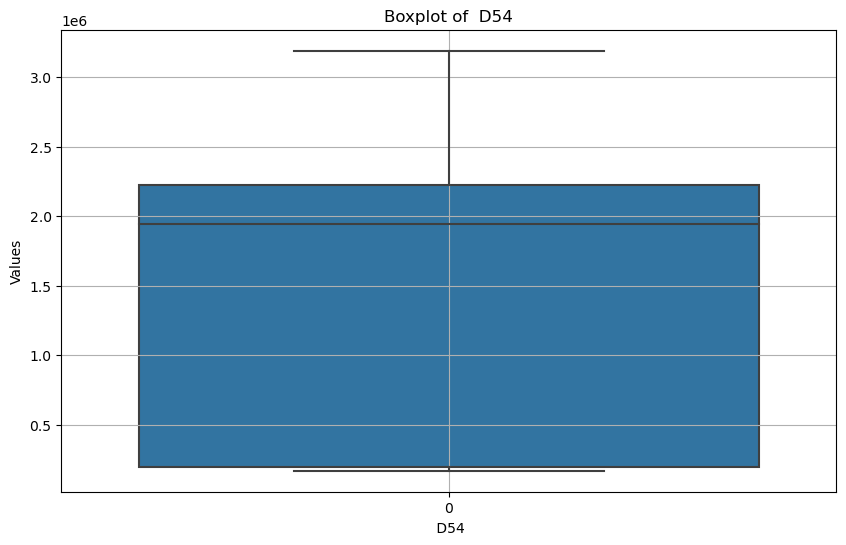

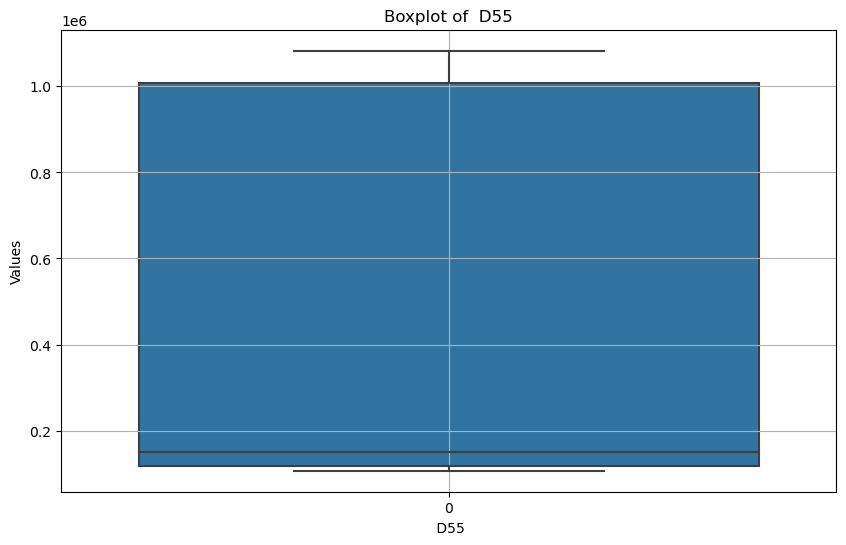

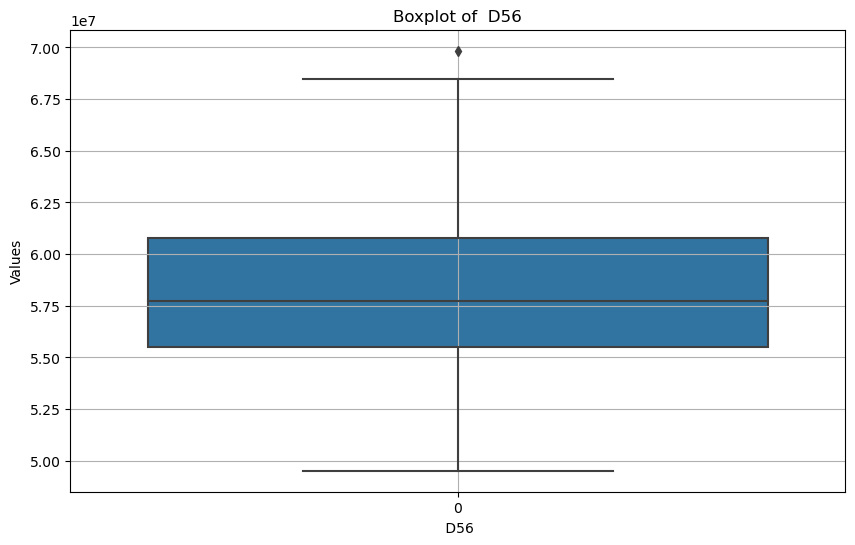

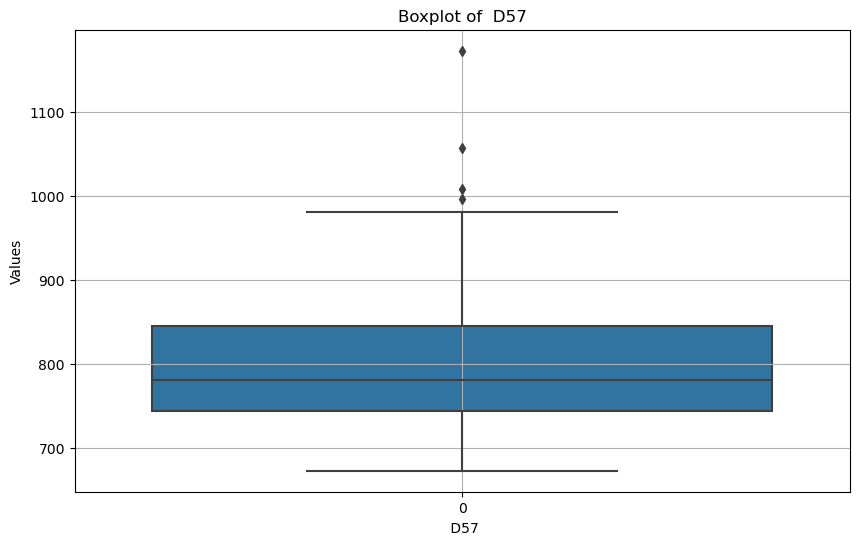

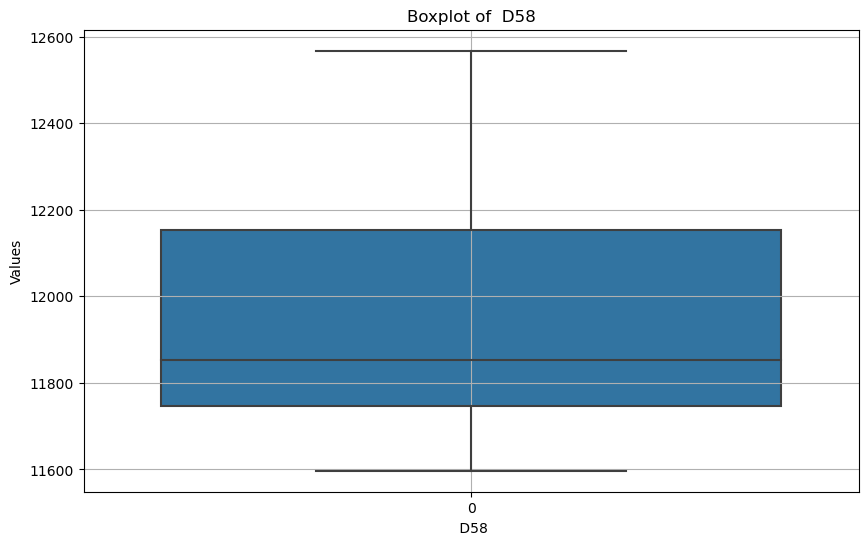

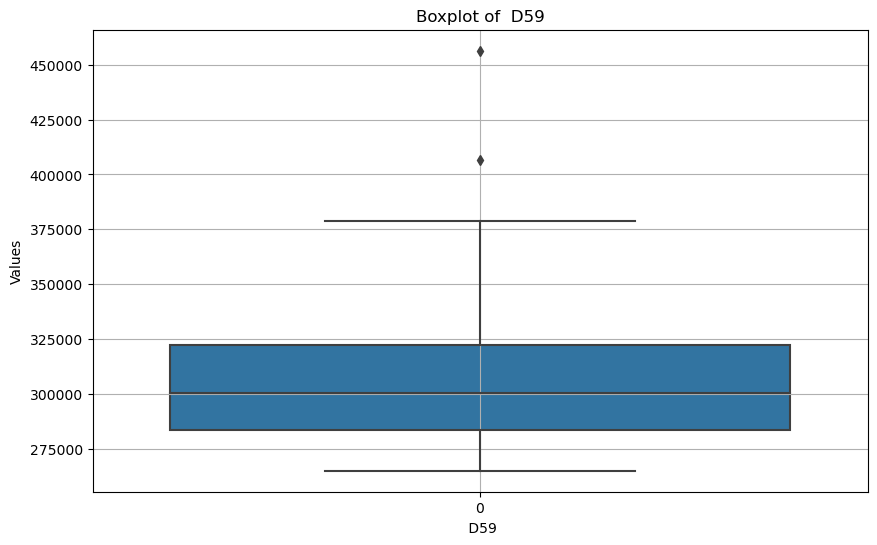

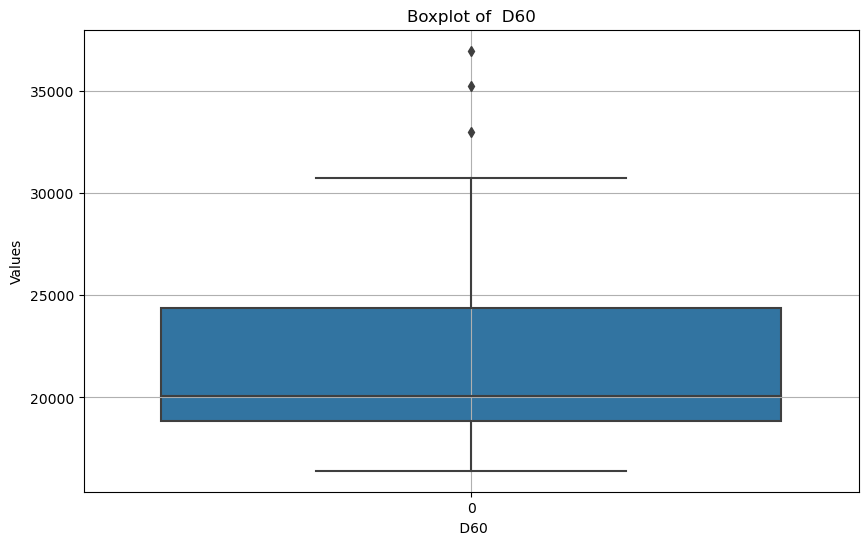

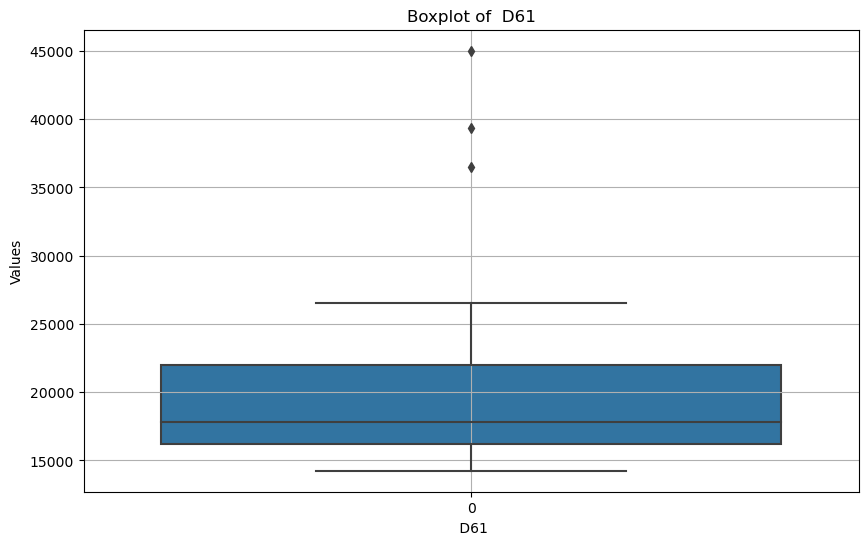

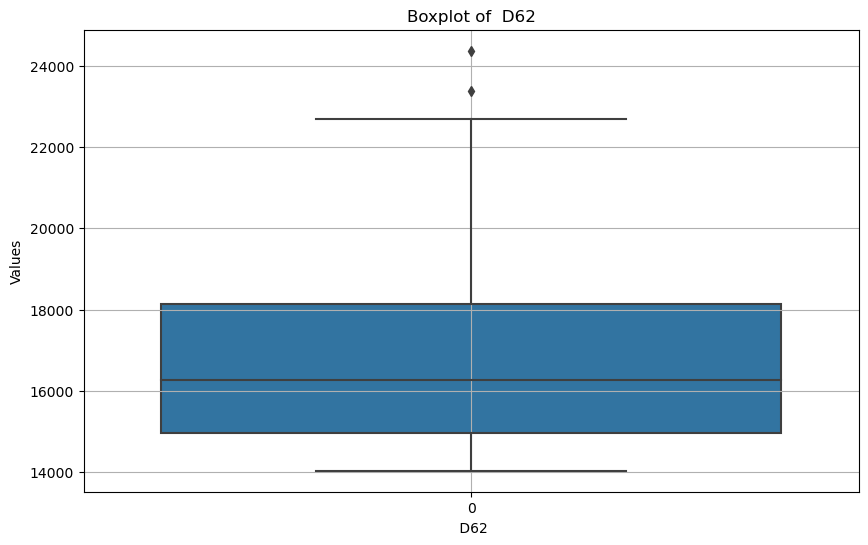

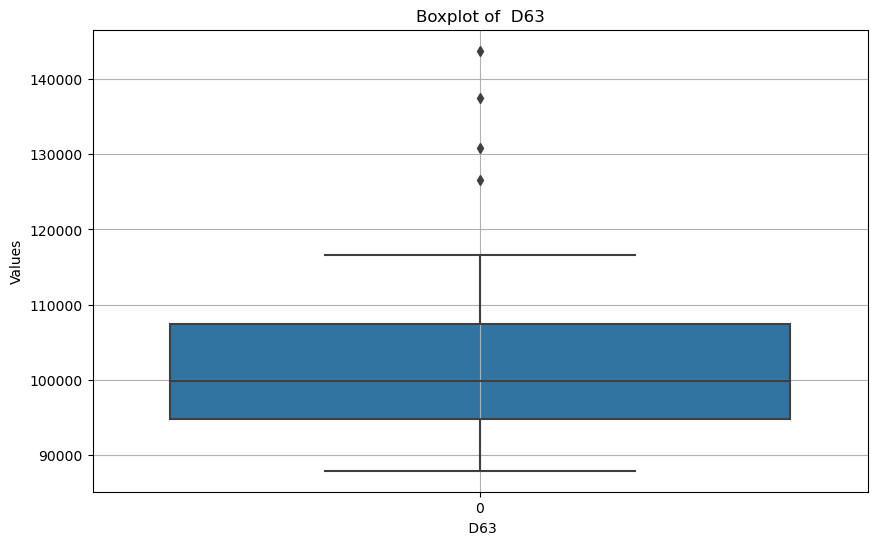

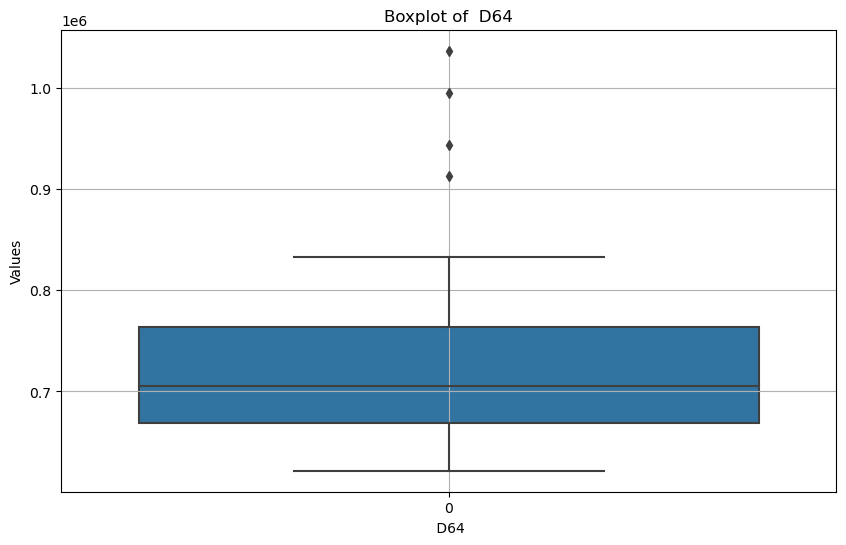

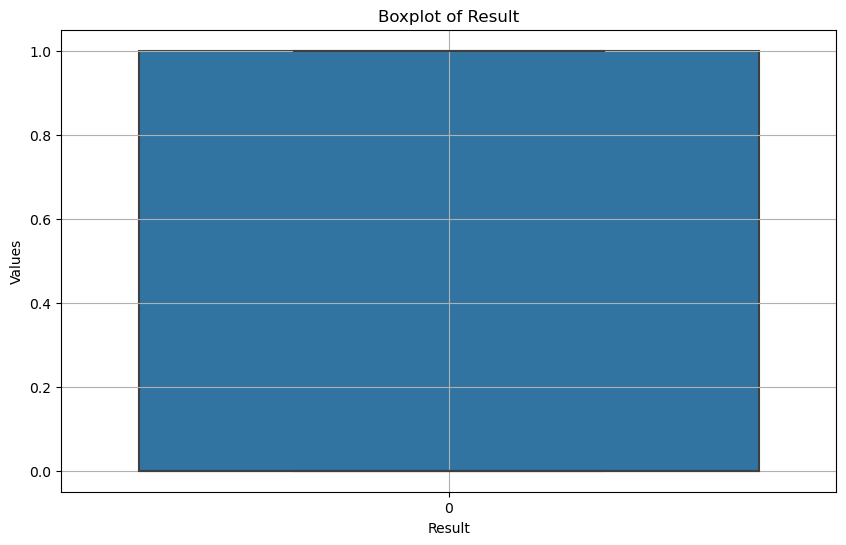

In [39]:
# Traitement des valeurs aberrantes
# Importation des packages
import matplotlib.pyplot as plt
import seaborn as sns
# Sélectionner les colonnes numériques dans le train
numerical_columns = train.select_dtypes(include='number').columns

# Créer des boxplots pour chaque colonne numérique
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.grid(True)
    plt.show()

In [40]:
# Importation des packages
import numpy as np
from sklearn.ensemble import IsolationForest

In [41]:
# Utilisation de l'isolation forest pour la détermination des valeurs aberrantes
# Appliquer l'Isolation Forest sur les données de train
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(train)

# Ajouter les labels d'anomalie au DataFrame
train['Outlier'] = outlier_labels

# Afficher les outliers
outliers = train[train['Outlier'] == -1]
print("Outliers détectés:")
print(outliers)

Outliers détectés:
    ID      Min:Sec            D1           D2           D3           D4  \
19  28  2646.179679  10617.232502  1543.448530   821.030427  1389.824329   
20  29  1686.010667  10996.293984  1564.314701   928.735528  1542.120512   
21  30  2736.189067  10743.270387  1542.966235   930.552157  1467.139990   
22  31  1598.398928  10612.942425  1538.472400   826.311500  1383.752494   
24  36   879.927807  10273.120446  1521.964721  1064.062796  1303.036736   

              D5            D6           D7            D8  ...          D57  \
19  11337.045081  15704.642385  6100.328060  2.178938e+06  ...   981.288774   
20  11321.061020  15826.992950  6167.219481  2.189372e+06  ...  1173.258249   
21  11250.024910  15850.038454  6117.735830  2.207191e+06  ...  1057.152835   
22  11201.703638  15359.475997  5964.398643  2.112471e+06  ...  1008.923766   
24  11386.171539  15724.774857  5992.101463  2.382801e+06  ...   835.344144   

             D58            D59           D60    

C:\Users\ROYAL COMPUTER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


On remarque dans le train que sur 45 lignes,5 comportent des valeurs aberrantes

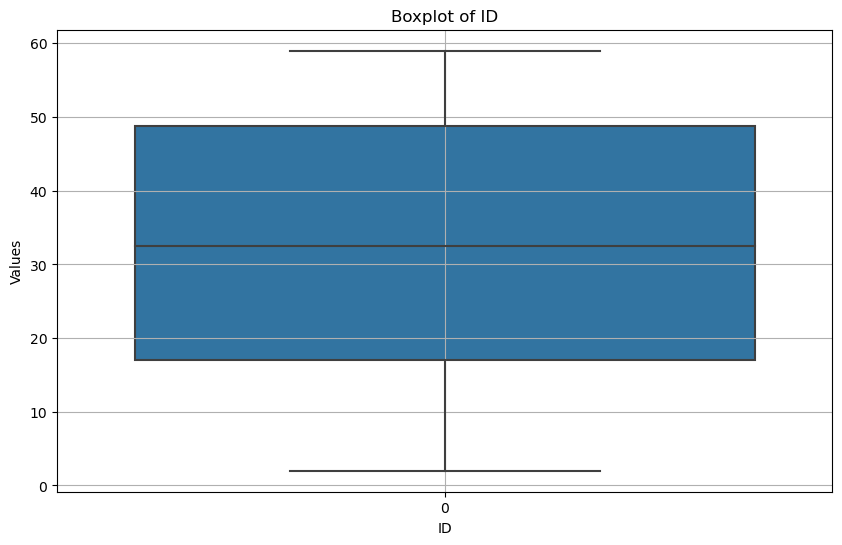

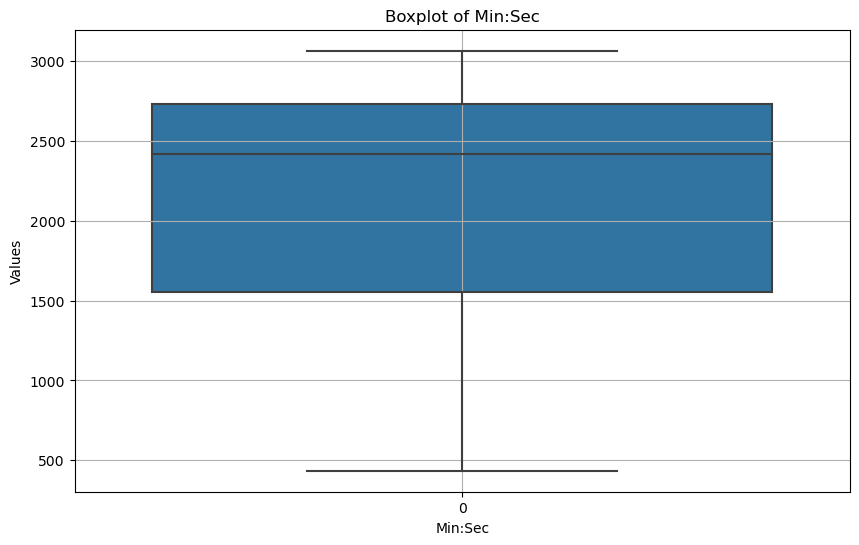

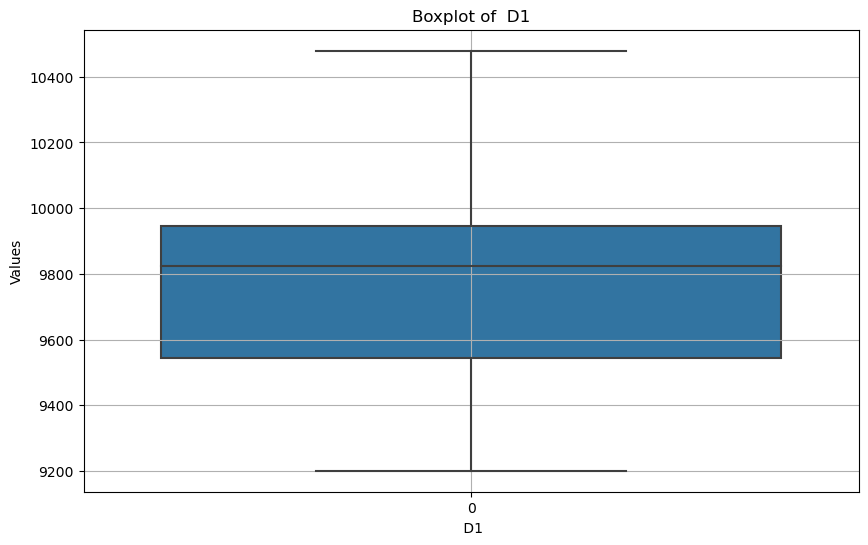

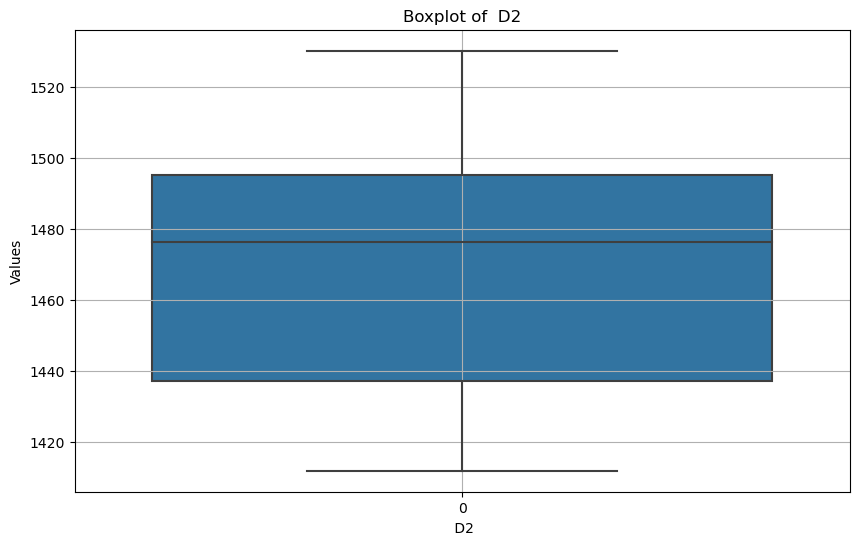

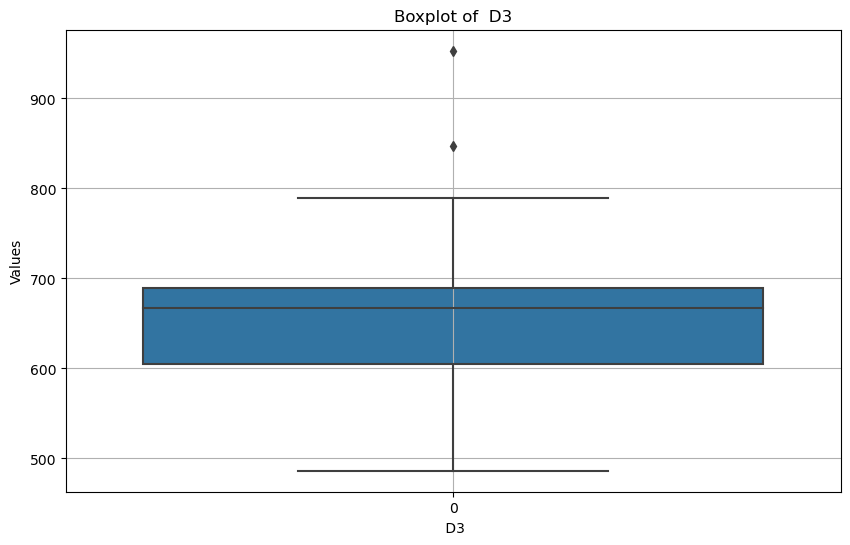

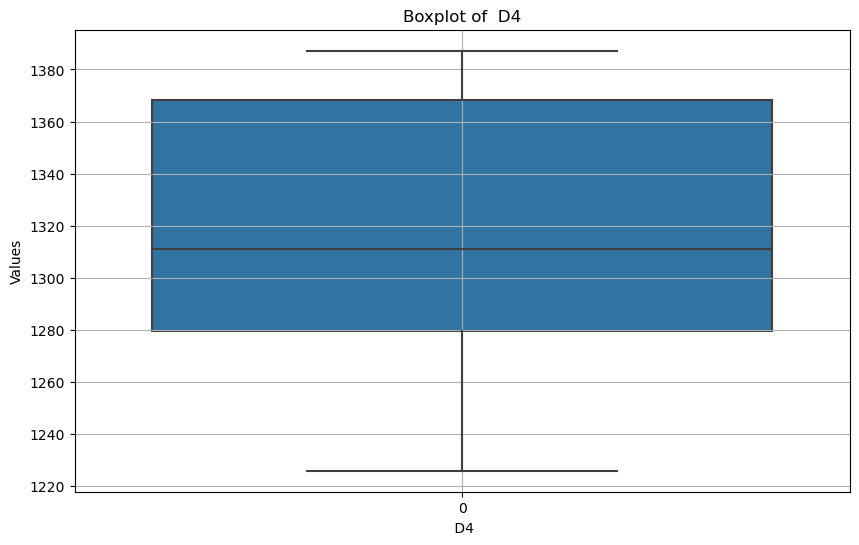

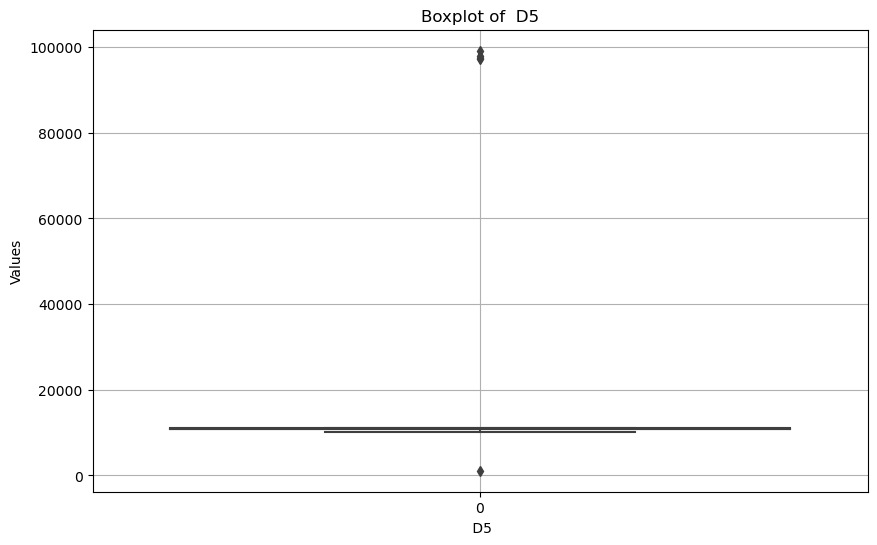

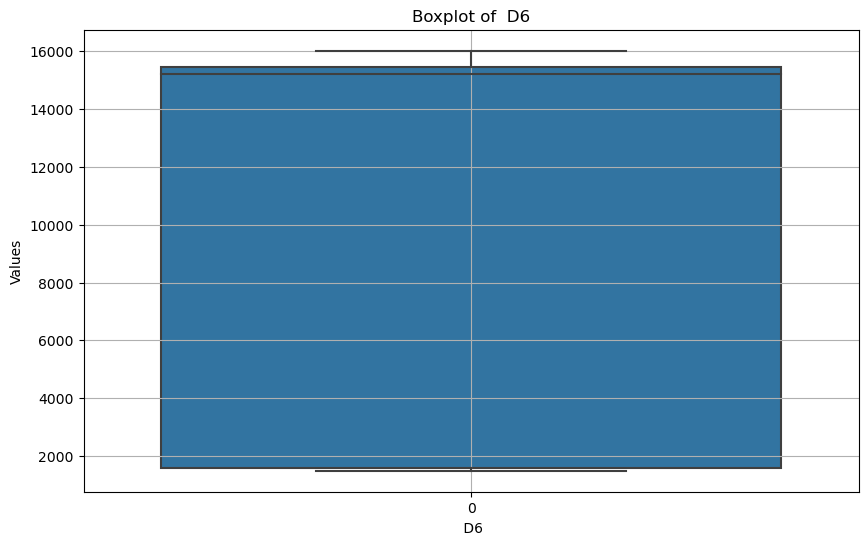

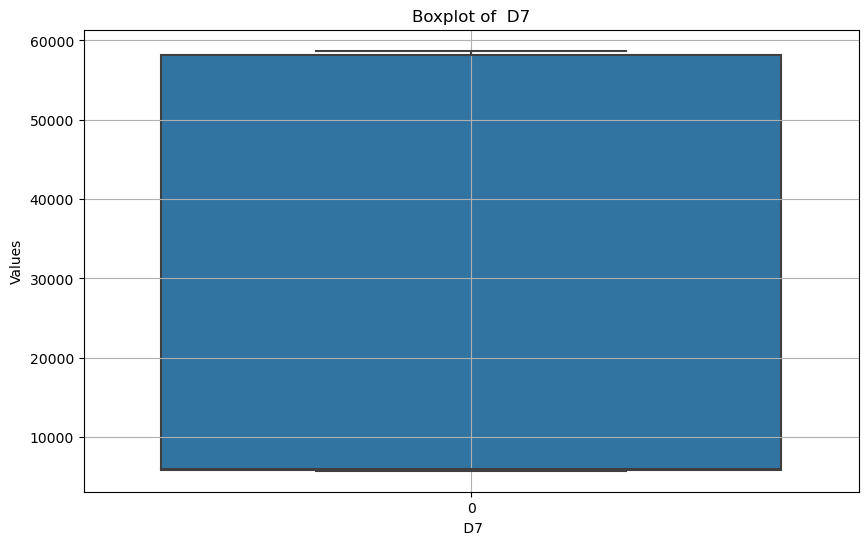

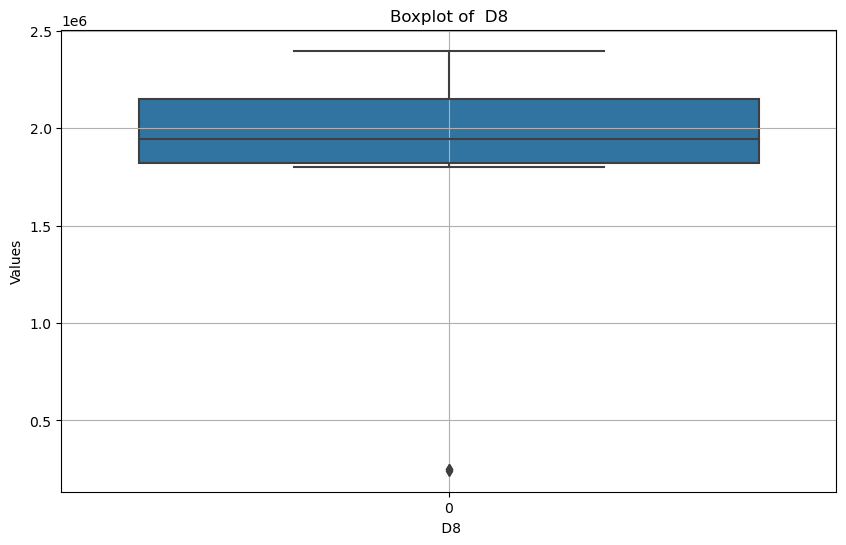

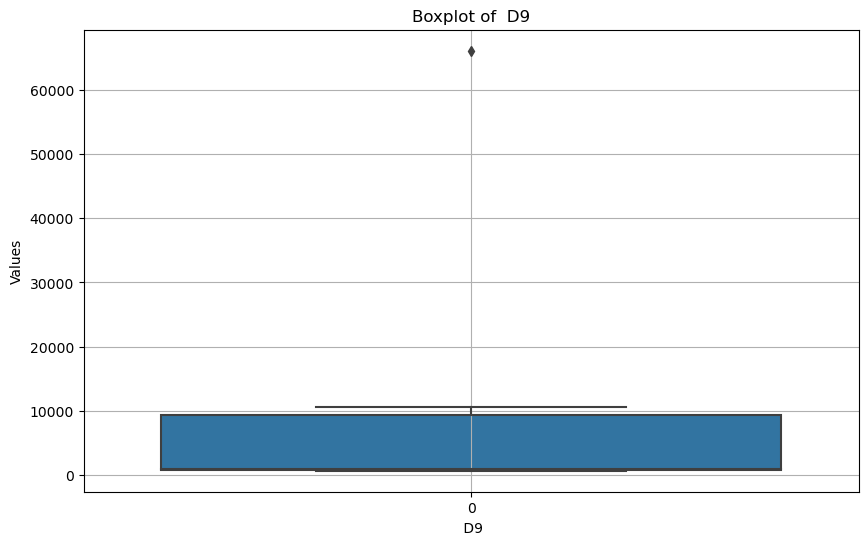

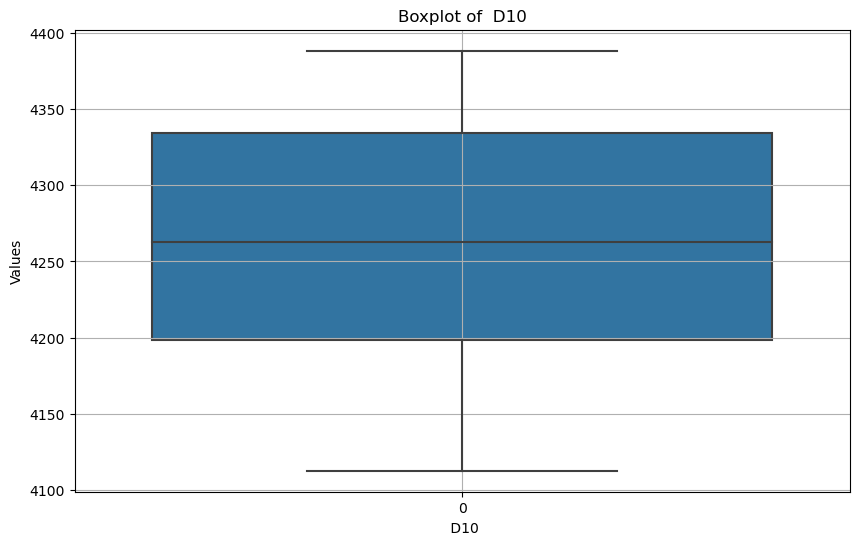

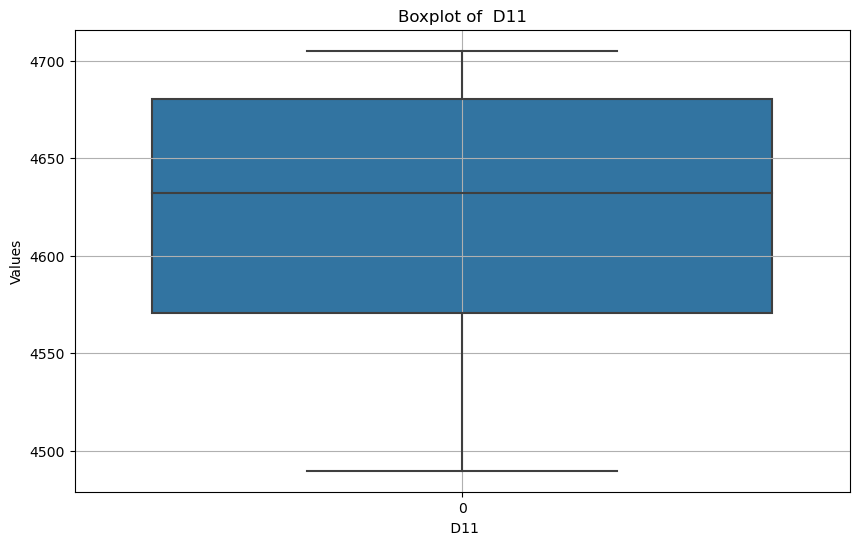

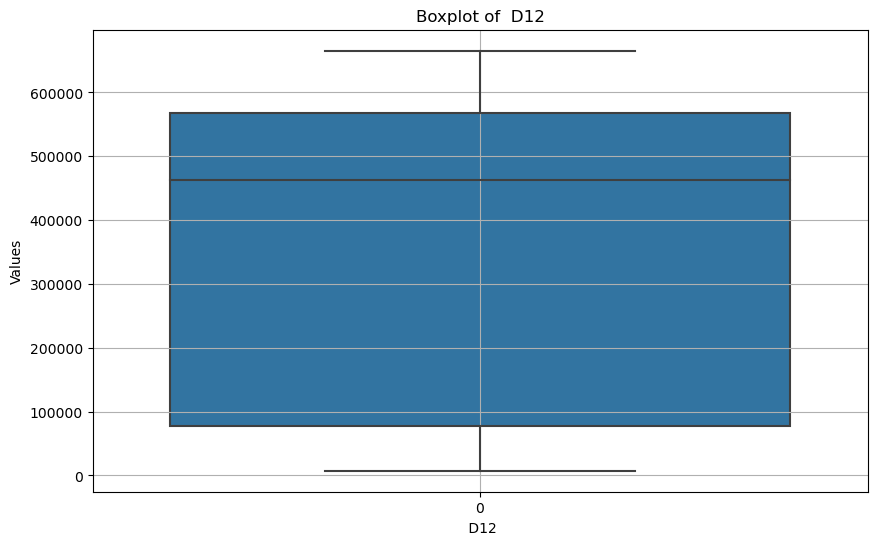

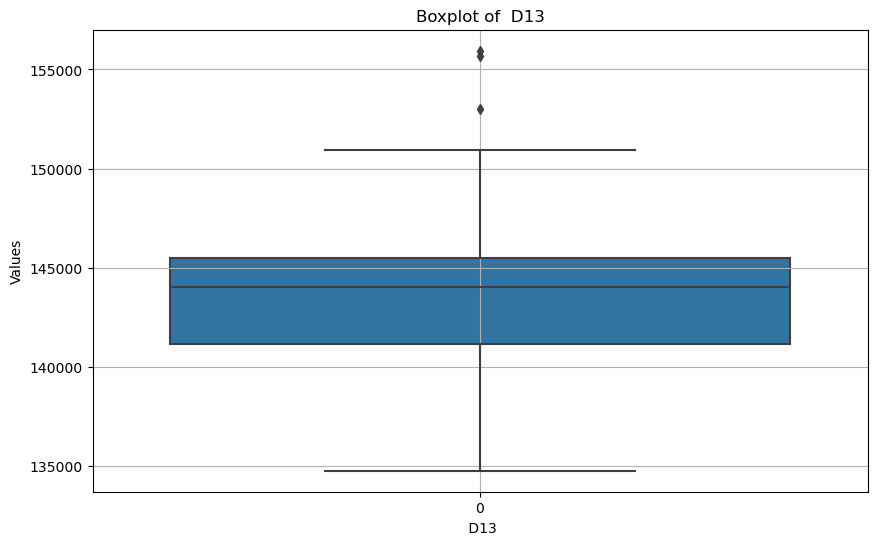

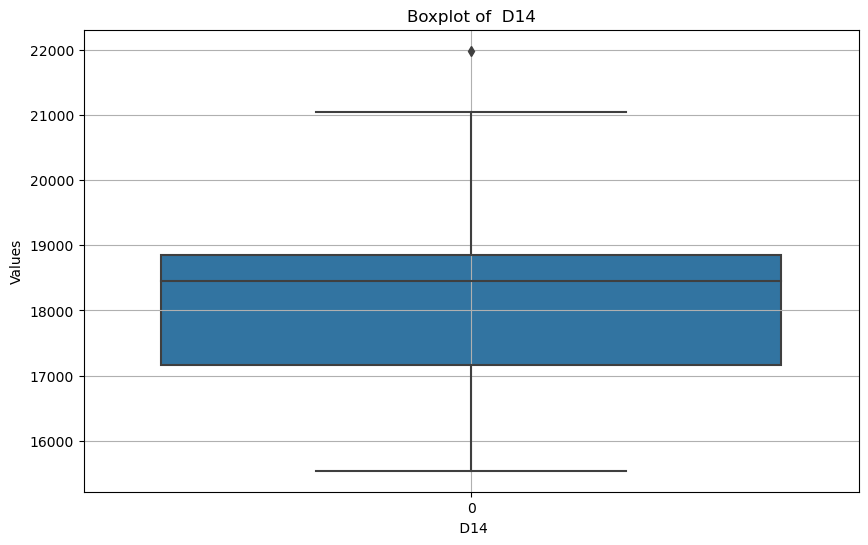

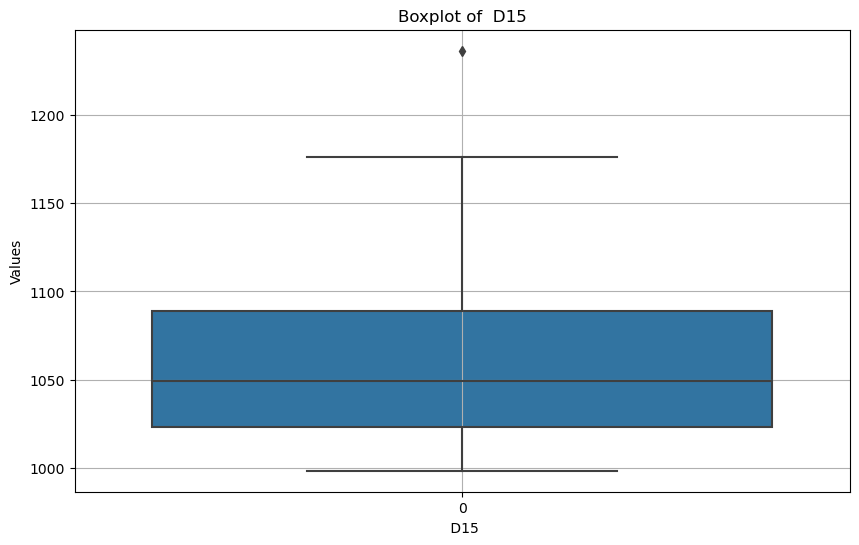

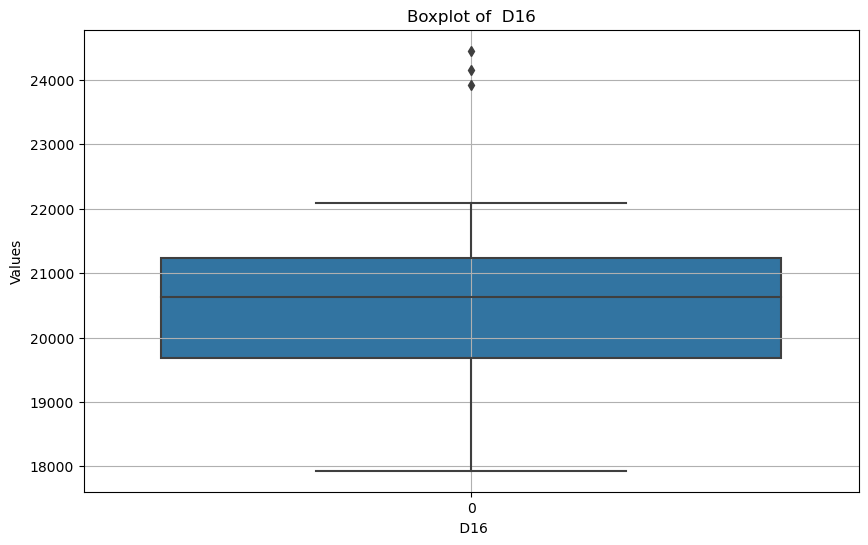

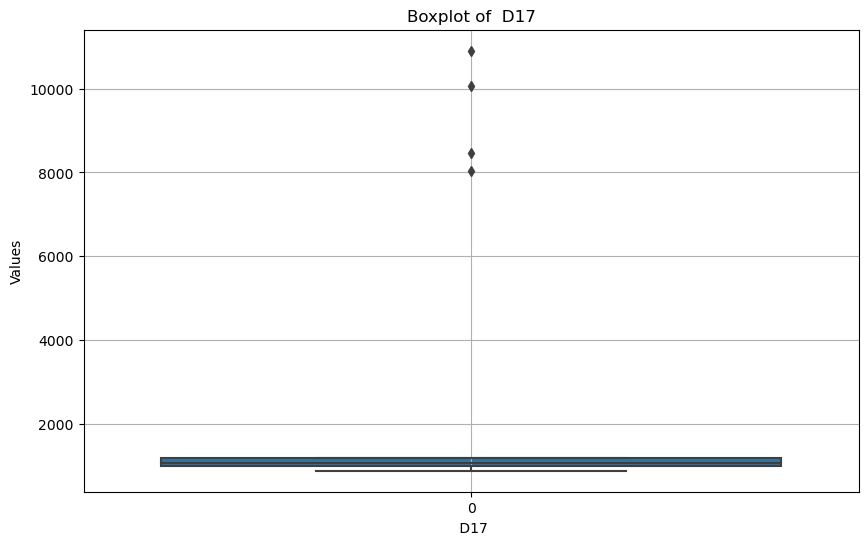

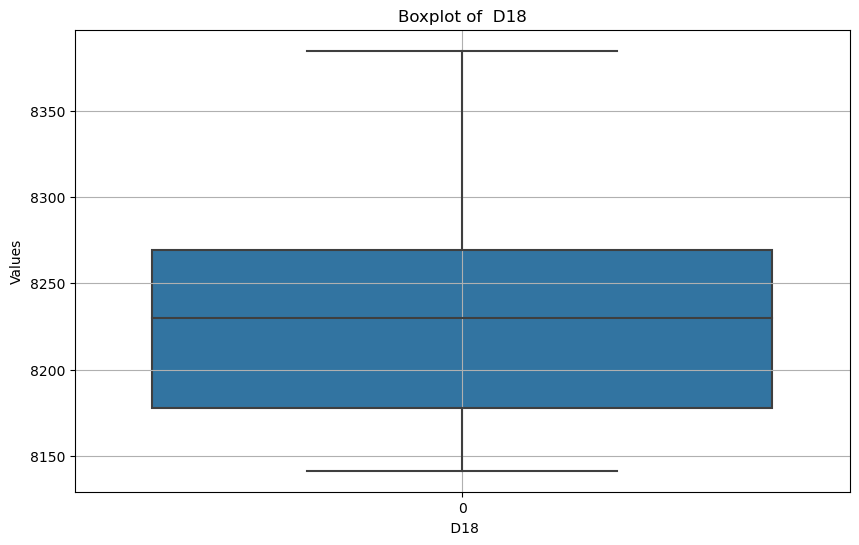

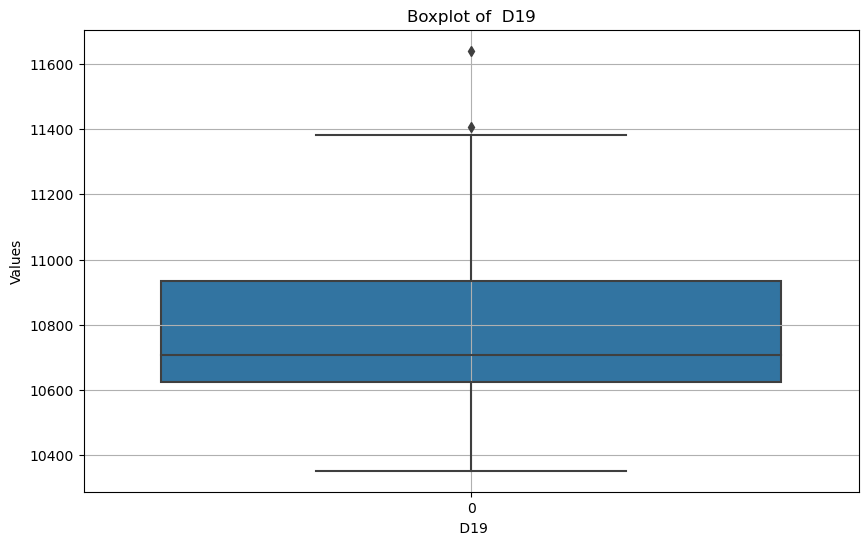

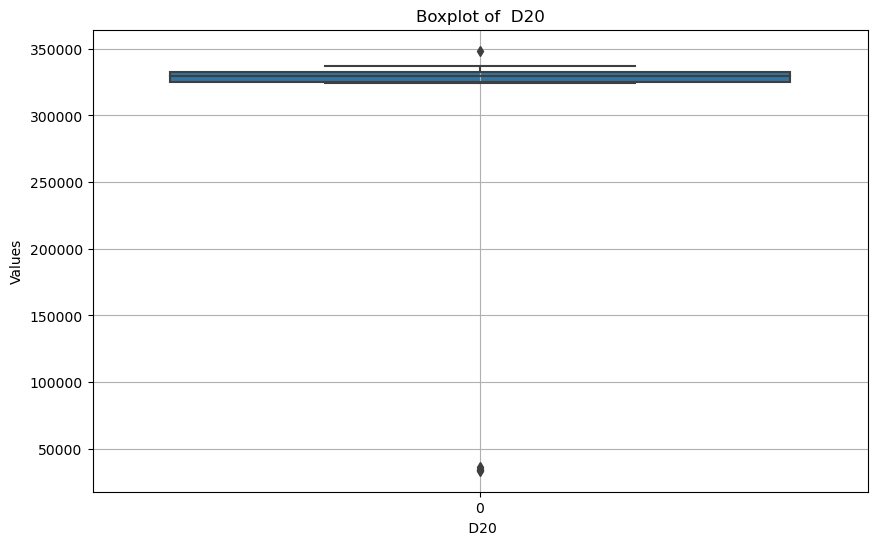

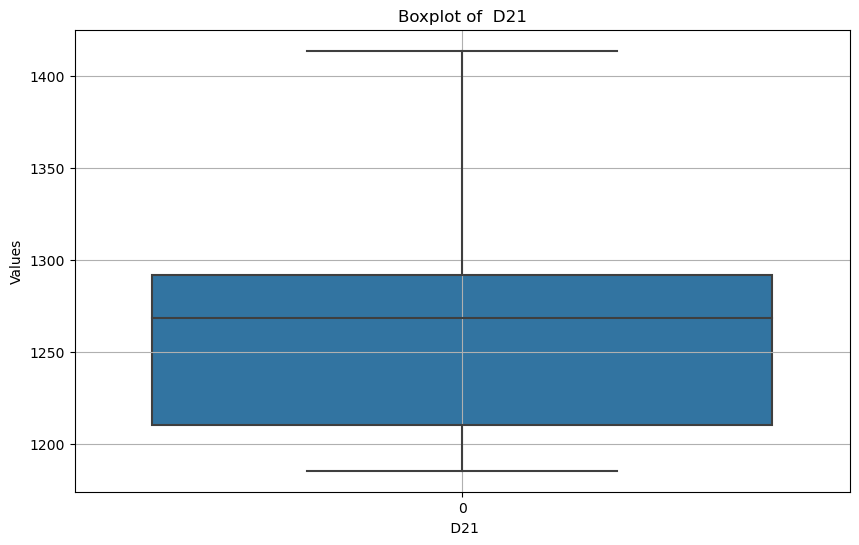

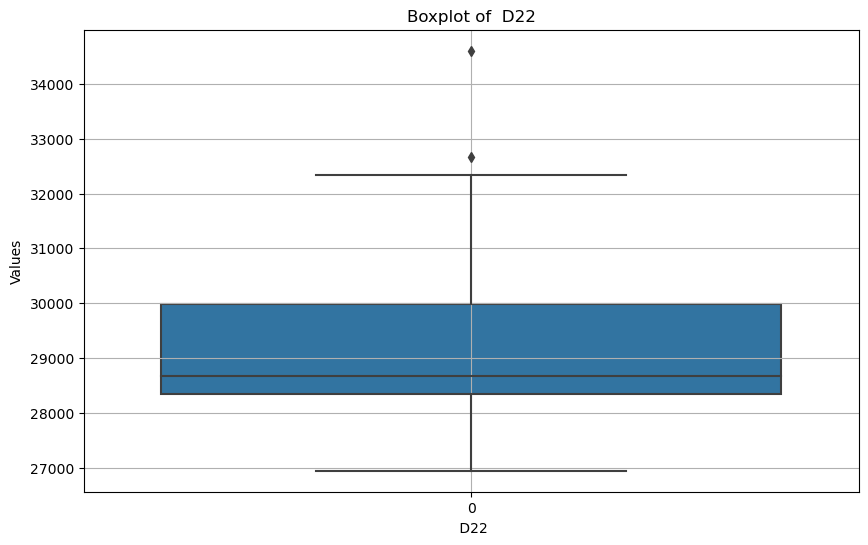

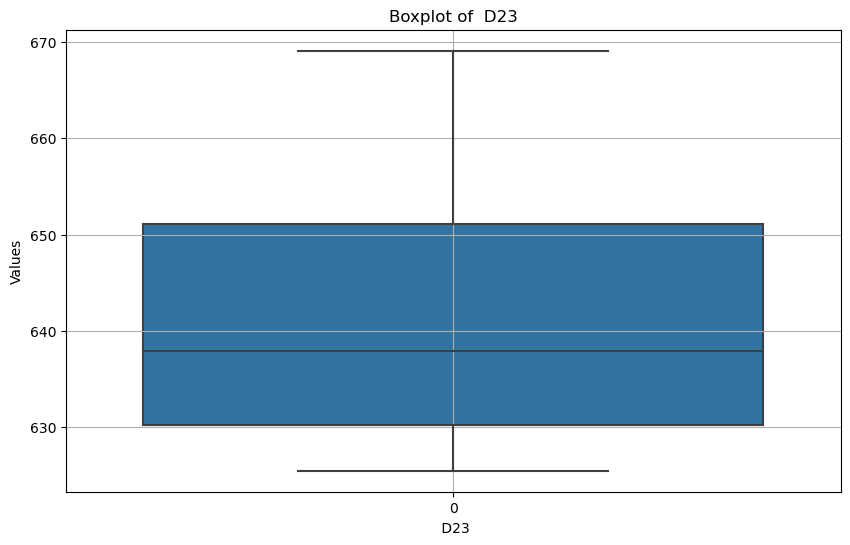

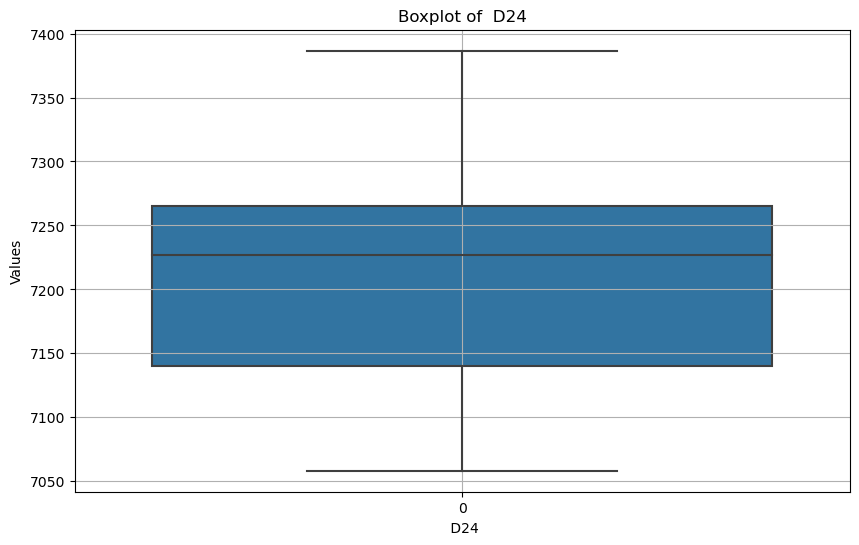

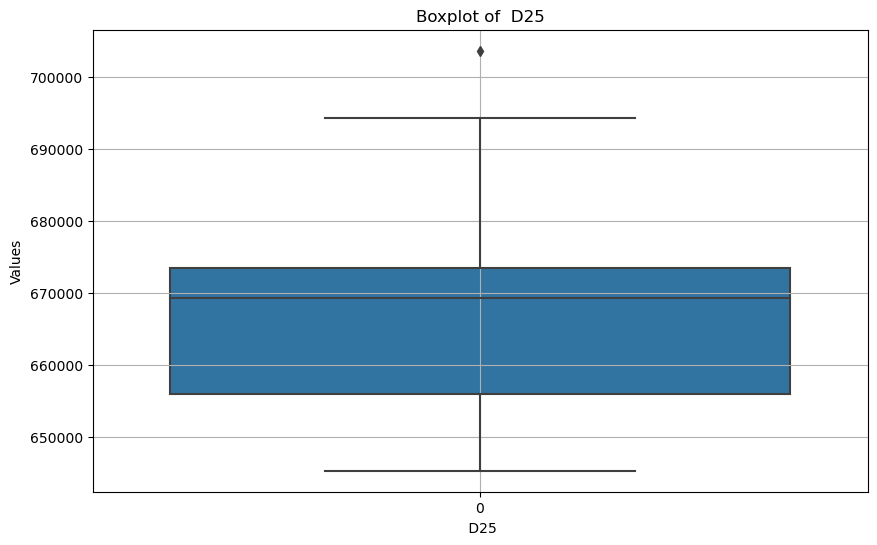

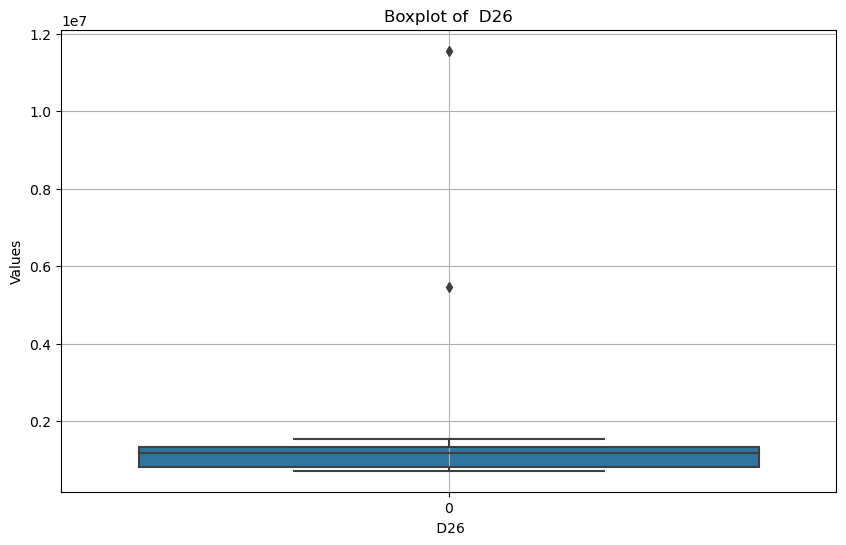

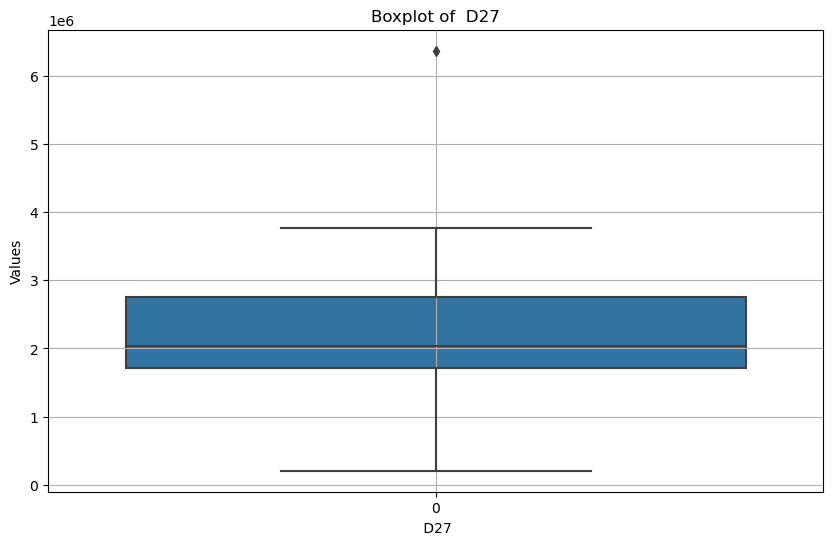

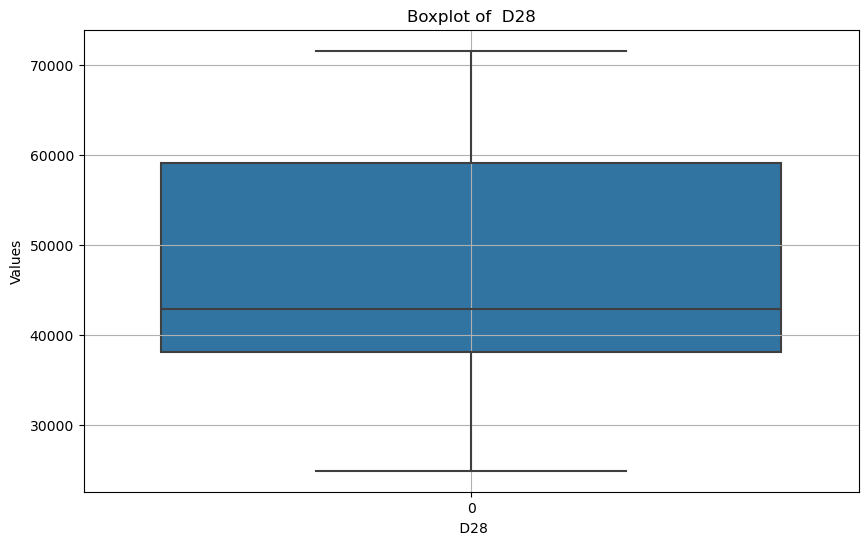

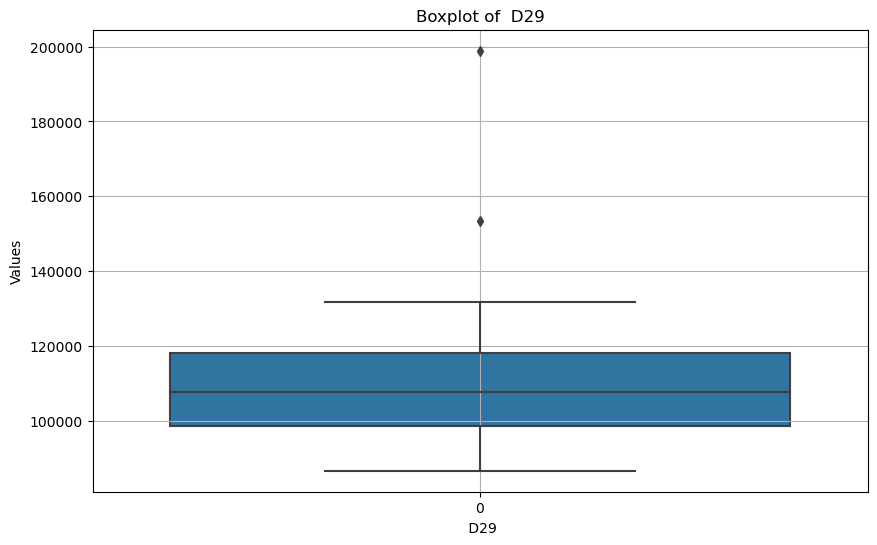

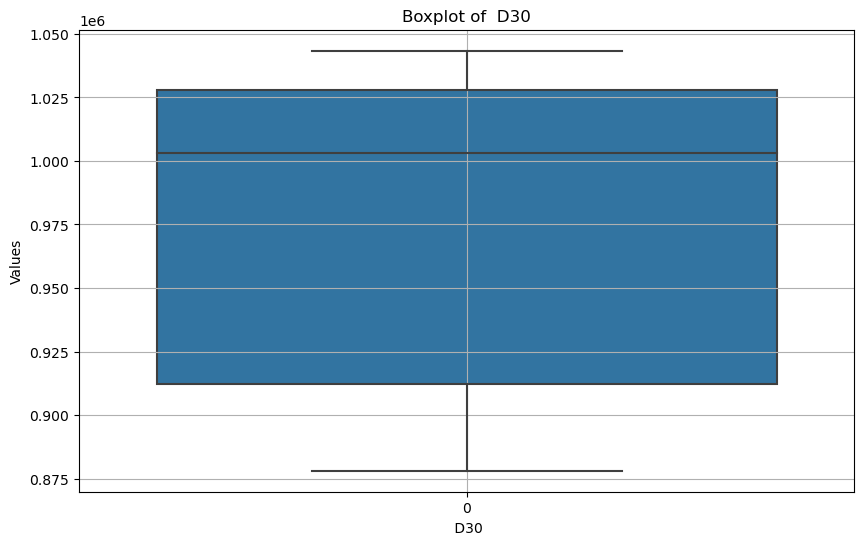

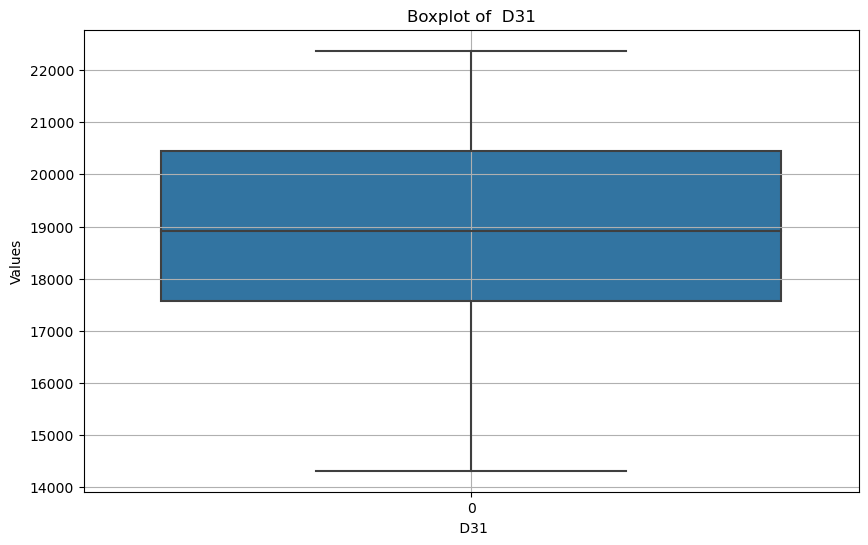

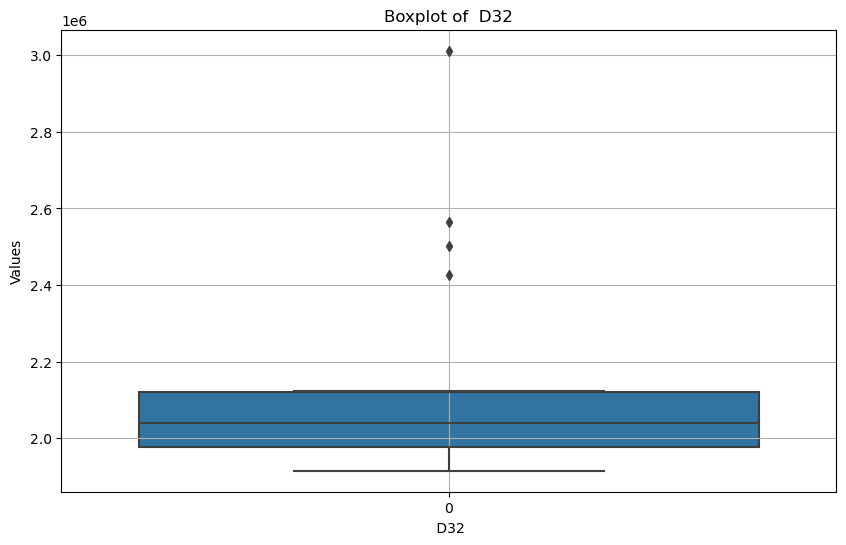

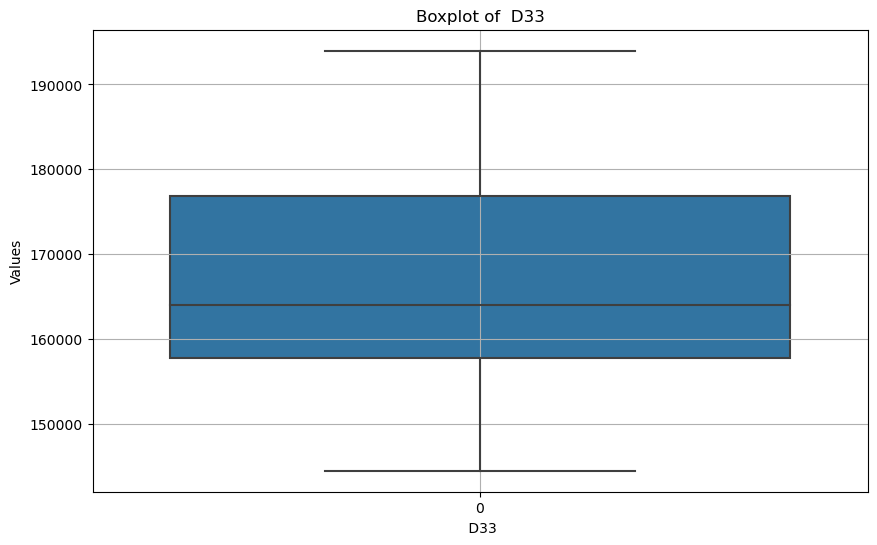

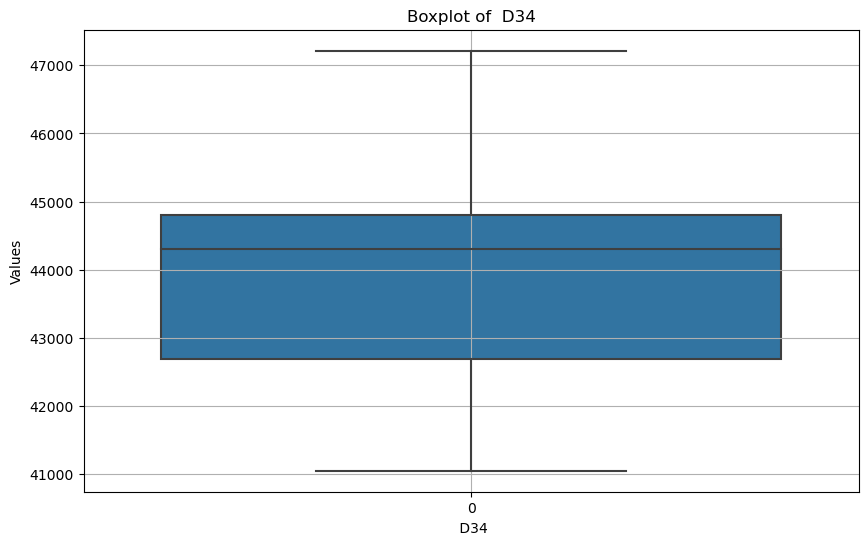

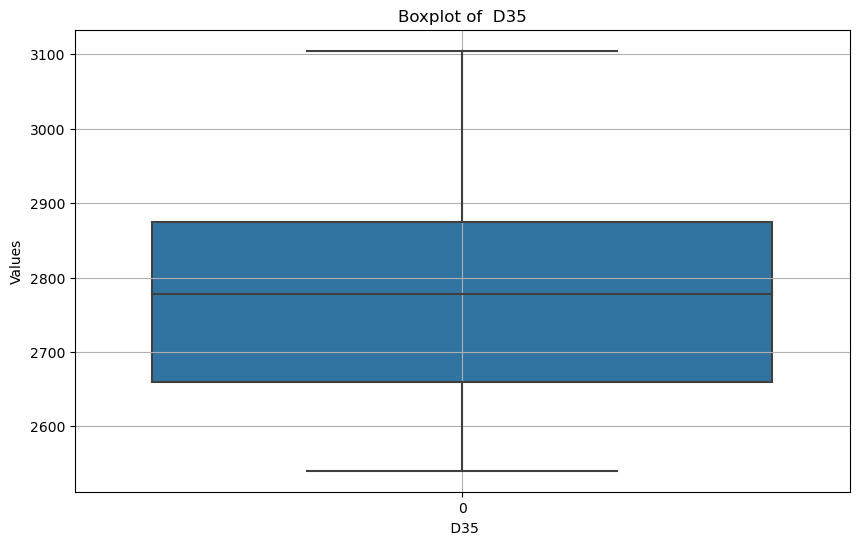

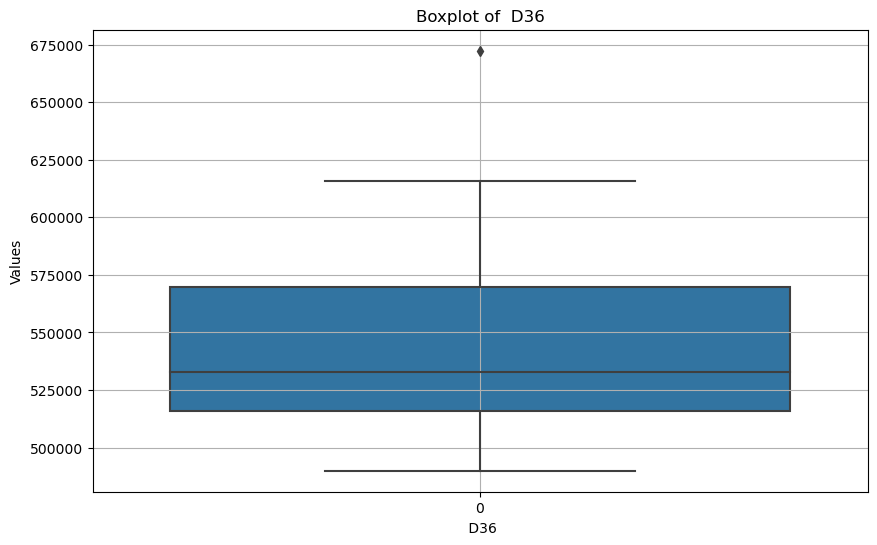

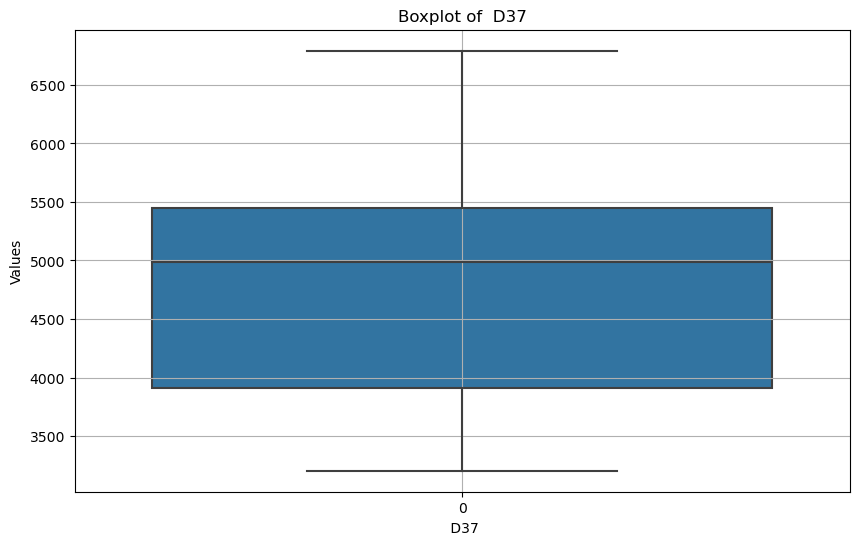

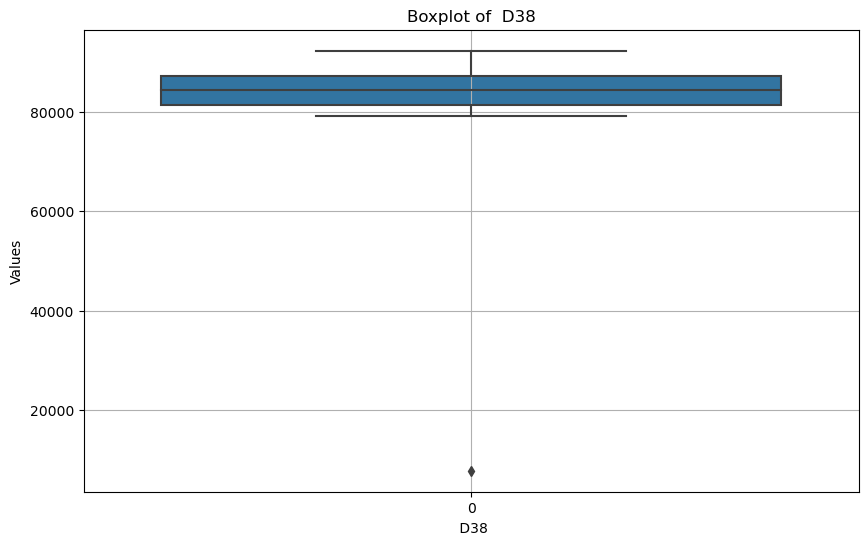

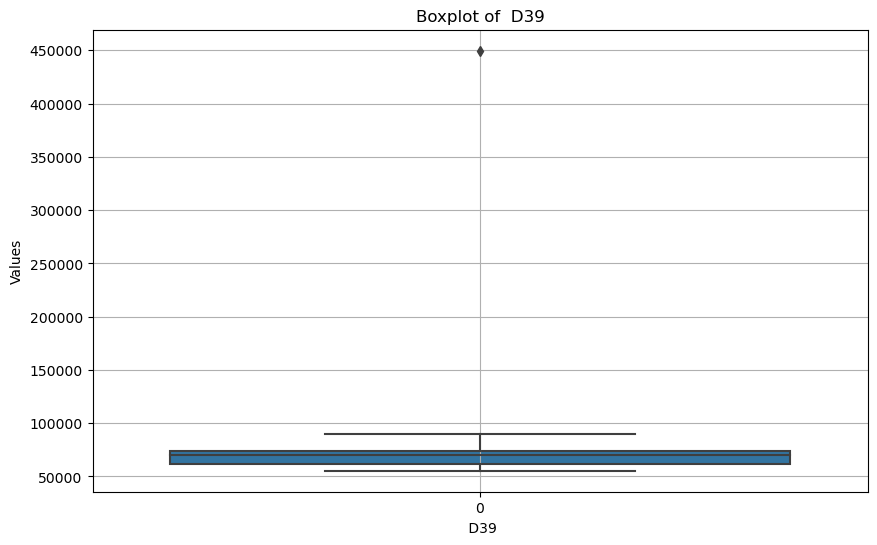

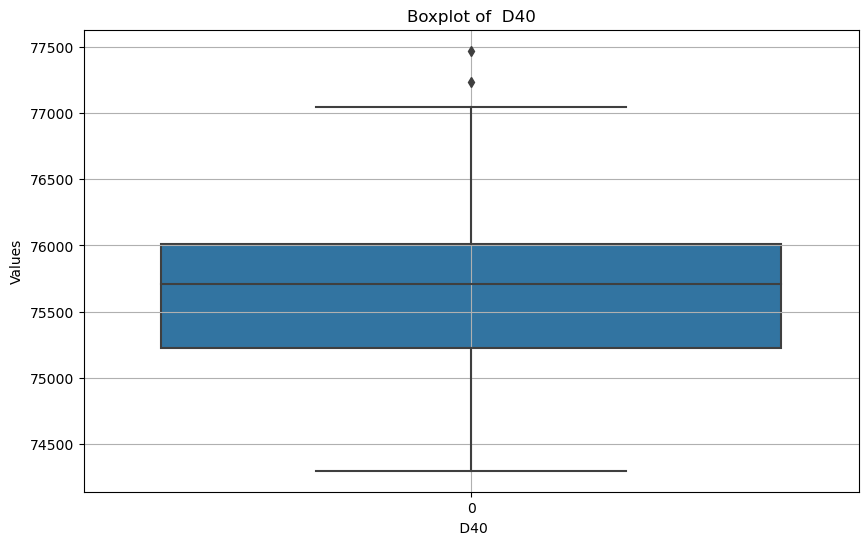

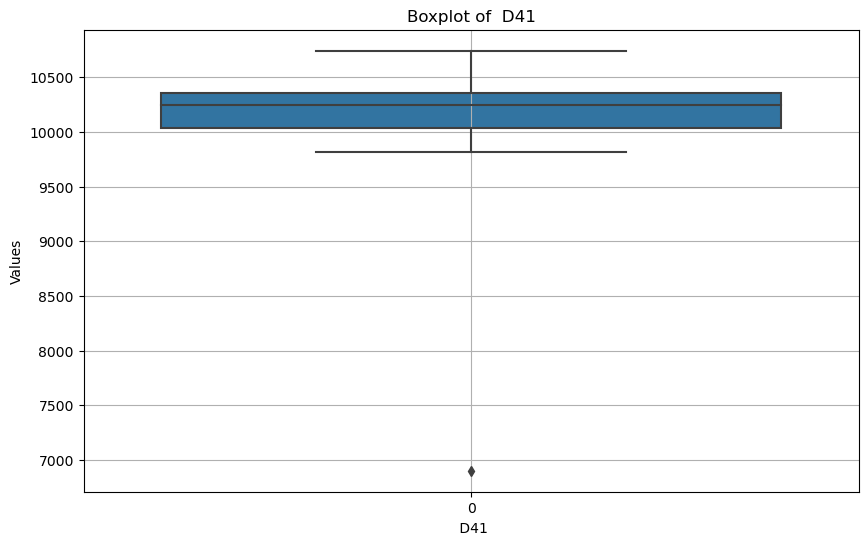

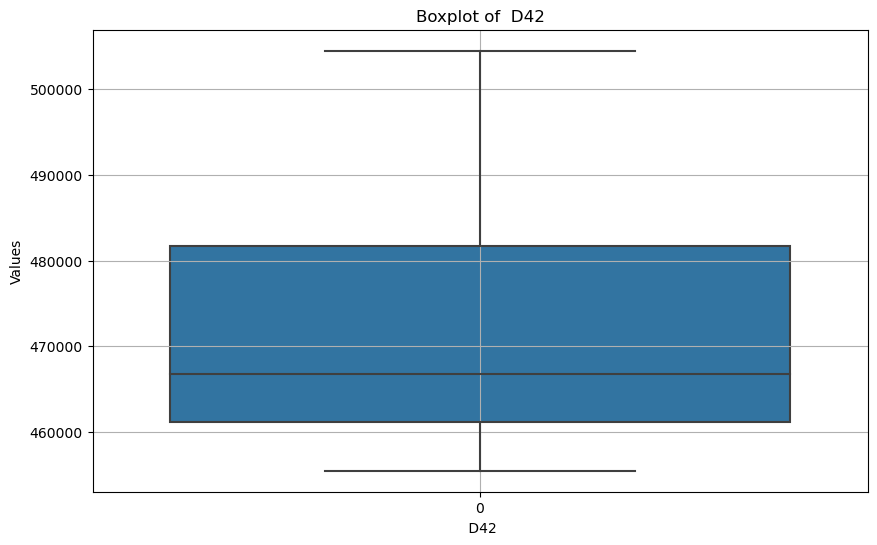

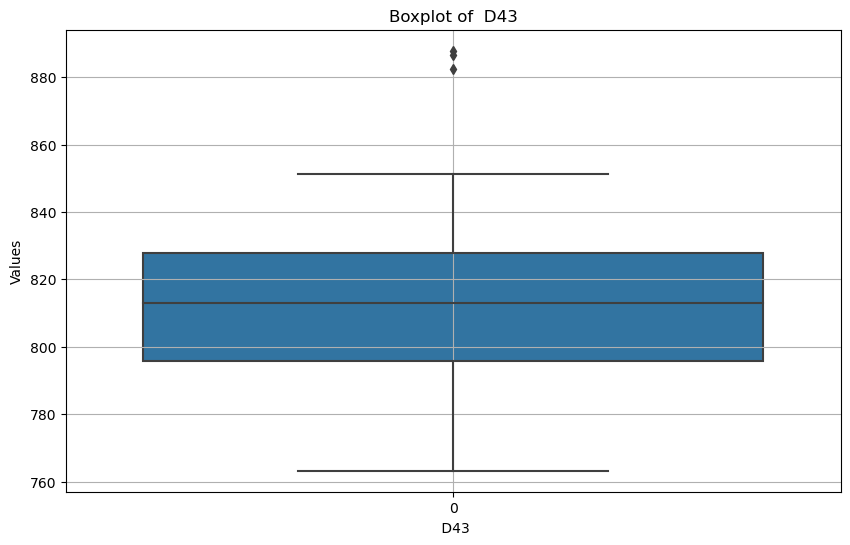

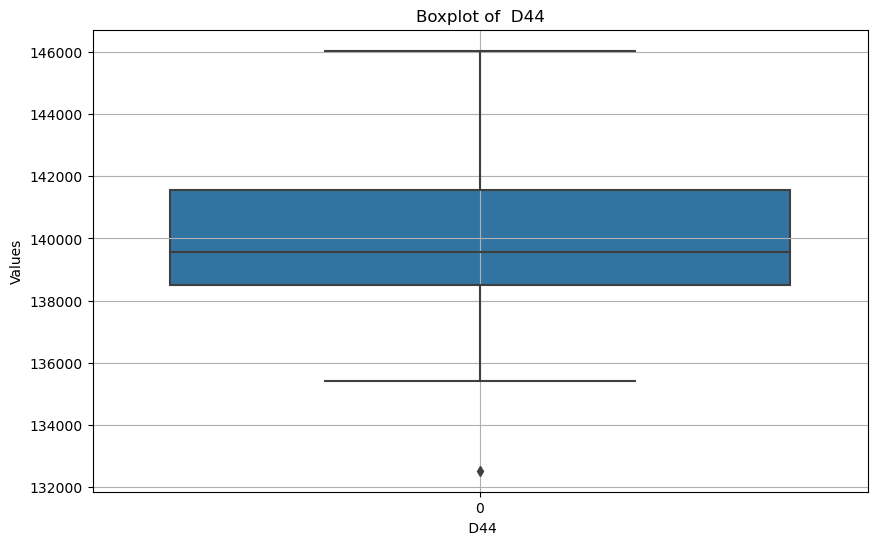

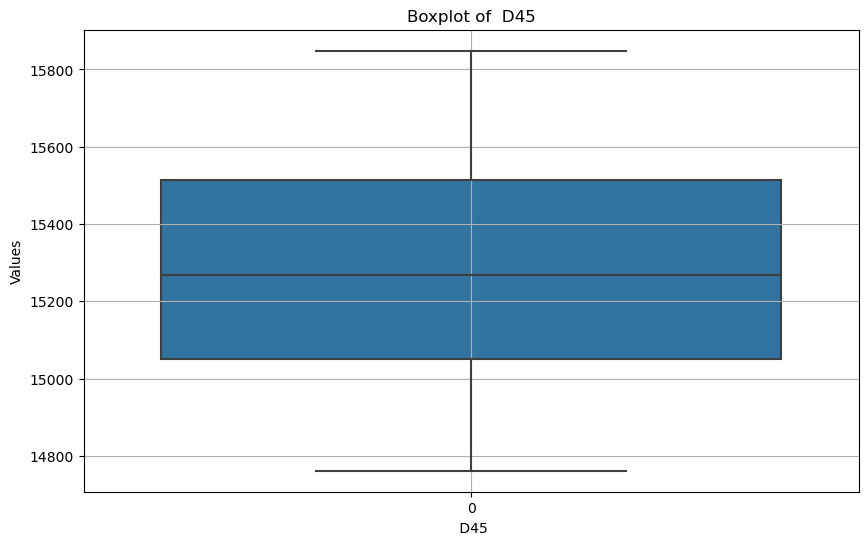

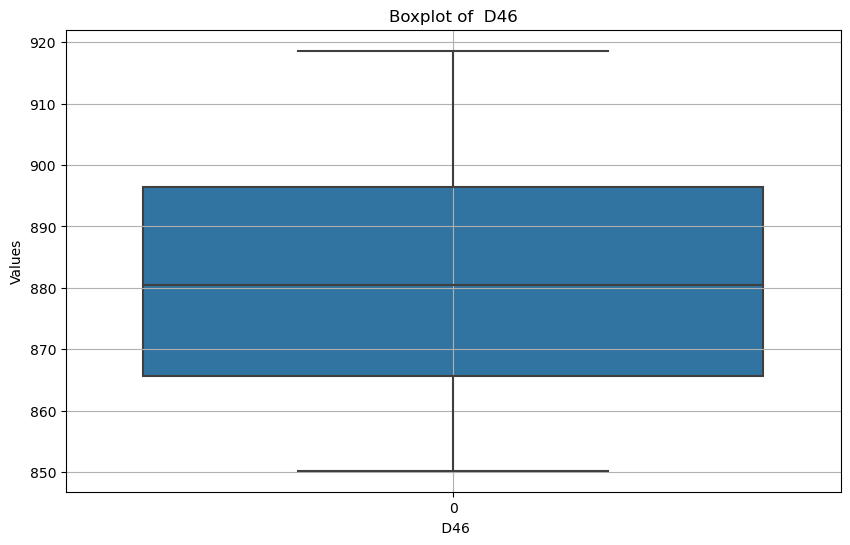

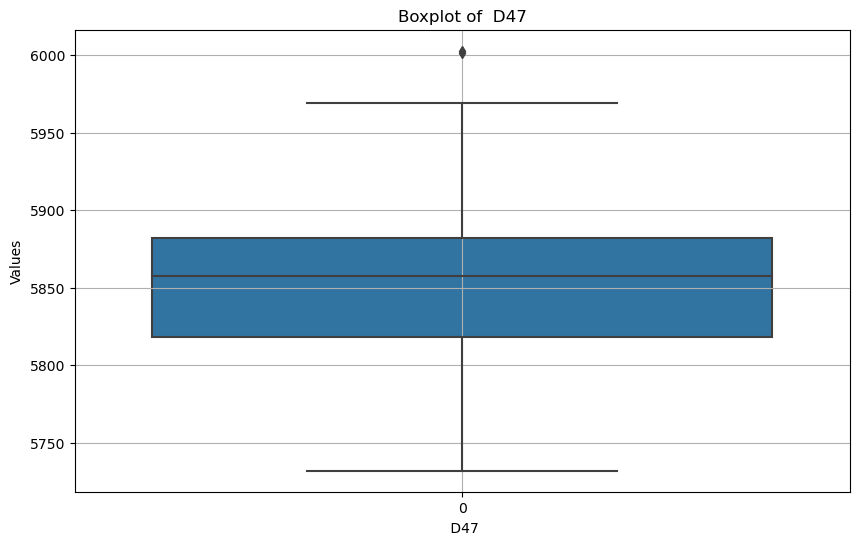

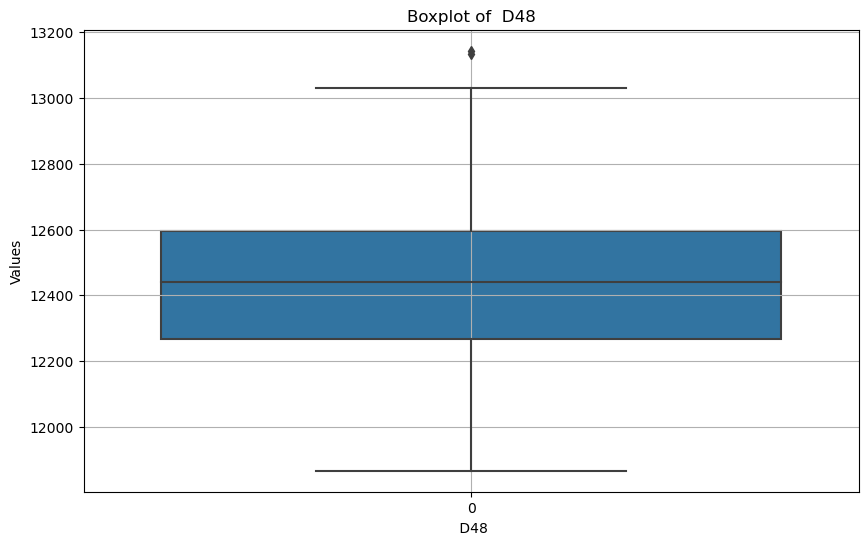

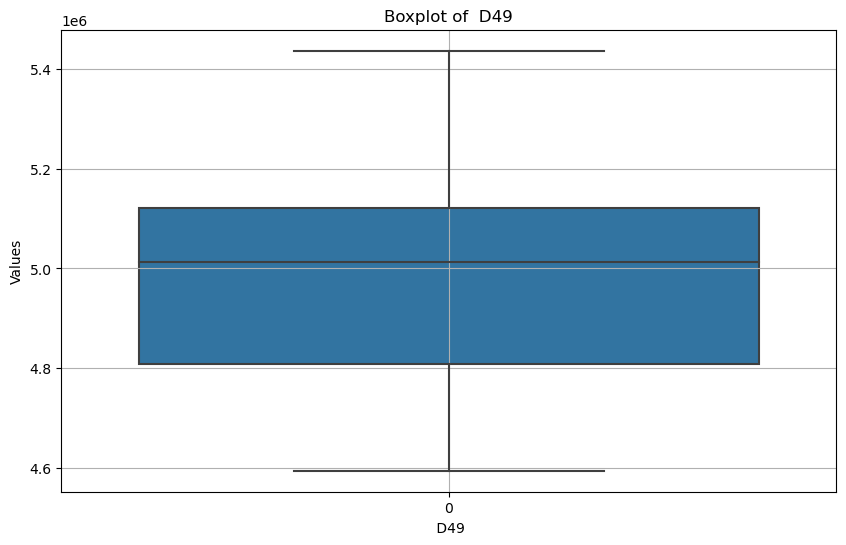

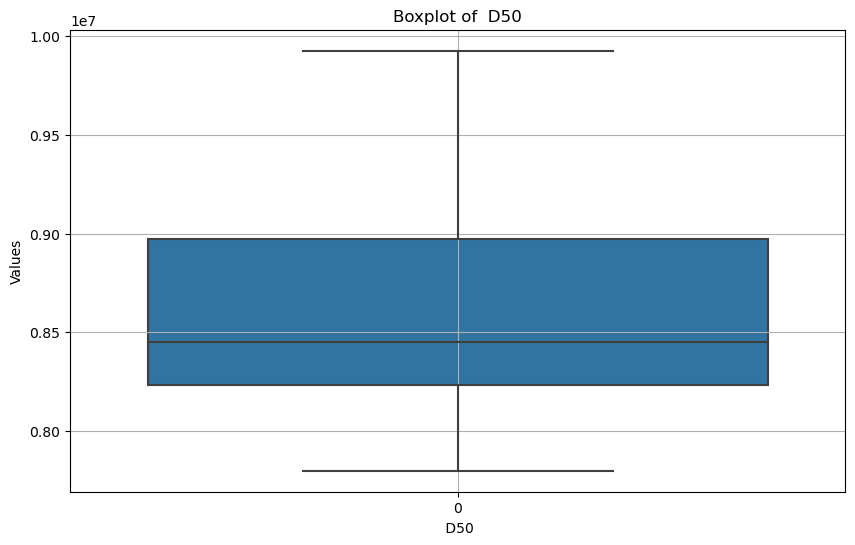

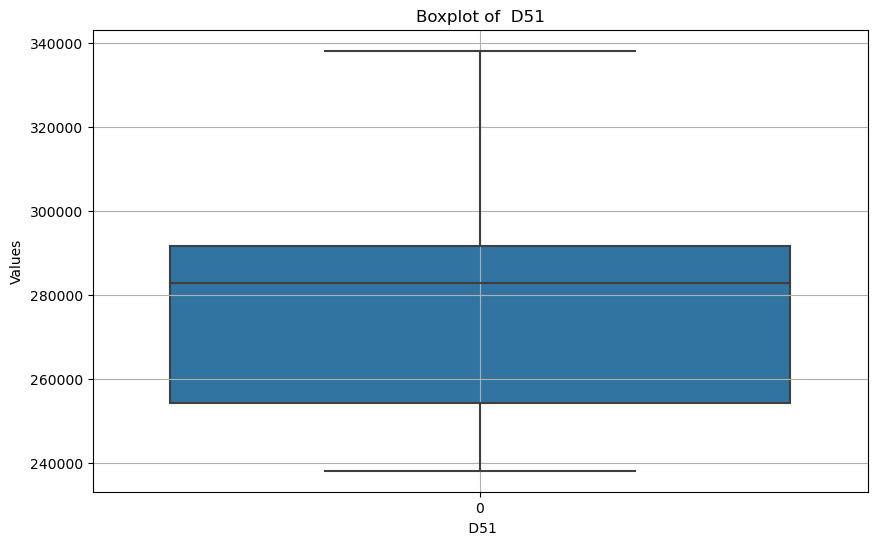

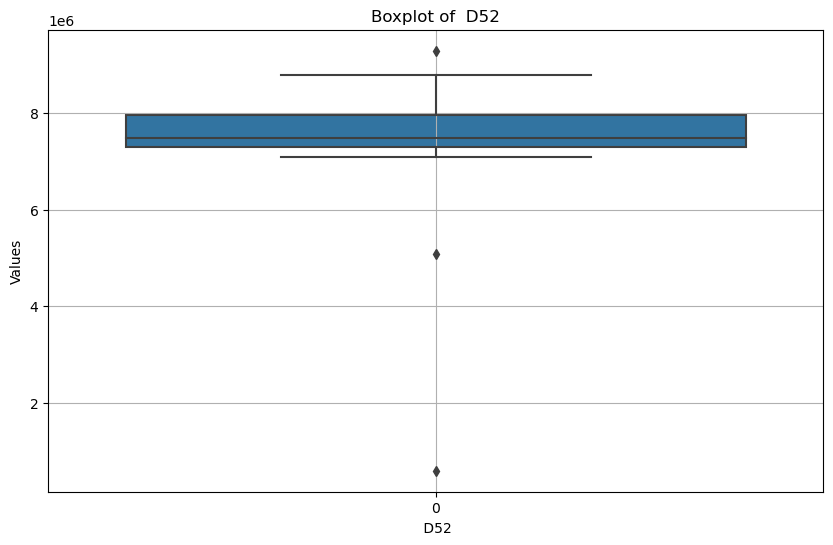

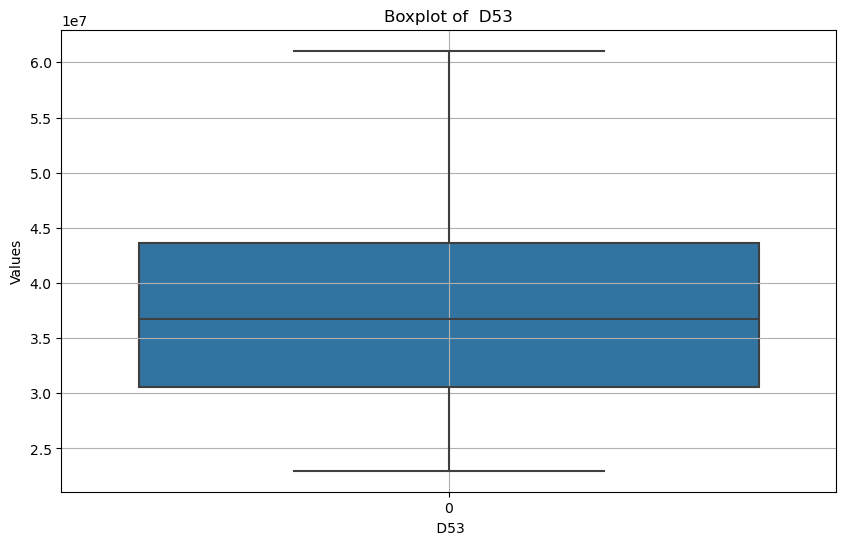

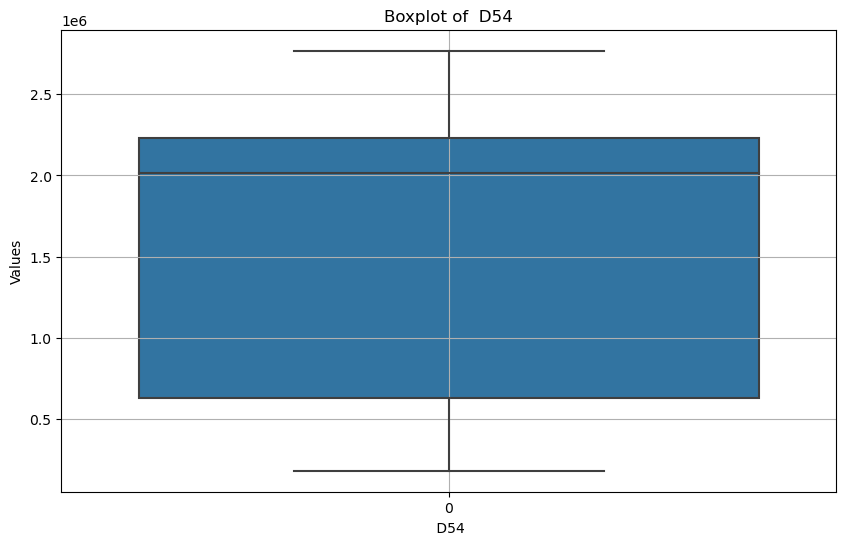

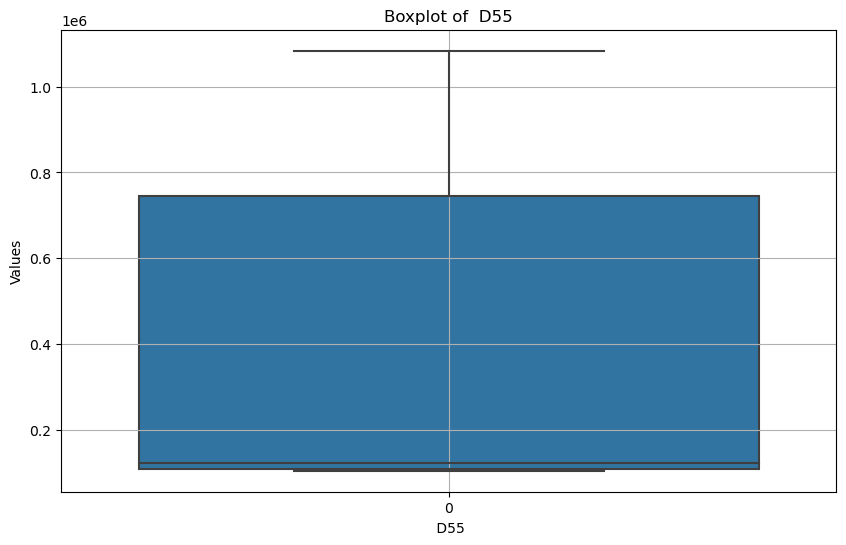

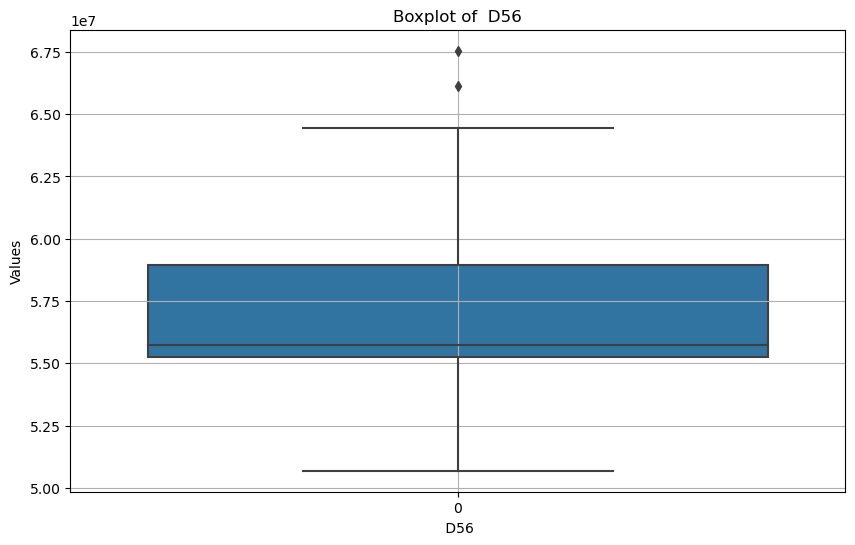

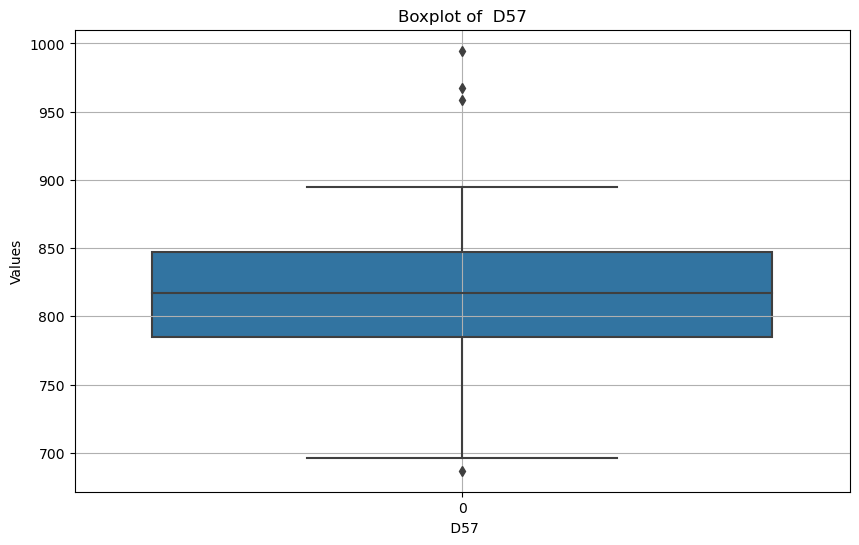

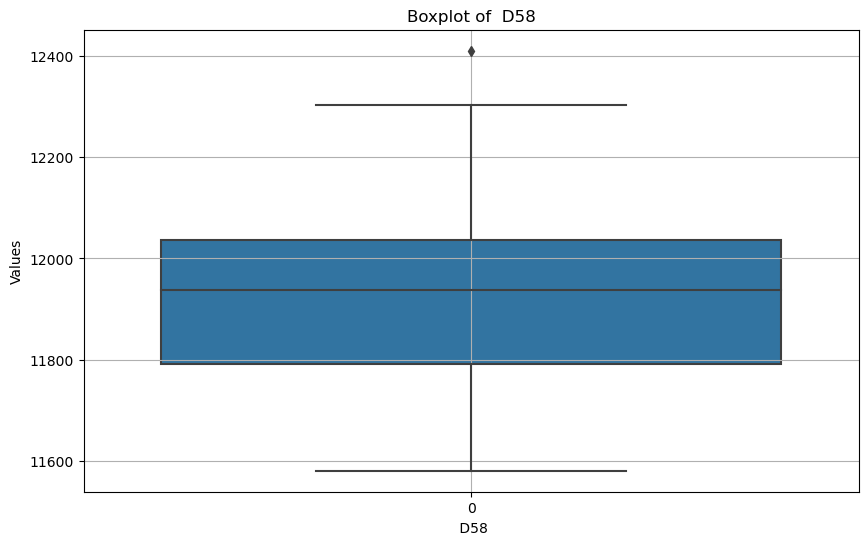

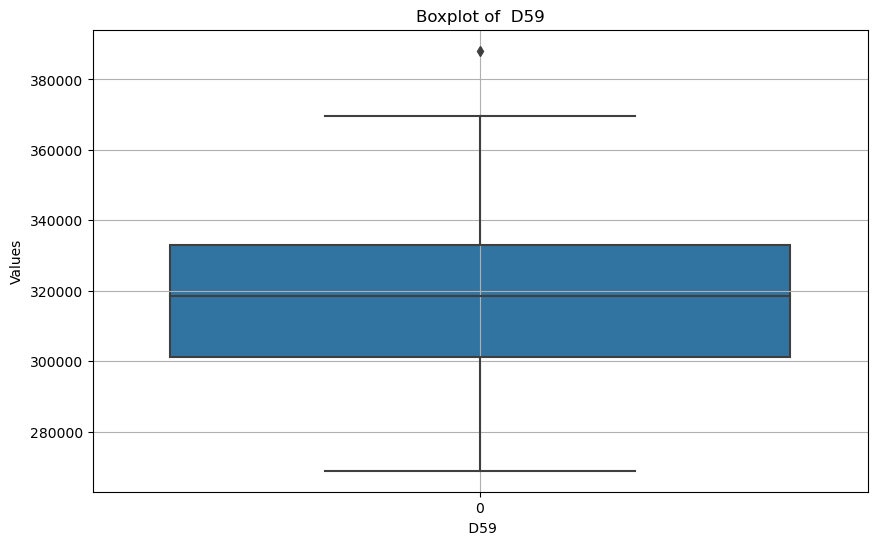

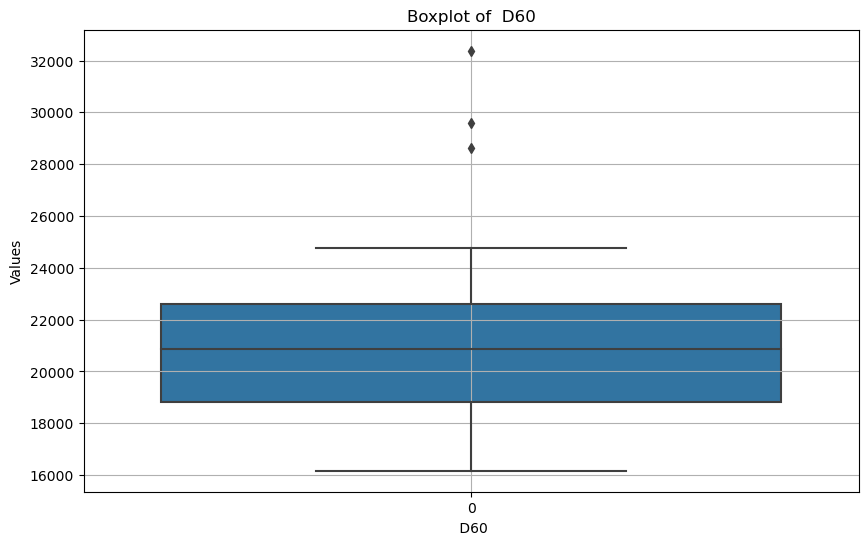

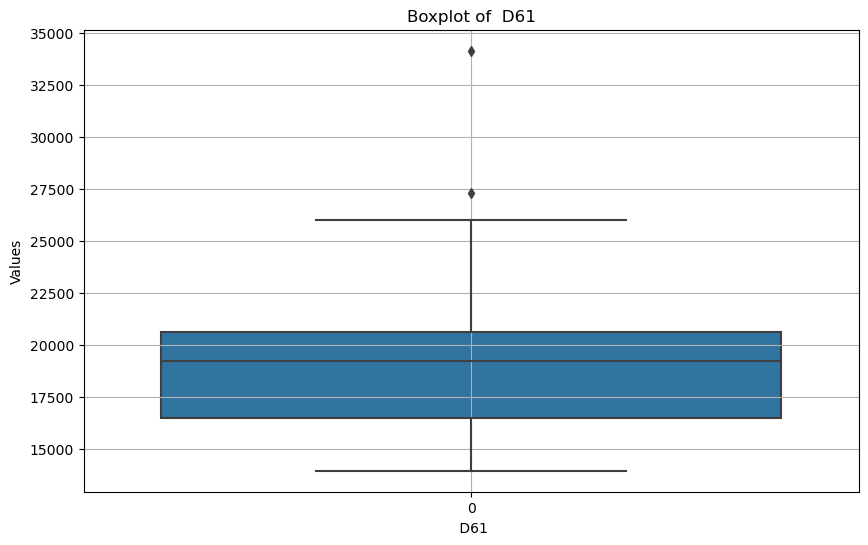

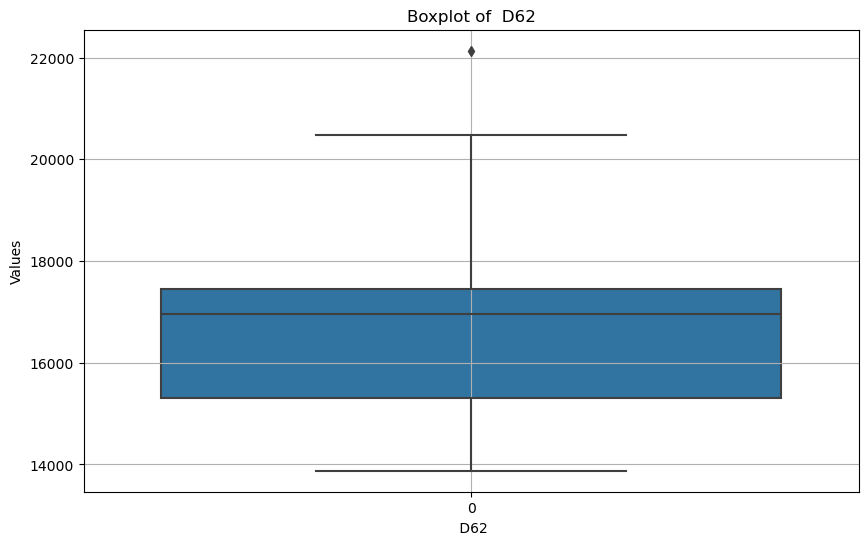

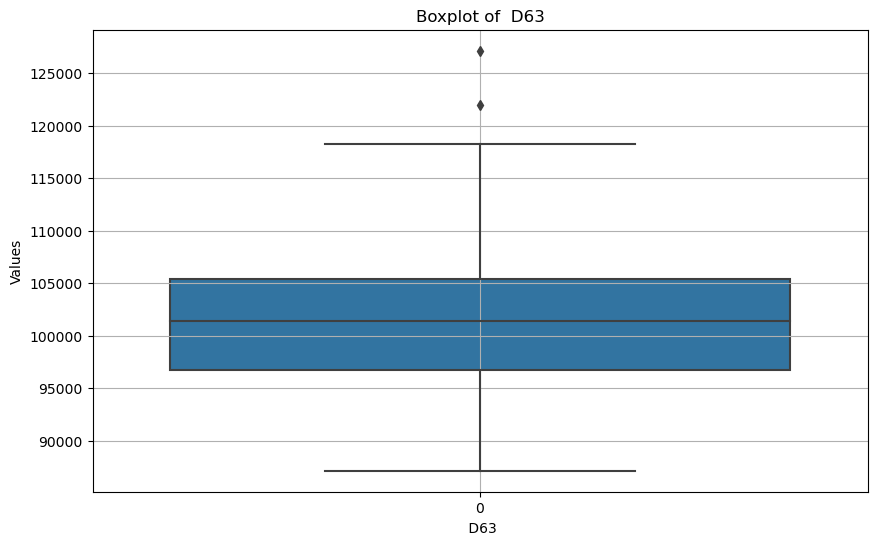

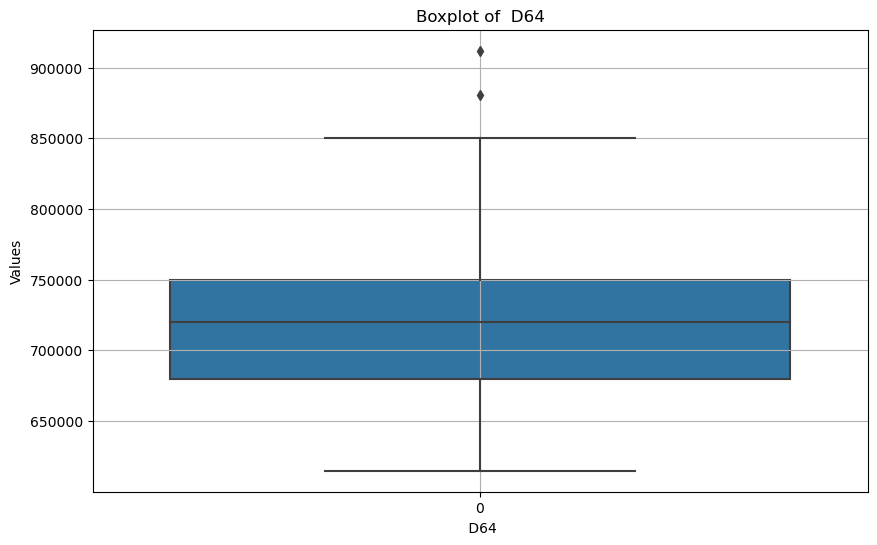

In [42]:
# Sélectionner les colonnes numériques dans le test
numerical_columnss = test.select_dtypes(include='number').columns

# Créer des boxplots pour chaque colonne numérique
for column in numerical_columnss:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=test[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.grid(True)
    plt.show()

In [43]:
# Appliquer l'Isolation Forest sur les données de test
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(test)

# Ajouter les labels d'anomalie au DataFrame
test['Outlier'] = outlier_labels

# Afficher les outliers
outliers = test[test['Outlier'] == -1]
print("Outliers détectés:")
print(outliers)

Outliers détectés:
   ID      Min:Sec            D1           D2          D3           D4  \
5  23  2845.041222   9200.587690  1412.241531  557.536261  1277.923735   
8  32  2963.321448  10440.005015  1525.588106  846.594041  1358.809878   

             D5            D6            D7            D8  ...           D56  \
5  97904.418411   1615.780785  58580.093753  2.489207e+05  ...  5.068566e+07   
8   1107.502945  15240.205215   5891.789041  1.802303e+06  ...  6.446448e+07   

          D57           D58            D59           D60           D61  \
5  686.885384  11606.204779  270418.714920  16168.628094  13968.296882   
8  967.609927  12409.983629  359855.502127  32378.524678  34133.539232   

            D62            D63            D64  Outlier  
5  13876.947731   87141.772957  614868.525600       -1  
8  22135.281700  127153.481158  911950.715358       -1  

[2 rows x 67 columns]


C:\Users\ROYAL COMPUTER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Dans l'ensemble de test,on remarque que sur 18 ligne,2 ligne comportent des valeurs aberrrantes.Vu la sensibilité des données,nous alons maintenir les valeurs aberrantes et entrainer un premier modele histoire de voir si les résultats obtenues sont concluants ou pas

In [44]:
# suppression de la derniere colonne de l'ensemble de train
train = train.iloc[:, :-1]

In [45]:
# Analyse des valeurs manquantes 
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 67 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       45 non-null     int64  
 1   Min:Sec  45 non-null     float64
 2    D1      45 non-null     float64
 3    D2      45 non-null     float64
 4    D3      45 non-null     float64
 5    D4      45 non-null     float64
 6    D5      45 non-null     float64
 7    D6      45 non-null     float64
 8    D7      45 non-null     float64
 9    D8      45 non-null     float64
 10   D9      45 non-null     float64
 11   D10     45 non-null     float64
 12   D11     45 non-null     float64
 13   D12     45 non-null     float64
 14   D13     45 non-null     float64
 15   D14     45 non-null     float64
 16   D15     45 non-null     float64
 17   D16     45 non-null     float64
 18   D17     45 non-null     float64
 19   D18     45 non-null     float64
 20   D19     45 non-null     float64
 21   D20     45 non-nu

In [46]:
# Vérification du taux de valeur manquante
missing_rate = train.isna().sum() /train.shape[0]

In [47]:
missing_rate

ID         0.0
Min:Sec    0.0
 D1        0.0
 D2        0.0
 D3        0.0
          ... 
 D61       0.0
 D62       0.0
 D63       0.0
 D64       0.0
Result     0.0
Length: 67, dtype: float64

On remarque qu'il n'y a pas de valeur manquante dans l'ensemble de train

In [48]:
# suppression de la derniere colonne de l'ensemble de test
test = test.iloc[:, :-1]

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 66 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       18 non-null     int64  
 1   Min:Sec  18 non-null     float64
 2    D1      18 non-null     float64
 3    D2      18 non-null     float64
 4    D3      18 non-null     float64
 5    D4      18 non-null     float64
 6    D5      18 non-null     float64
 7    D6      18 non-null     float64
 8    D7      18 non-null     float64
 9    D8      18 non-null     float64
 10   D9      18 non-null     float64
 11   D10     18 non-null     float64
 12   D11     18 non-null     float64
 13   D12     18 non-null     float64
 14   D13     18 non-null     float64
 15   D14     18 non-null     float64
 16   D15     18 non-null     float64
 17   D16     18 non-null     float64
 18   D17     18 non-null     float64
 19   D18     18 non-null     float64
 20   D19     18 non-null     float64
 21   D20     18 non-nu

In [50]:
missing_rate_1 = test.isna().sum() /test.shape[0]

In [51]:
missing_rate_1

ID         0.0
Min:Sec    0.0
 D1        0.0
 D2        0.0
 D3        0.0
          ... 
 D60       0.0
 D61       0.0
 D62       0.0
 D63       0.0
 D64       0.0
Length: 66, dtype: float64

On remarque également l'absence de valeur manquante dans l'ensemble de test

# Preprocessing

In [52]:
def preprocessing(df, is_training=True):
    if is_training:
        X = df.drop(['Result'], axis=1)
        y = df['Result']
        print(y.value_counts())
        return X, y
    else:
        return df

In [53]:
X_train,y_train = preprocessing(train,is_training=True)

0.0    26
1.0    19
Name: Result, dtype: int64


In [54]:
X_train

,ID,Min:Sec,D1,D2,D3,D4,D5,D6,D7,D8,...,D55,D56,D57,D58,D59,D60,D61,D62,D63,D64
0,1,1594.728191,9852.906580,1468.375539,582.672155,1371.588204,10650.013009,15248.402998,5857.124567,1.998550e+06,...,1.166940e+05,5.696775e+07,869.491594,11870.798291,337124.056737,21095.004370,17771.522754,16283.419688,103240.938514,7.311266e+05
1,4,1529.125597,9747.500130,1472.605562,672.184724,1349.943406,10919.942253,16147.079783,6034.742190,2.468038e+06,...,1.091677e+05,4.951802e+07,763.012140,11735.663468,300189.471067,19946.220033,15393.606040,15354.961019,96862.633275,6.900469e+05
2,5,2643.991537,9657.847878,1456.304011,616.905806,1347.060368,10283.542061,15645.888042,5912.833003,2.279299e+06,...,1.058357e+06,5.490604e+07,801.671889,11771.554749,317147.371760,19800.055257,16408.465813,15428.472470,96191.763883,6.845740e+05
3,6,2914.735288,9746.265038,1454.685603,583.214905,1297.862351,10420.796020,1529.550142,58311.583626,2.050356e+06,...,1.147254e+05,6.050710e+07,860.479721,11912.457378,326413.445595,21182.380893,18484.597341,16271.772480,102802.020732,7.287735e+05
4,7,1055.381112,9647.499858,1444.987656,624.343377,1300.162420,10400.684288,15592.027179,5864.787107,2.206138e+06,...,1.137731e+05,5.598778e+07,809.660817,11866.593970,306636.444919,20645.944710,18076.947547,16095.270900,100375.133912,7.098190e+05
5,8,1816.723349,9642.741131,1441.220103,573.408802,1327.236537,10313.600481,15256.237023,5847.753970,2.002566e+06,...,1.121289e+05,5.914860e+07,831.619283,11838.130263,328257.640442,19484.782268,17791.750057,15825.011860,98859.248922,7.048975e+05
6,9,2479.547213,9546.080215,1428.578260,570.572971,1292.679282,10184.099643,15085.853184,5750.561132,1.964406e+06,...,1.082794e+06,5.756633e+07,807.248922,11795.491544,310920.618858,19508.287436,17345.025160,15638.406197,97220.214165,6.896017e+05
7,10,1311.569483,9419.196058,1419.461191,538.080584,1262.099907,100022.957130,1485.814390,56447.981287,1.909500e+05,...,1.066804e+05,5.819679e+07,768.907521,11747.399490,288829.029354,18562.077643,16602.697798,15363.499436,95204.591525,6.762601e+05
8,12,2287.067196,9398.648068,1414.294131,481.737316,1239.636117,98087.044195,1490.205718,56478.947368,1.995911e+05,...,9.740147e+05,5.216398e+07,768.139377,11724.410783,290203.769807,17268.199302,15757.432297,14956.137220,95562.258821,6.737651e+05
9,13,900.509333,9443.939990,1419.741510,582.792023,1252.740833,100002.077323,1546.644011,57575.728655,2.213446e+05,...,9.898064e+05,5.282517e+07,744.559949,11729.887327,283305.558403,17331.045629,15665.104809,14859.893258,94799.939681,6.646269e+05


In [55]:
y_train

0     1.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     1.0
9     1.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    1.0
16    1.0
17    0.0
18    0.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    0.0
26    1.0
27    0.0
28    1.0
29    0.0
30    0.0
31    1.0
32    1.0
33    0.0
34    1.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    1.0
42    1.0
43    0.0
44    1.0
Name: Result, dtype: float64

In [56]:
X_test = preprocessing(test,is_training=False)

In [57]:
X_test

,ID,Min:Sec,D1,D2,D3,D4,D5,D6,D7,D8,...,D55,D56,D57,D58,D59,D60,D61,D62,D63,D64
0,2,2647.726845,9791.541900,1468.450184,649.092110,1365.646183,10782.622727,15619.142034,5947.231106,2.181259e+06,...,1.109885e+05,5.524983e+07,819.787945,11800.677703,317793.421181,20639.695792,16715.241916,15914.318062,100859.352142,714837.085879
1,3,2493.295200,9811.861646,1473.947917,676.137576,1376.962219,11023.171434,15946.138055,6039.267150,2.385702e+06,...,1.083382e+06,5.361777e+07,800.108398,11812.400844,319299.979845,20506.608603,16396.969758,15729.419462,99570.506971,704068.233609
2,11,2479.191827,9537.215394,1435.711699,596.497417,1282.737457,10286.354693,1538.389584,58230.348538,2.095842e+06,...,1.055026e+05,5.507017e+07,783.514195,11785.392766,308771.865676,18305.805195,16592.144751,15254.634054,95735.663264,679127.115572
3,14,2184.853635,9563.659226,1441.201901,581.023635,1369.057639,10211.533335,15982.661216,6011.265147,2.398231e+06,...,1.110970e+05,5.548737e+07,789.286558,11789.321617,325777.192610,17620.767921,16455.667393,15035.649686,96515.265724,668692.941201
4,15,746.855814,9384.731729,1422.088340,588.712556,1315.052909,99164.152271,1589.201014,58708.386599,2.447194e+05,...,1.078348e+05,5.532413e+07,734.421820,11716.077014,286203.330217,17304.288790,15826.019836,14757.838629,93020.971693,650077.500810
5,23,2845.041222,9200.587690,1412.241531,557.536261,1277.923735,97904.418411,1615.780785,58580.093753,2.489207e+05,...,9.437307e+05,5.068566e+07,686.885384,11606.204779,270418.714920,16168.628094,13968.296882,13876.947731,87141.772957,614868.525600
6,24,3066.612610,9810.604729,1478.611097,669.412897,1225.948625,10746.160909,1486.185628,57044.868187,1.914841e+06,...,1.017272e+06,5.522543e+07,801.361908,11904.206065,298749.340264,21094.590817,19289.903705,16977.733363,102017.790985,725824.645200
7,25,1449.889722,9937.651218,1491.367902,670.571647,1258.636901,10882.582862,1503.762998,57951.970166,1.951068e+06,...,1.070282e+05,5.744226e+07,836.003819,11970.954439,316857.833382,21849.181201,20239.373195,17406.515472,104545.319823,744328.711057
8,32,2963.321448,10440.005015,1525.588106,846.594041,1358.809878,1107.502945,15240.205215,5891.789041,1.802303e+06,...,1.509481e+05,6.446448e+07,967.609927,12409.983629,359855.502127,32378.524678,34133.539232,22135.281700,127153.481158,911950.715358
9,33,2131.288235,10479.046234,1530.290055,789.434611,1370.506733,11158.720655,15457.488946,5995.280863,2.153657e+06,...,1.460275e+05,6.754818e+07,958.869068,12301.896611,369542.591966,29601.911922,27292.361700,20474.463411,121954.299343,880404.935992


# Modellisation

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [59]:
# Technique d'Échantillonnage
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
model1 = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=2000,penalty = 'l2',C = 0.001)

La Technique d'Échantillonnage permet d'équilibrer les classes si les données sont déséquilibrées.Vu que nos classes au niveau de la target sont déséquilibré,cette technique peut aider à améliorer les performances du modele

In [60]:
#Importation des packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,make_scorer
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve,KFold

def evaluation_approfondie(model, X_train, y_train, X_test):
    # Vérifier la répartition des classes avant l'échantillonnage
    classes_before, counts_before = np.unique(y_train, return_counts=True)
    print("Répartition des classes avant échantillonnage :")
    for cls, count in zip(classes_before, counts_before):
        print(f"Classe {cls}: {count} occurrences")


    # Entraînement du modèle
    model.fit(X_train, y_train)
    
    # Prédiction sur les données de test
    y_pred = model.predict(X_test)
    
    # Afficher les classes prédites
    print("Classes prédites sur l'ensemble de test :")
    print(y_pred)
    
    # Créer une instance de StratifiedKFold
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    # Définir les métriques de performance pour l'évaluation
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score),
        'roc_auc': make_scorer(roc_auc_score)
    }
    
    # Validation croisée avec StratifiedKFold
    cv_results = cross_validate(model, X_train, y_train, cv=skf, scoring=scoring, return_train_score=True)
    
    print("Validation Croisée Approfondie:")
    print(f"Train Accuracy: {np.mean(cv_results['train_accuracy'])}")
    print(f"Validation Accuracy: {np.mean(cv_results['test_accuracy'])}")
    print(f"Train Precision: {np.mean(cv_results['train_precision'])}")
    print(f"Validation Precision: {np.mean(cv_results['test_precision'])}")
    print(f"Train Recall: {np.mean(cv_results['train_recall'])}")
    print(f"Validation Recall: {np.mean(cv_results['test_recall'])}")
    print(f"Train F1 Score: {np.mean(cv_results['train_f1'])}")
    print(f"Validation F1 Score: {np.mean(cv_results['test_f1'])}")
    print(f"Train ROC AUC: {np.mean(cv_results['train_roc_auc'])}")
    print(f"Validation ROC AUC: {np.mean(cv_results['test_roc_auc'])}")

    # Affichage des courbes d'apprentissage
    train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=skf, train_sizes=np.linspace(0.1, 1, 10), scoring='f1')
    plt.figure(figsize=(12, 8))
    plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score')
    plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
    plt.xlabel('Training Size')
    plt.ylabel('F1 Score')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()
    
    return y_pred


Répartition des classes avant échantillonnage :
Classe 0.0: 26 occurrences
Classe 1.0: 19 occurrences
Classes prédites sur l'ensemble de test :
[1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.]
Validation Croisée Approfondie:
Train Accuracy: 1.0
Validation Accuracy: 0.7333333333333334
Train Precision: 1.0
Validation Precision: 0.6825396825396827
Train Recall: 1.0
Validation Recall: 0.8492063492063493
Train F1 Score: 1.0
Validation F1 Score: 0.7380952380952381
Train ROC AUC: 1.0
Validation ROC AUC: 0.7533068783068785


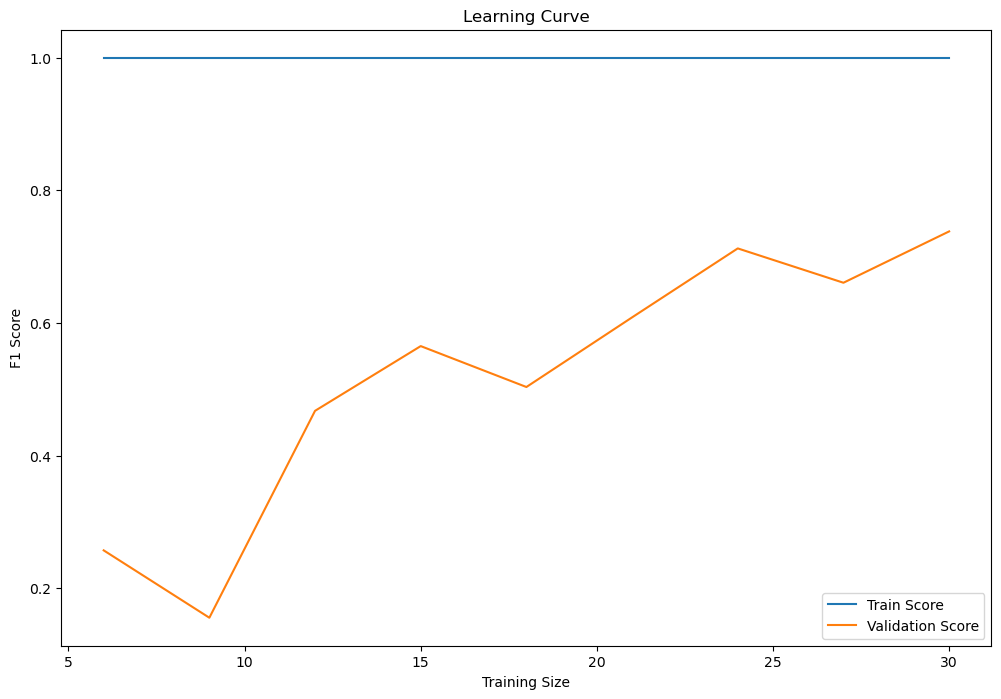

In [61]:
y_pred = evaluation_approfondie(model1, X_train, y_train, X_test)

In [62]:
modele2 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [63]:
#Fonction d'évaluation avec équilibrage des classes
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve
from sklearn.metrics import make_scorer

def evaluation_approfondie(model, X_train, y_train, X_test, apply_smote=False):
    # Vérifier la répartition des classes avant l'échantillonnage
    classes_before, counts_before = np.unique(y_train, return_counts=True)
    print("Répartition des classes avant échantillonnage :")
    for cls, count in zip(classes_before, counts_before):
        print(f"Classe {cls}: {count} occurrences")

    # Appliquer SMOTE si demandé
    if apply_smote:
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Vérifier la répartition des classes après l'échantillonnage si SMOTE est appliqué
    if apply_smote:
        classes_after, counts_after = np.unique(y_train, return_counts=True)
        print("Répartition des classes après échantillonnage :")
        for cls, count in zip(classes_after, counts_after):
            print(f"Classe {cls}: {count} occurrences")

    # Entraînement du modèle
    model.fit(X_train, y_train)
    
    # Prédiction sur les données de test
    y_pred = model.predict(X_test)
    
    # Créer une instance de StratifiedKFold
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Définir les métriques de performance pour l'évaluation
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score),
        'roc_auc': make_scorer(roc_auc_score)
    }
    
    # Validation croisée avec StratifiedKFold
    cv_results = cross_validate(model, X_train, y_train, cv=skf, scoring=scoring, return_train_score=True)
    
    print("Validation Croisée Approfondie:")
    print(f"Train Accuracy: {np.mean(cv_results['train_accuracy'])}")
    print(f"Validation Accuracy: {np.mean(cv_results['test_accuracy'])}")
    print(f"Train Precision: {np.mean(cv_results['train_precision'])}")
    print(f"Validation Precision: {np.mean(cv_results['test_precision'])}")
    print(f"Train Recall: {np.mean(cv_results['train_recall'])}")
    print(f"Validation Recall: {np.mean(cv_results['test_recall'])}")
    print(f"Train F1 Score: {np.mean(cv_results['train_f1'])}")
    print(f"Validation F1 Score: {np.mean(cv_results['test_f1'])}")
    print(f"Train ROC AUC: {np.mean(cv_results['train_roc_auc'])}")
    print(f"Validation ROC AUC: {np.mean(cv_results['test_roc_auc'])}")

    # Affichage des courbes d'apprentissage
    train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=skf, train_sizes=np.linspace(0.1, 1, 10), scoring='f1')
    plt.figure(figsize=(12, 8))
    plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score')
    plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
    plt.xlabel('Training Size')
    plt.ylabel('F1 Score')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()
    
    return y_pred


Répartition des classes avant échantillonnage :
Classe 0.0: 26 occurrences
Classe 1.0: 19 occurrences


C:\Users\ROYAL COMPUTER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ROYAL COMPUTER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ROYAL COMPUTER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Croisée Approfondie:
Train Accuracy: 1.0
Validation Accuracy: 0.635
Train Precision: 1.0
Validation Precision: 0.36666666666666664
Train Recall: 1.0
Validation Recall: 0.4
Train F1 Score: 1.0
Validation F1 Score: 0.3633333333333333
Train ROC AUC: 1.0
Validation ROC AUC: 0.5833333333333334


C:\Users\ROYAL COMPUTER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


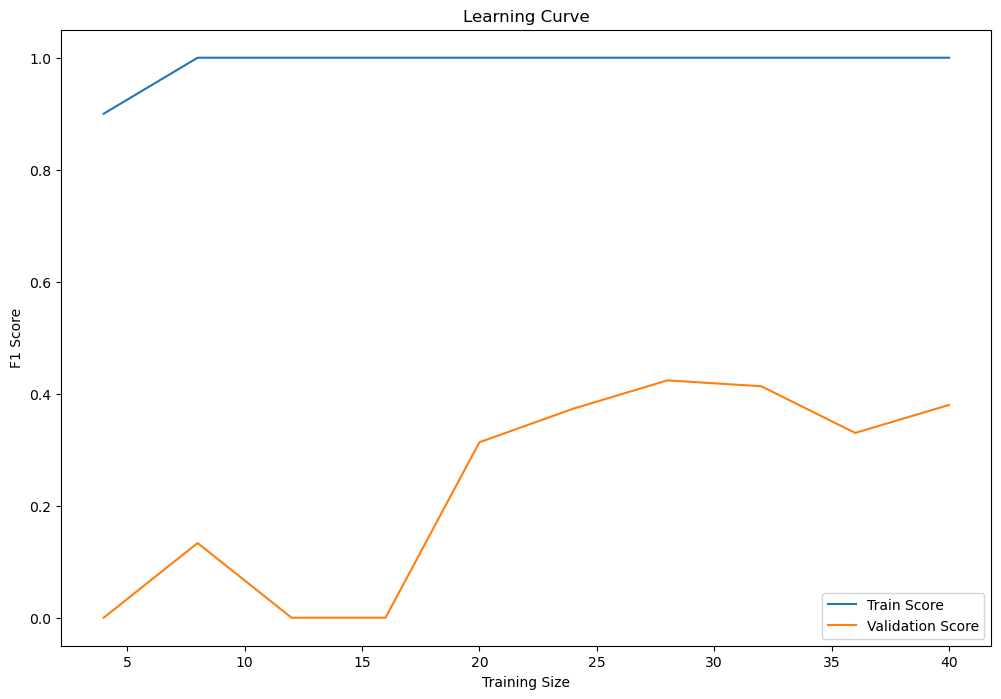

In [64]:
#Entrainement du modele sans équilibrage des classes 
y_pred = evaluation_approfondie(modele2, X_train, y_train, X_test, apply_smote=False)

Répartition des classes avant échantillonnage :
Classe 0.0: 26 occurrences
Classe 1.0: 19 occurrences
Répartition des classes après échantillonnage :
Classe 0.0: 26 occurrences
Classe 1.0: 26 occurrences
Validation Croisée Approfondie:
Train Accuracy: 1.0
Validation Accuracy: 0.7333333333333333
Train Precision: 1.0
Validation Precision: 0.7916666666666666
Train Recall: 1.0
Validation Recall: 0.7833333333333333
Train F1 Score: 1.0
Validation F1 Score: 0.7395238095238096
Train ROC AUC: 1.0
Validation ROC AUC: 0.75


C:\Users\ROYAL COMPUTER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


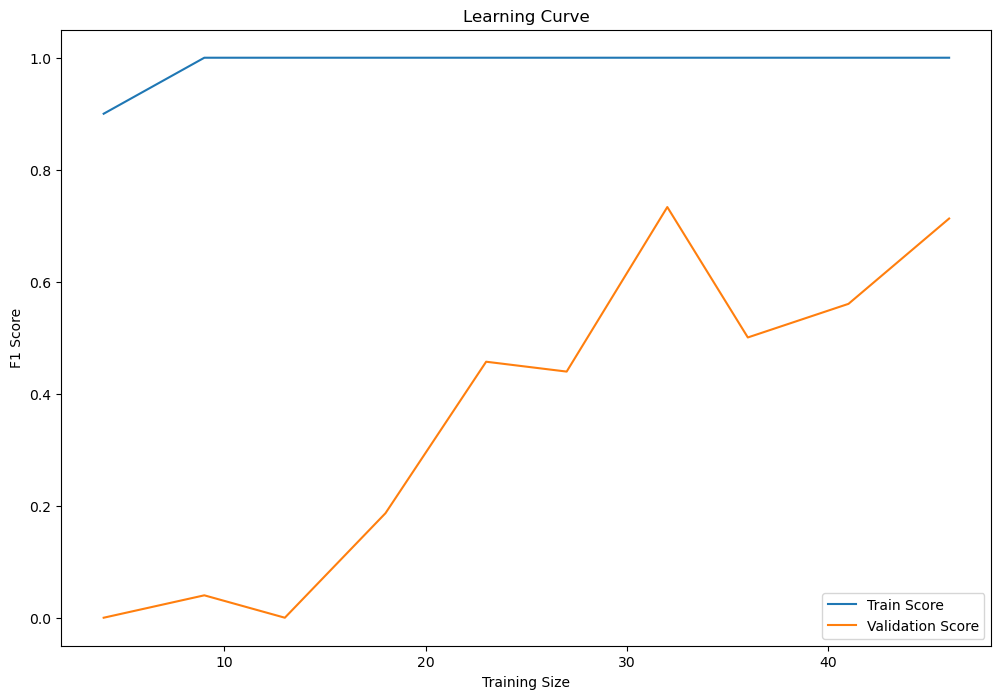

In [65]:
# Entrainement du modele avec équilibrage des classes 
y_pred = evaluation_approfondie(modele2, X_train, y_train, X_test, apply_smote=True)

## Entrainement d'un modele de deeplearning

In [67]:
# Entrainement d'un réseau de neurone simple 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajuster le scaler sur les données d'entraînement et transformer X_train
X_test_scaled = scaler.transform(X_test)  # Transformer X_test avec le même scaler
# Utiliser adam comme optimiseur
adam = tf.keras.optimizers.Adam()
# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_split.shape[1],)),  # Adjust input shape to match the number of features
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callbacks
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.keras",
                                                monitor="val_accuracy",
                                                mode="max",
                                                save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=100, restore_best_weights=True)

# Fit the model
history = model.fit(X_train_split, y_train_split, epochs=100, batch_size=2048,
                    validation_data=(X_val_split, y_val_split),
                    callbacks=[model_ckp, stop])

# Load the best model
model.load_weights("best_model.keras")

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# If you need binary predictions
binary_predictions = (predictions > 0.5).astype(int)

# Prepare results for submission
# Create a DataFrame for submission (assuming you need 'Id' for submission)
submission = pd.DataFrame({
    'Id': np.arange(len(X_test_scaled)),  # Adjust if you have an 'Id' column
    'Prediction': binary_predictions.flatten()  # Flatten if predictions are 2D
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

Epoch 1/100


C:\Users\ROYAL COMPUTER\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4167 - loss: 0.7378 - val_accuracy: 0.3333 - val_loss: 0.7949
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.4722 - loss: 0.7039 - val_accuracy: 0.3333 - val_loss: 0.7775
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.5556 - loss: 0.6740 - val_accuracy: 0.4444 - val_loss: 0.7637
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5833 - loss: 0.6487 - val_accuracy: 0.3333 - val_loss: 0.7529
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.6389 - loss: 0.6279 - val_accuracy: 0.3333 - val_loss: 0.7417
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6389 - loss: 0.6092 - val_accuracy: 0.3333 - val_loss: 0.7296
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6944 - loss: 0.5923 - val_accuracy: 0.3333 - val_loss: 0.7190
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.7500 - loss: 0.5772 - val_accuracy: 0.4444 - val_loss: 0.7095
Epoc

Epoch 52/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.9444 - loss: 0.1753 - val_accuracy: 0.8889 - val_loss: 0.3729
Epoch 53/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9444 - loss: 0.1693 - val_accuracy: 0.8889 - val_loss: 0.3679
Epoch 54/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9444 - loss: 0.1632 - val_accuracy: 0.8889 - val_loss: 0.3625
Epoch 55/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9444 - loss: 0.1574 - val_accuracy: 0.8889 - val_loss: 0.3573
Epoch 56/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9444 - loss: 0.1518 - val_accuracy: 0.8889 - val_loss: 0.3544
Epoch 57/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9444 - loss: 0.1463 - val_accuracy: 0.8889 - val_loss: 0.3527
Epoch 58/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9444 - loss: 0.1410 - val_accuracy: 0.8889 - val_loss: 0.3517
Epoch 59/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 1.0000 - loss: 0.1358 - val_accuracy: 0.8889 -

In [71]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Reshape data to add a time step dimension
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42)

# Define the LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(X_train_split.shape[1], X_train_split.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Define callbacks
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.keras",
                                                monitor="val_accuracy",
                                                mode="max",
                                                save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=200, restore_best_weights=True)

# Fit the model
history = model.fit(X_train_split, y_train_split, epochs=200, batch_size=2048,
                    validation_data=(X_val_split, y_val_split),
                    callbacks=[model_ckp, stop])

# Load the best model
model.load_weights("best_model.keras")

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# If you need binary predictions
binary_predictions = (predictions > 0.5).astype(int)

# Prepare results for submission
submission = pd.DataFrame({
    'Id': np.arange(len(X_test_scaled)),
    'Prediction': binary_predictions.flatten()
})

# Save the submission file
submission.to_csv('submission.csv', index=False)


Epoch 1/200


C:\Users\ROYAL COMPUTER\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5278 - loss: 0.6930 - val_accuracy: 0.5556 - val_loss: 0.6922
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5833 - loss: 0.6915 - val_accuracy: 0.6667 - val_loss: 0.6914
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.6667 - loss: 0.6894 - val_accuracy: 0.6667 - val_loss: 0.6904
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.6944 - loss: 0.6883 - val_accuracy: 0.7778 - val_loss: 0.6894
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.7222 - loss: 0.6866 - val_accuracy: 0.6667 - val_loss: 0.6885
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7500 - loss: 0.6837 - val_accuracy: 0.6667 - val_loss: 0.6878
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7222 - loss: 0.6810 - val_accuracy: 0.6667 - val_loss: 0.6871
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7500 - loss: 0.6798 - val_accuracy: 0.6667 - val_loss: 0.6864
Ep

Epoch 52/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8333 - loss: 0.3574 - val_accuracy: 0.7778 - val_loss: 0.8145
Epoch 53/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8333 - loss: 0.3722 - val_accuracy: 0.7778 - val_loss: 0.8254
Epoch 54/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.8333 - loss: 0.3671 - val_accuracy: 0.7778 - val_loss: 0.8388
Epoch 55/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8611 - loss: 0.3455 - val_accuracy: 0.7778 - val_loss: 0.8521
Epoch 56/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8611 - loss: 0.3229 - val_accuracy: 0.7778 - val_loss: 0.8662
Epoch 57/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8333 - loss: 0.3305 - val_accuracy: 0.6667 - val_loss: 0.8714
Epoch 58/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8333 - loss: 0.2986 - val_accuracy: 0.6667 - val_loss: 0.8744
Epoch 59/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8333 - loss: 0.2909 - val_accuracy: 0.6667 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.7778 - val_loss: 2.3314
Epoch 153/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 1.0000 - loss: 0.0234 - val_accuracy: 0.7778 - val_loss: 2.3454
Epoch 154/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 0.7778 - val_loss: 2.3588
Epoch 155/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 1.0000 - loss: 0.0153 - val_accuracy: 0.7778 - val_loss: 2.3585
Epoch 156/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 1.0000 - loss: 0.0116 - val_accuracy: 0.7778 - val_loss: 2.3561
Epoch 157/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 1.0000 - loss: 0.0210 - val_accuracy: 0.7778 - val_loss: 2.3644
Epoch 158/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 1.0000 - loss: 0.0242 - val_accuracy: 0.7778 - val_loss: 2.3930
Epoch 159/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 0.7778 -